# Final Project

## James Slade
## Ames Housing Dataset

In [569]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from scipy.stats import entropy
from scipy.stats.contingency import crosstab
from sklearn.metrics import mutual_info_score, root_mean_squared_error, r2_score, mean_absolute_error
import itertools
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config

set_config(transform_output="pandas")

In [570]:
train_house_prices_df = pd.read_csv("data/train.csv", index_col=0)
test_house_prices_df = pd.read_csv("data/test.csv", index_col=0)

## Data Visualization

MSSubClass


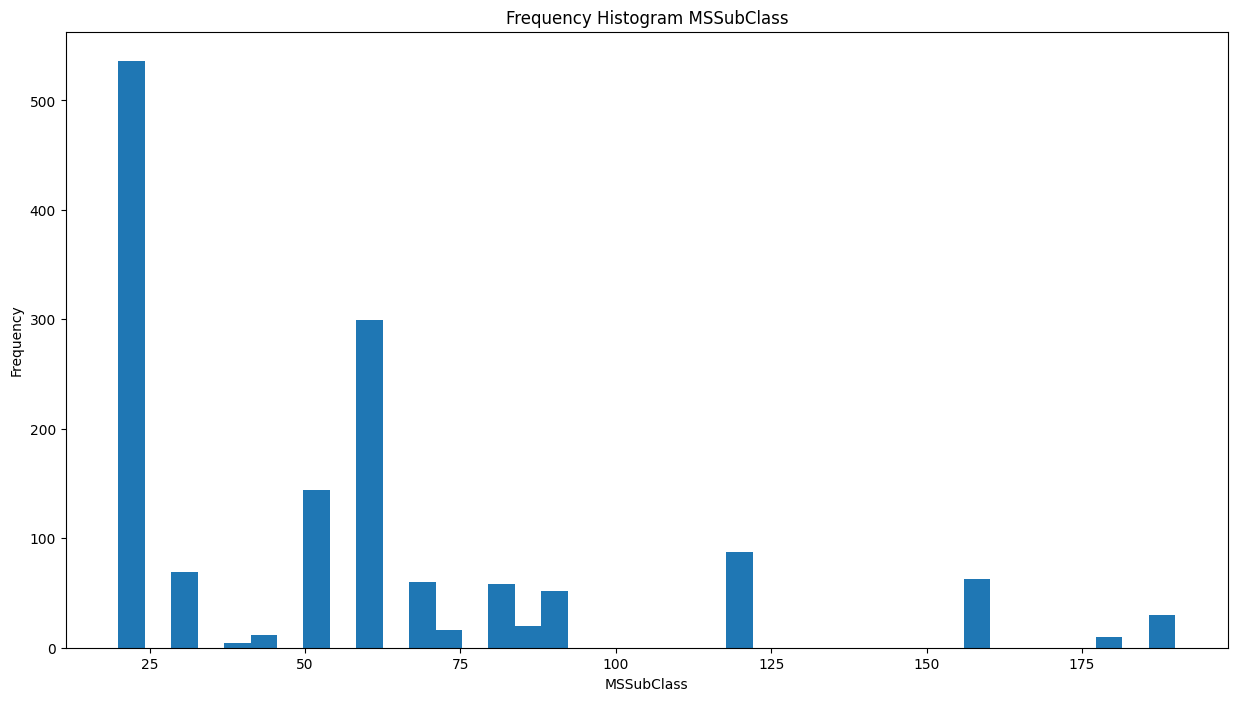

Mean: 56.897260273972606
Median: 50.0
Mode: 0    20
Name: MSSubClass, dtype: int64
Variance: 1789.338306402396
Std Dev: 42.300570993810425
Range: 170
IQR 50.0



MSZoning


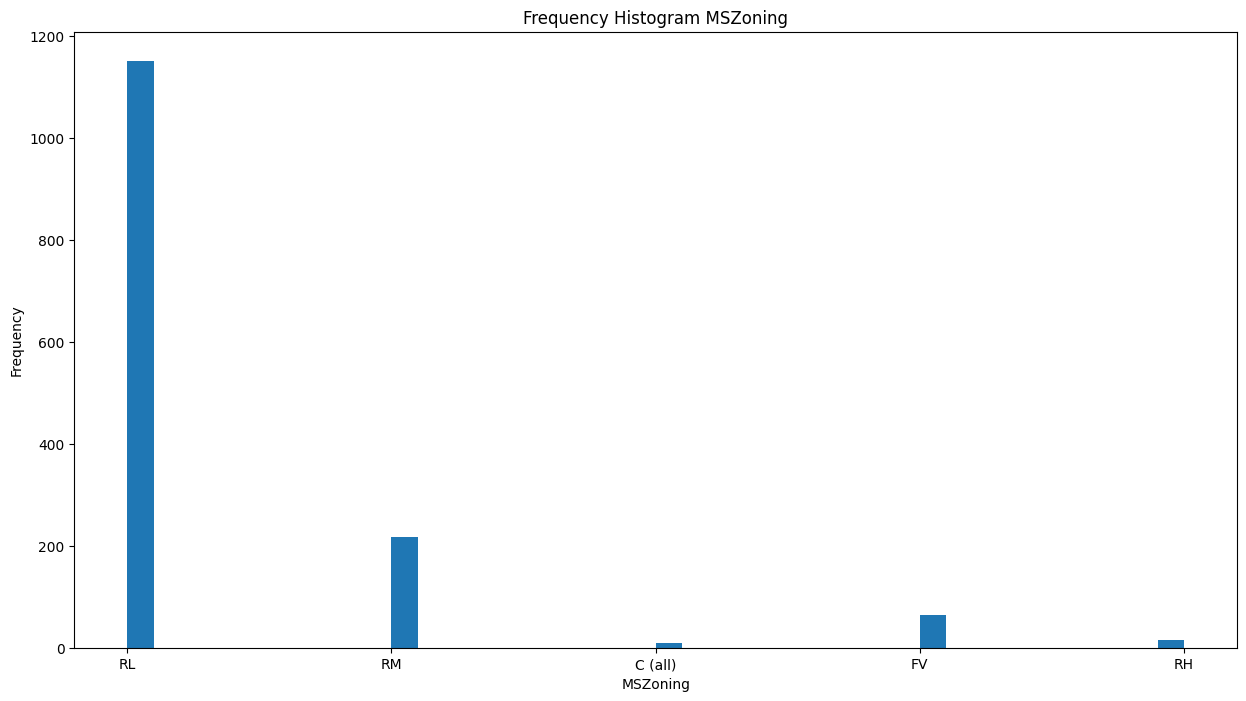

Unable to compute descriptive statistics



LotFrontage


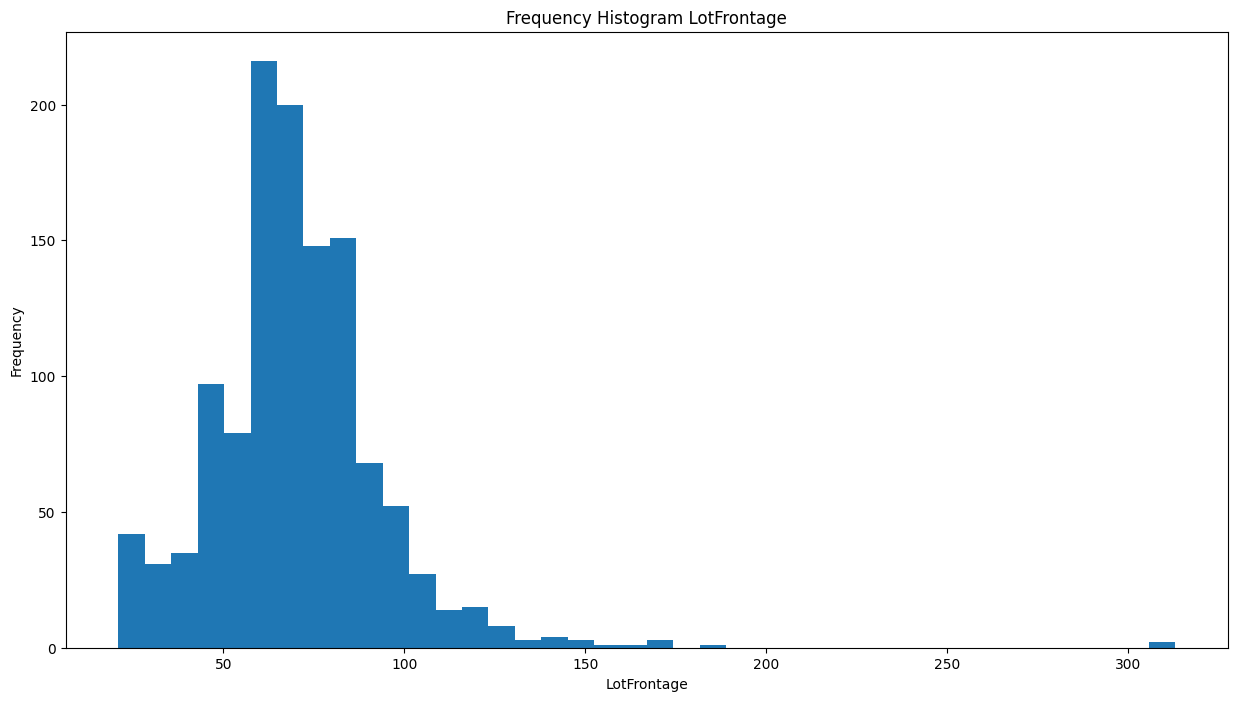

Mean: 70.04995836802665
Median: 69.0
Mode: 0    60.0
Name: LotFrontage, dtype: float64
Variance: 589.7491687482653
Std Dev: 24.284751774483208
Range: 292.0
IQR 21.0



LotArea


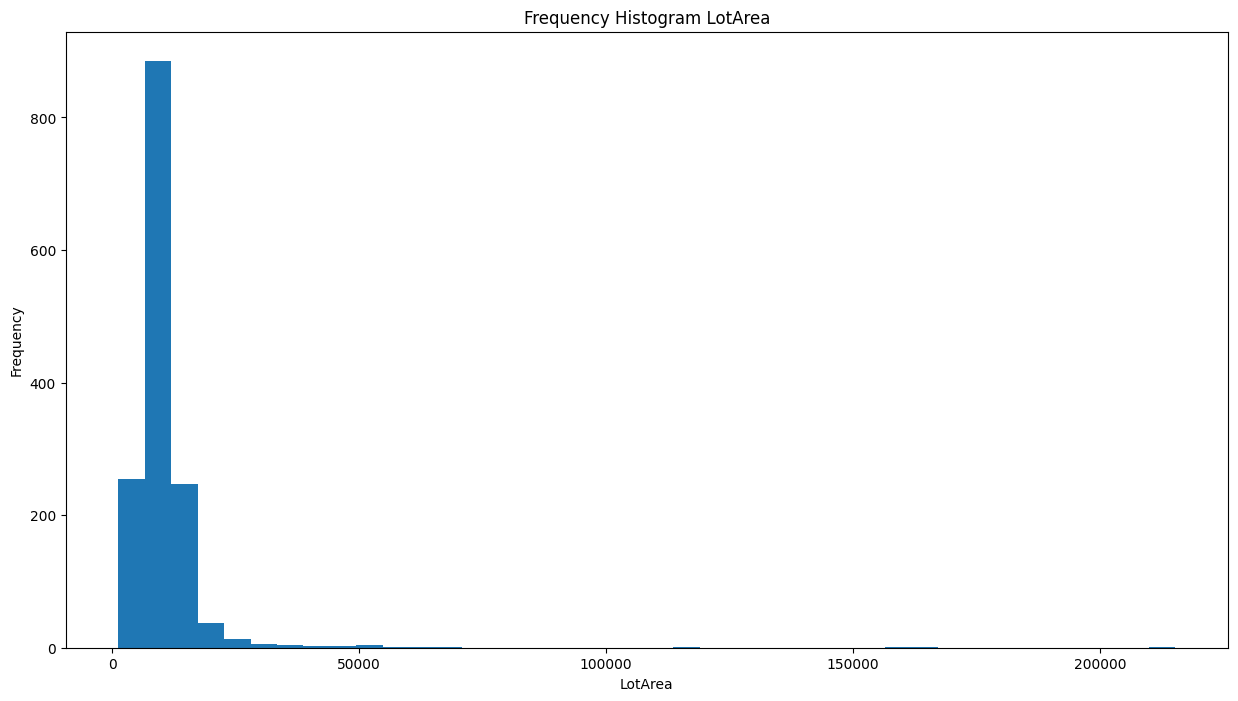

Mean: 10516.828082191782
Median: 9478.5
Mode: 0    7200
Name: LotArea, dtype: int64
Variance: 99625649.65034176
Std Dev: 9981.26493237915
Range: 213945
IQR 4048.0



Street


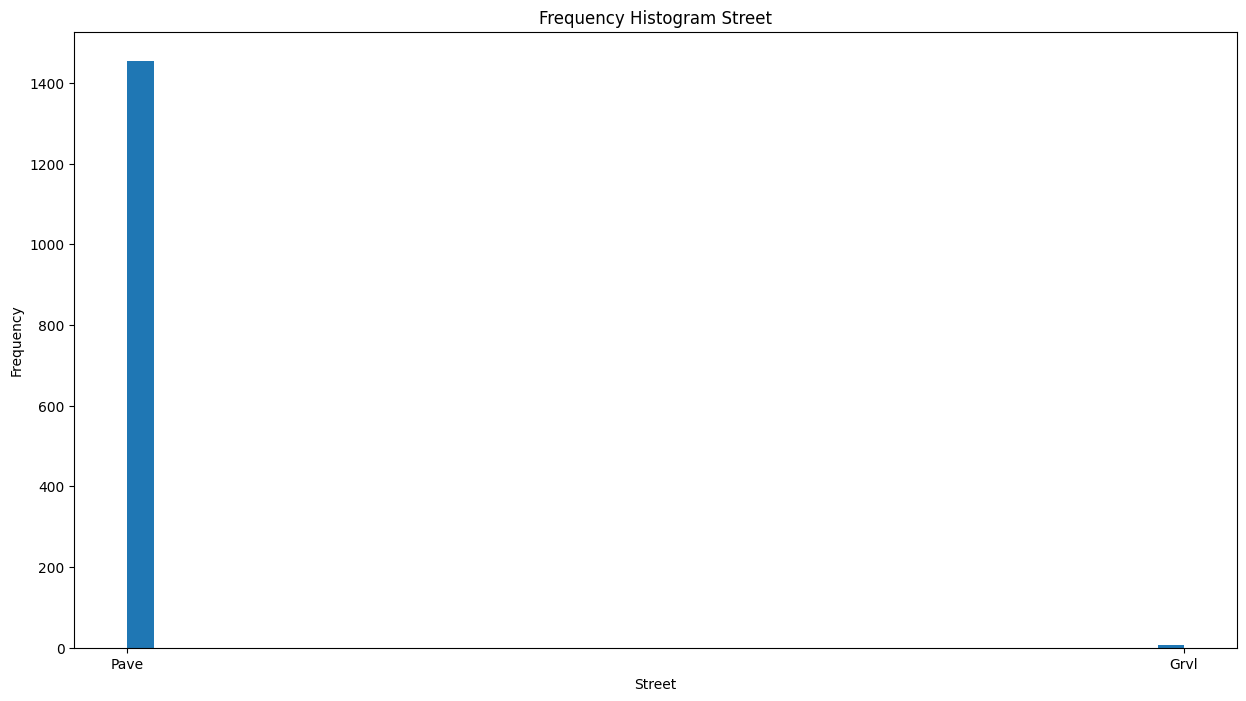

Unable to compute descriptive statistics



Alley
Unable to plot Alley
Unable to compute descriptive statistics



LotShape


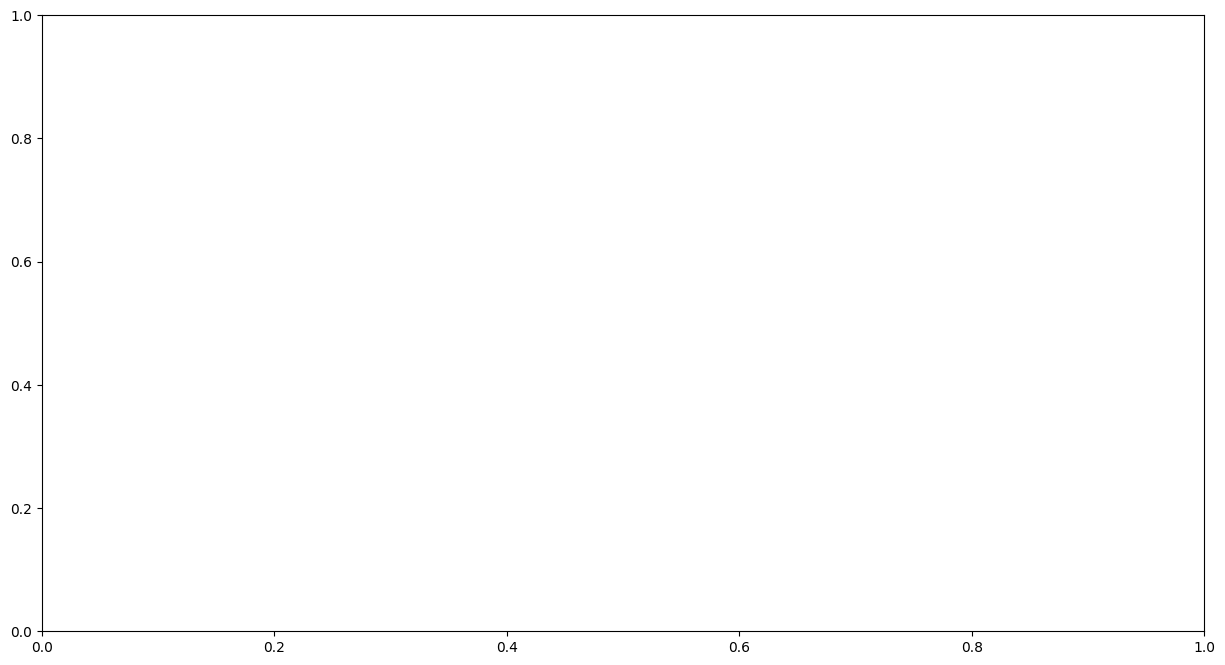

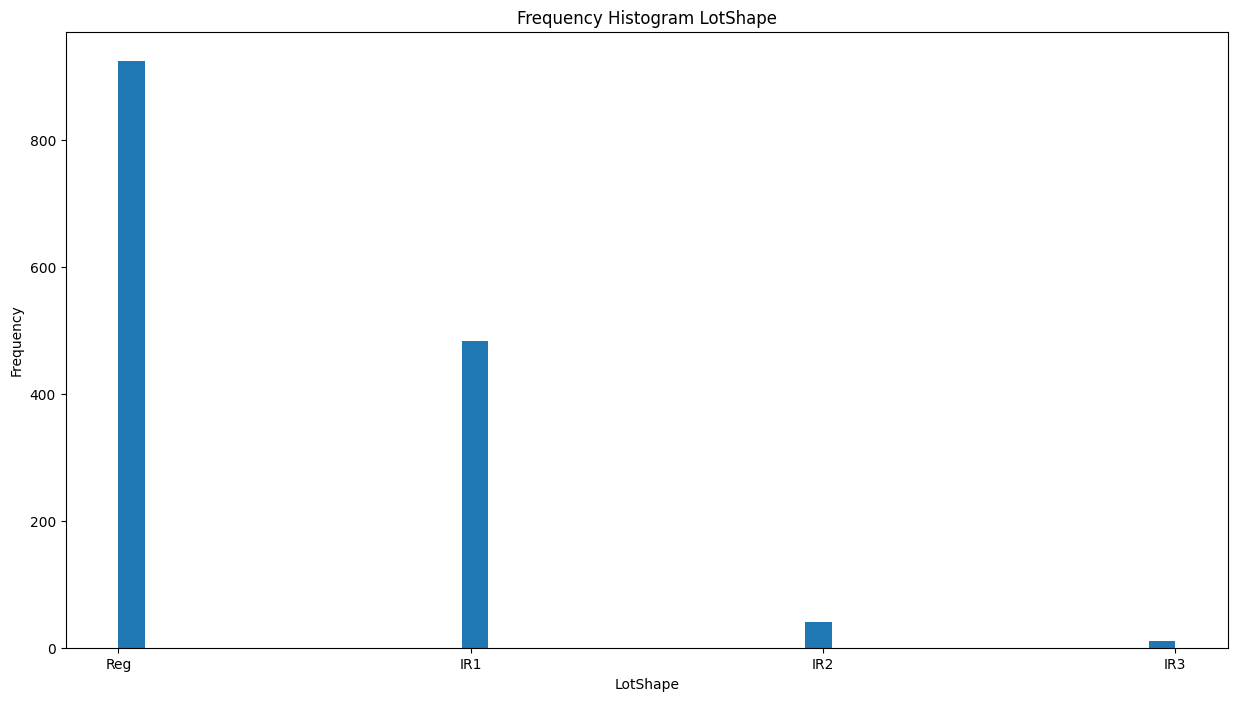

Unable to compute descriptive statistics



LandContour


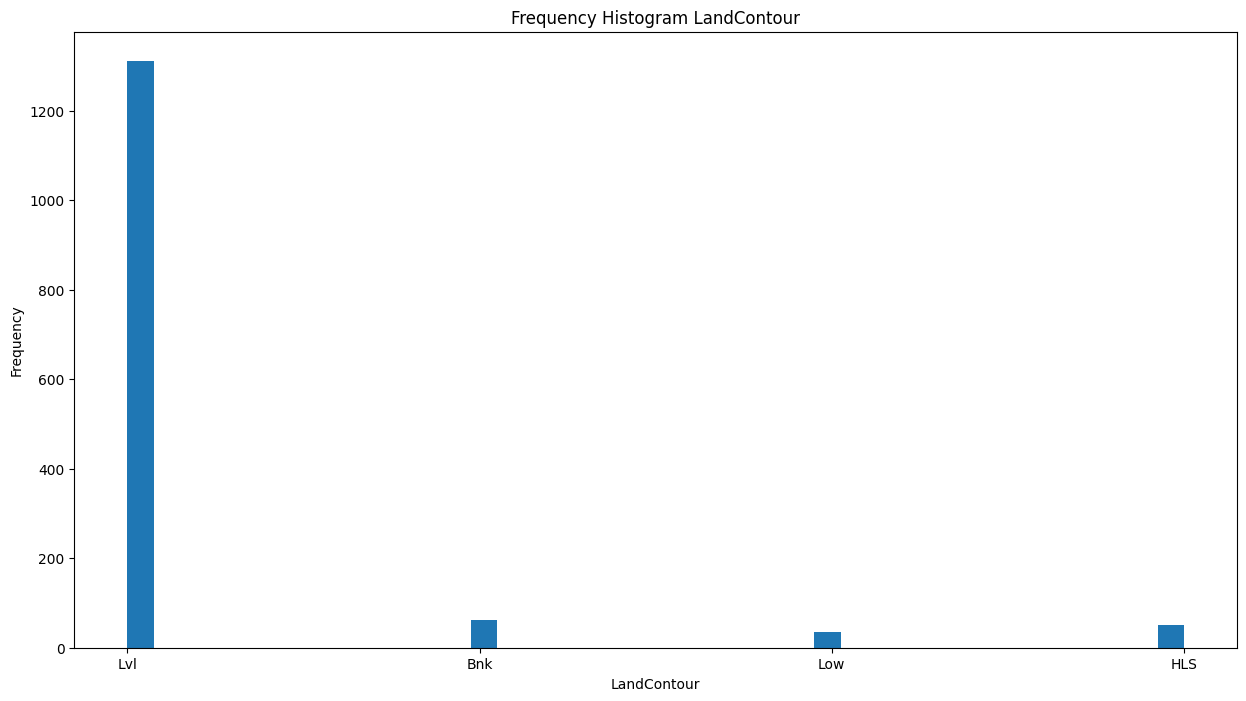

Unable to compute descriptive statistics



Utilities


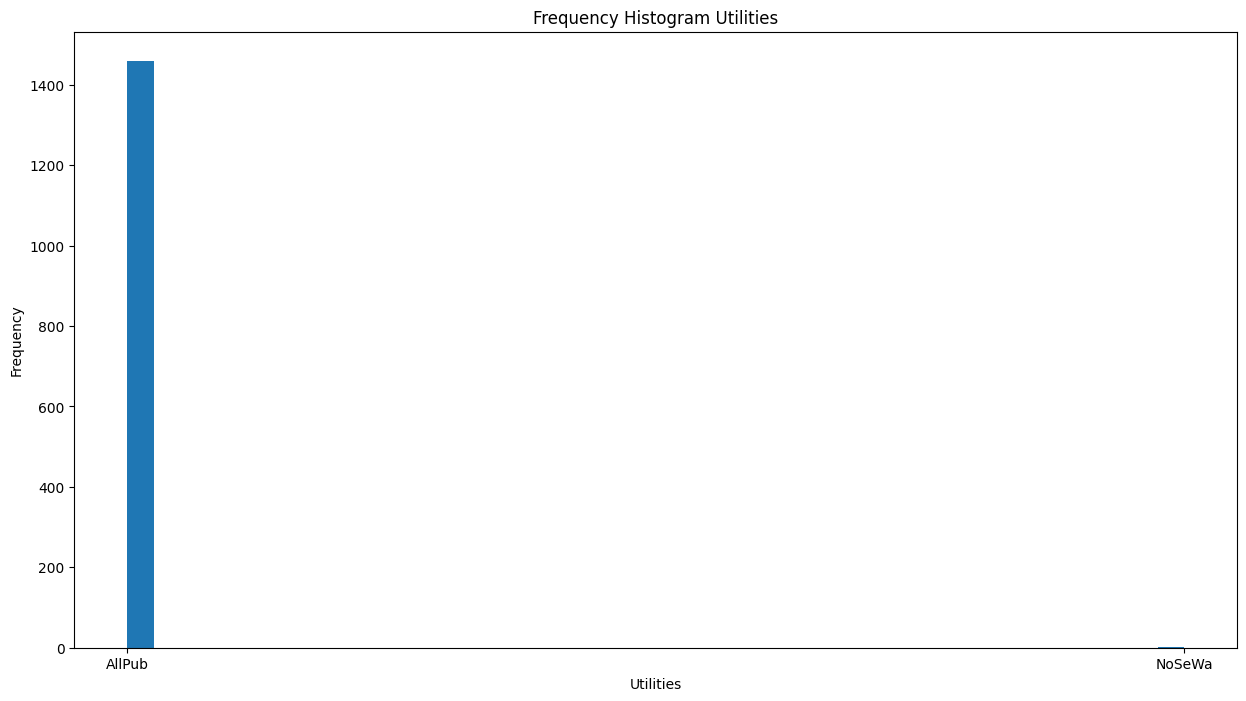

Unable to compute descriptive statistics



LotConfig


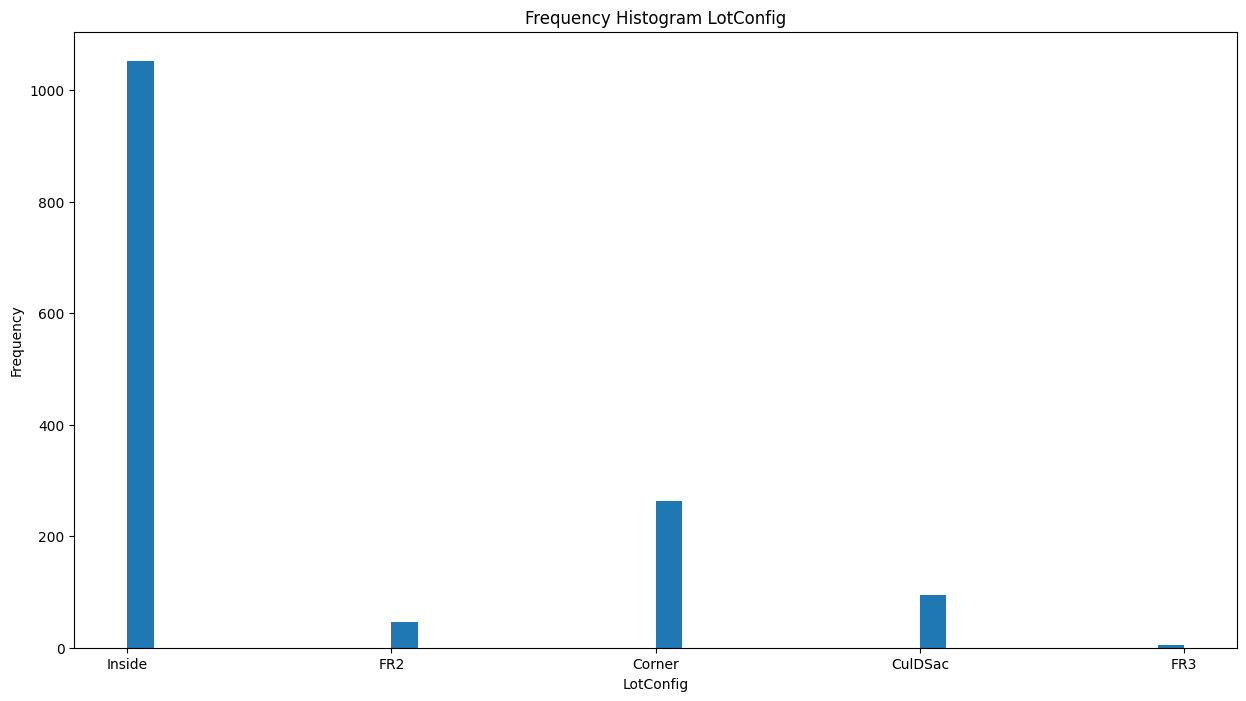

Unable to compute descriptive statistics



LandSlope


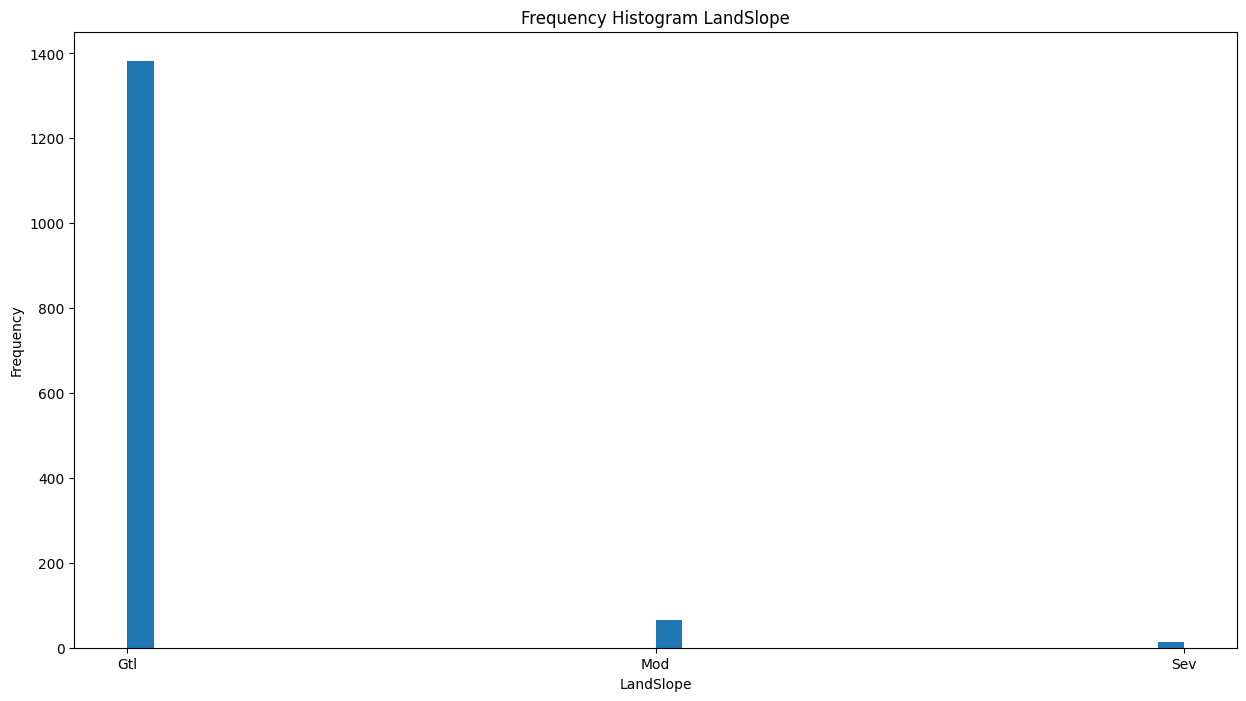

Unable to compute descriptive statistics



Neighborhood


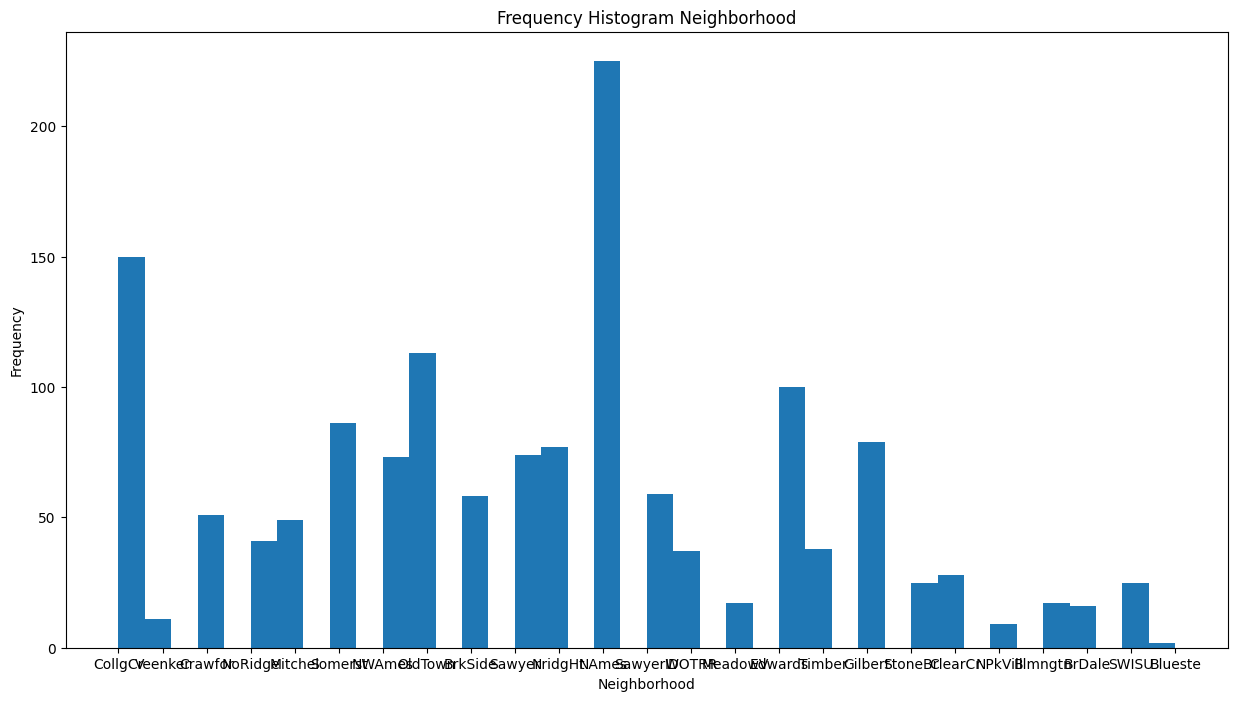

Unable to compute descriptive statistics



Condition1


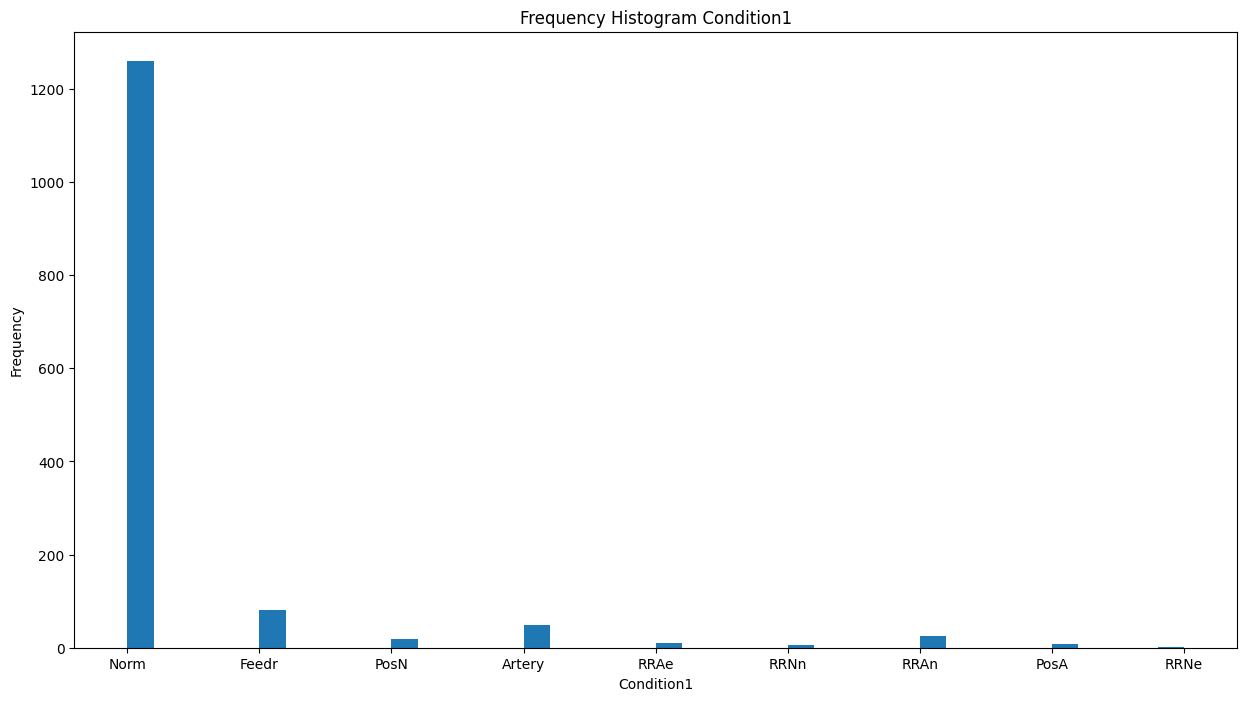

Unable to compute descriptive statistics



Condition2


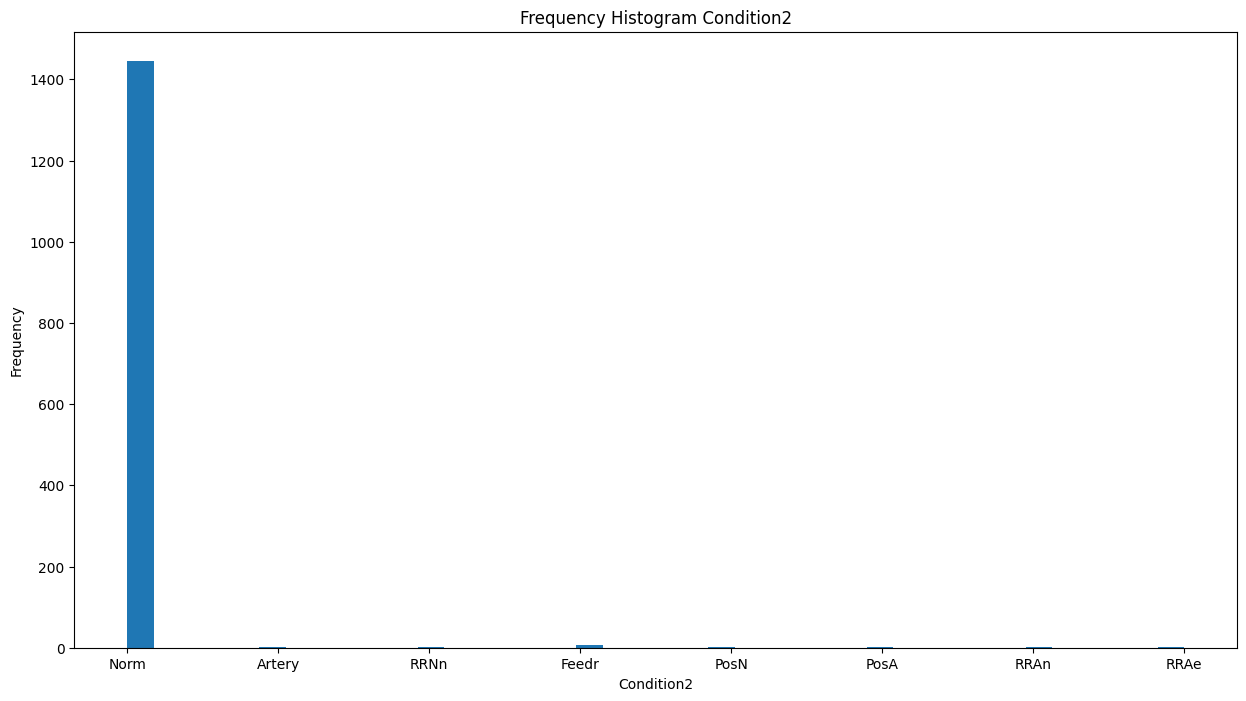

Unable to compute descriptive statistics



BldgType


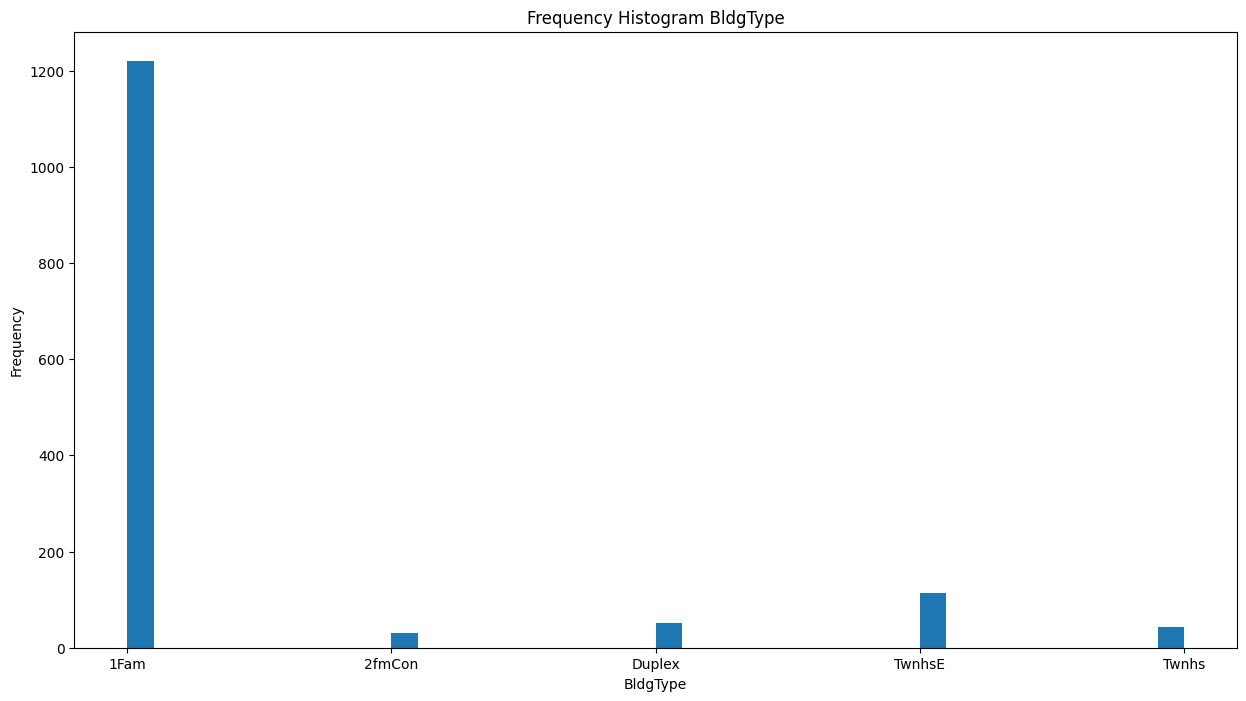

Unable to compute descriptive statistics



HouseStyle


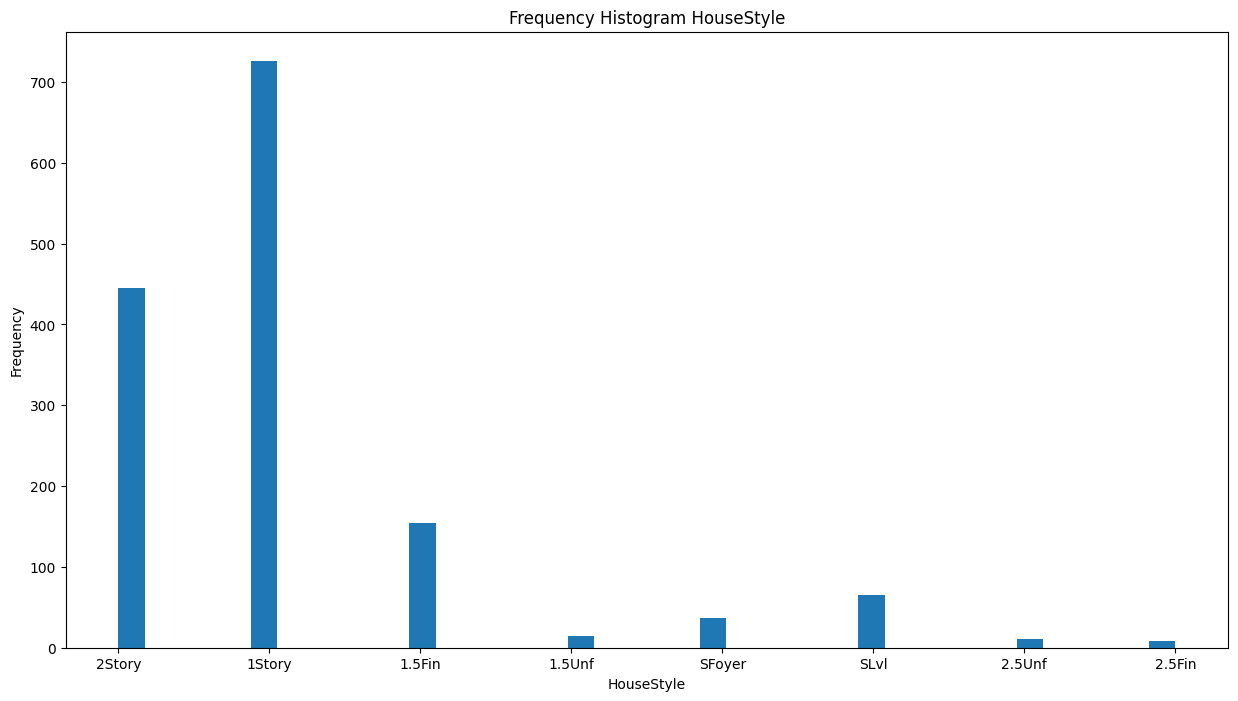

Unable to compute descriptive statistics



OverallQual


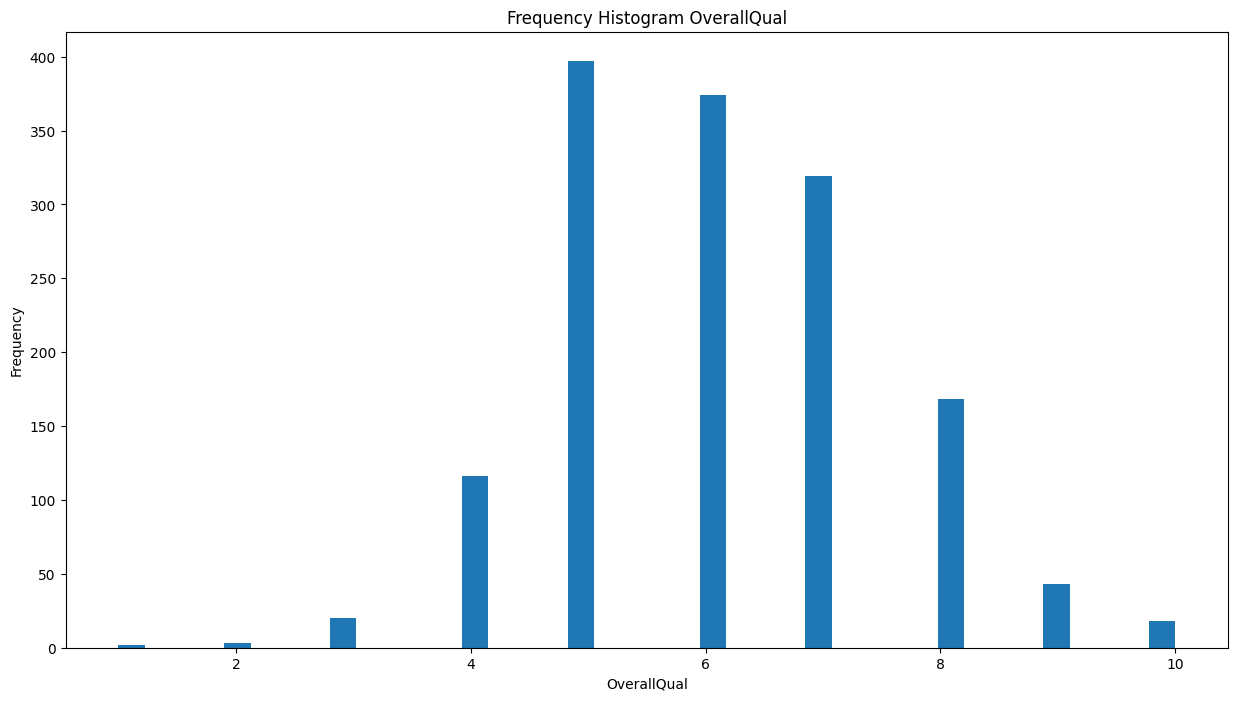

Mean: 6.0993150684931505
Median: 6.0
Mode: 0    5
Name: OverallQual, dtype: int64
Variance: 1.9126794482991725
Std Dev: 1.3829965467415934
Range: 9
IQR 2.0



OverallCond


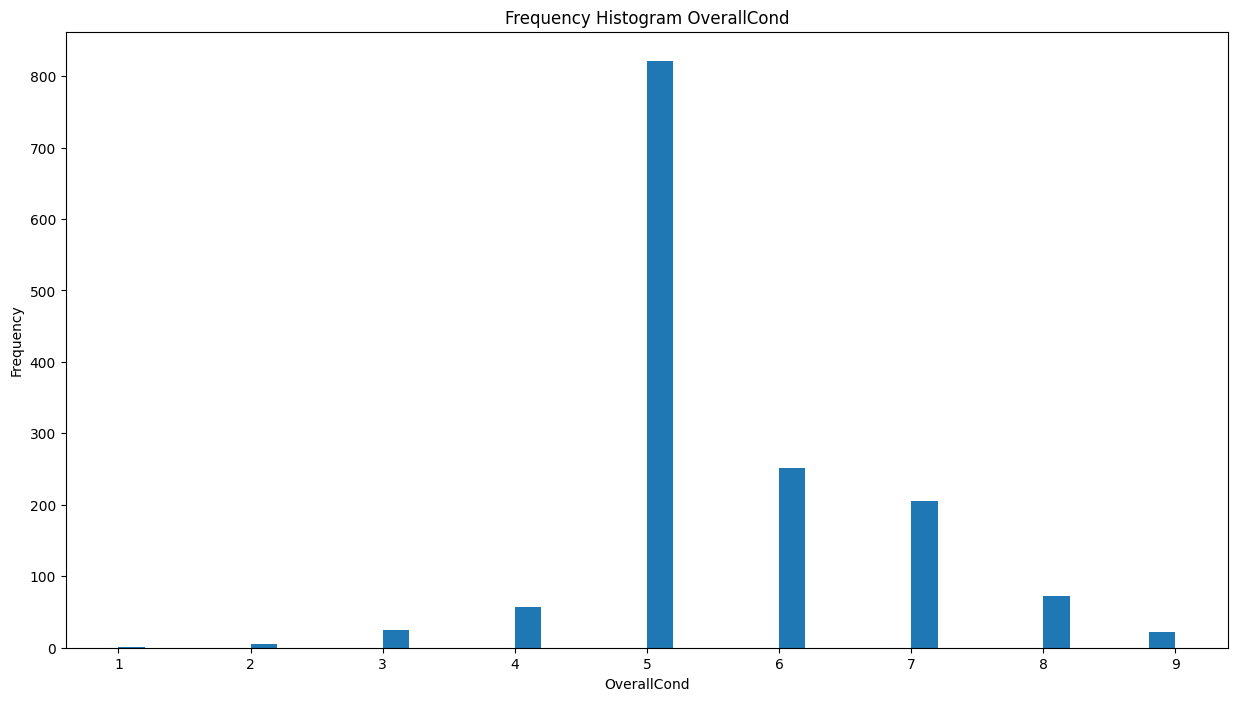

Mean: 5.575342465753424
Median: 5.0
Mode: 0    5
Name: OverallCond, dtype: int64
Variance: 1.2383223637882954
Std Dev: 1.1127993367127316
Range: 8
IQR 1.0



YearBuilt


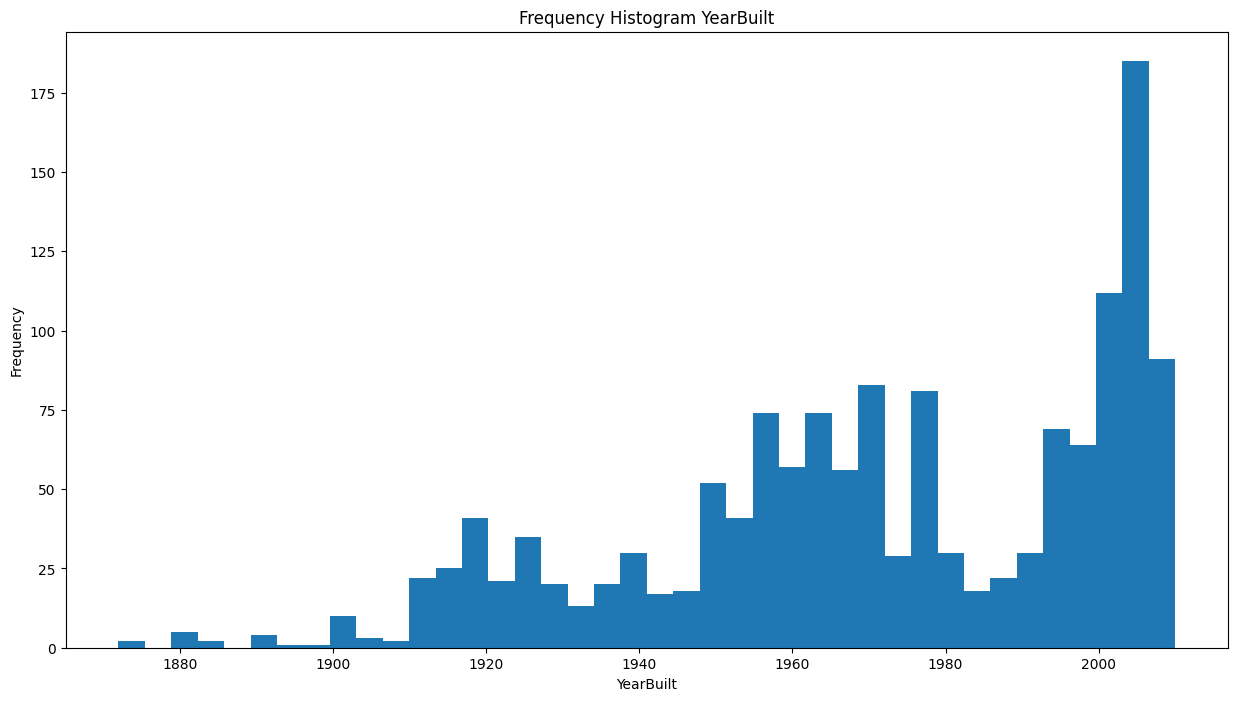

Mean: 1971.267808219178
Median: 1973.0
Mode: 0    2006
Name: YearBuilt, dtype: int64
Variance: 912.2154126019886
Std Dev: 30.202904042525258
Range: 138
IQR 46.0



YearRemodAdd


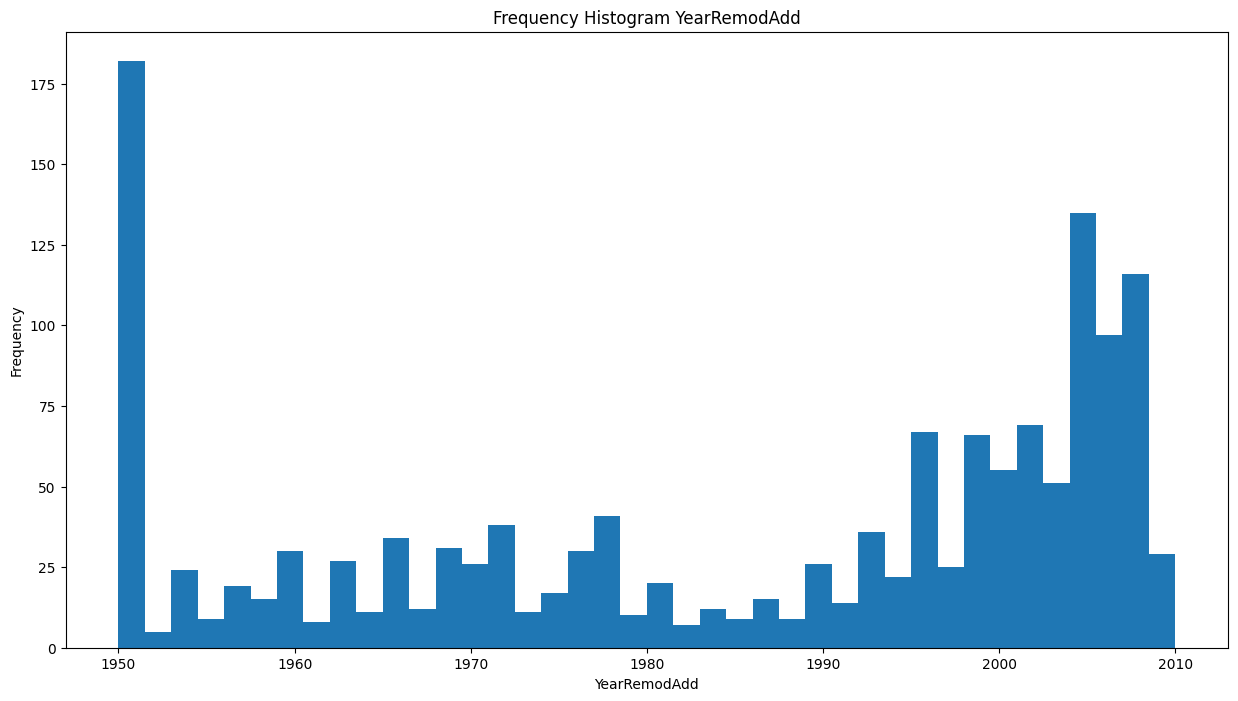

Mean: 1984.8657534246574
Median: 1994.0
Mode: 0    1950
Name: YearRemodAdd, dtype: int64
Variance: 426.23282225581426
Std Dev: 20.645406807709413
Range: 60
IQR 37.0



RoofStyle


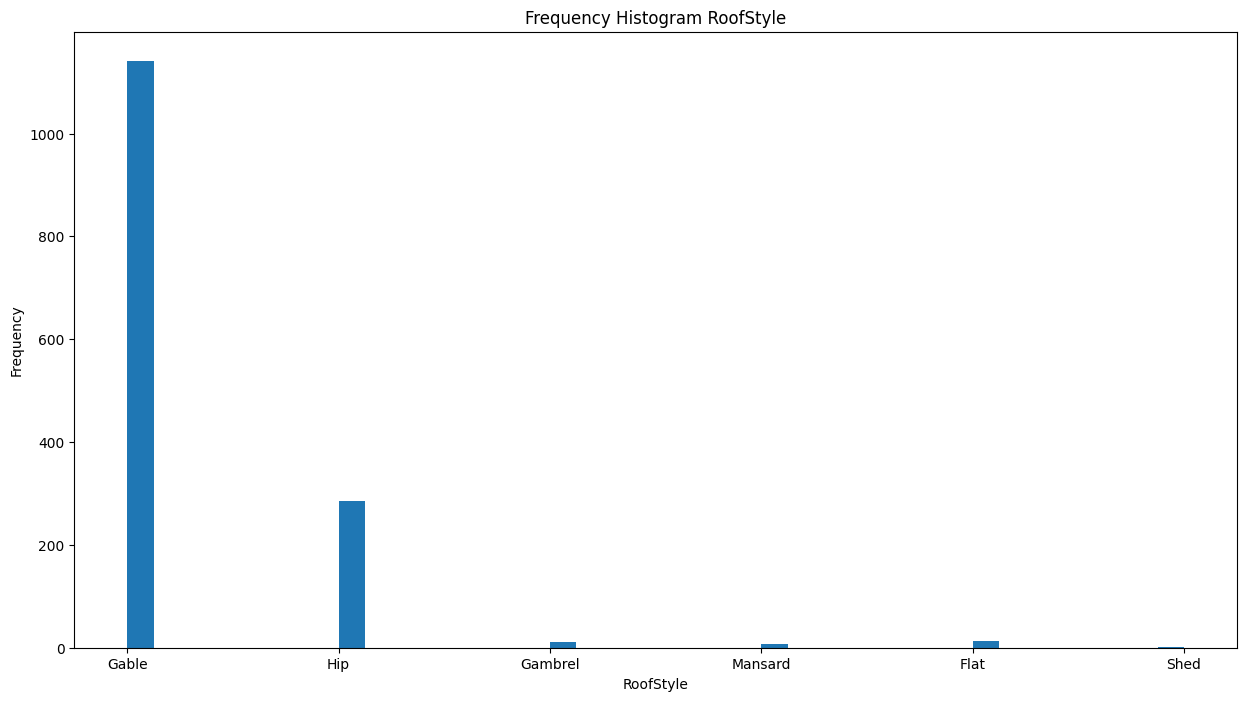

Unable to compute descriptive statistics



RoofMatl


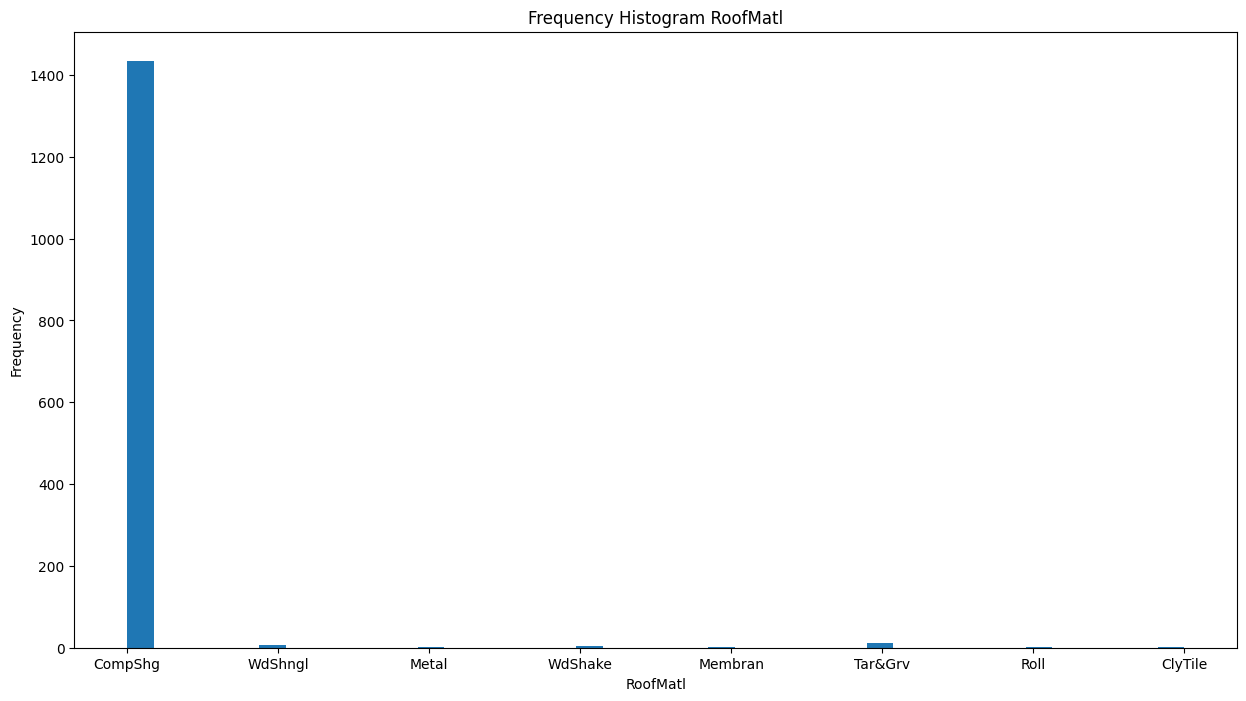

Unable to compute descriptive statistics



Exterior1st


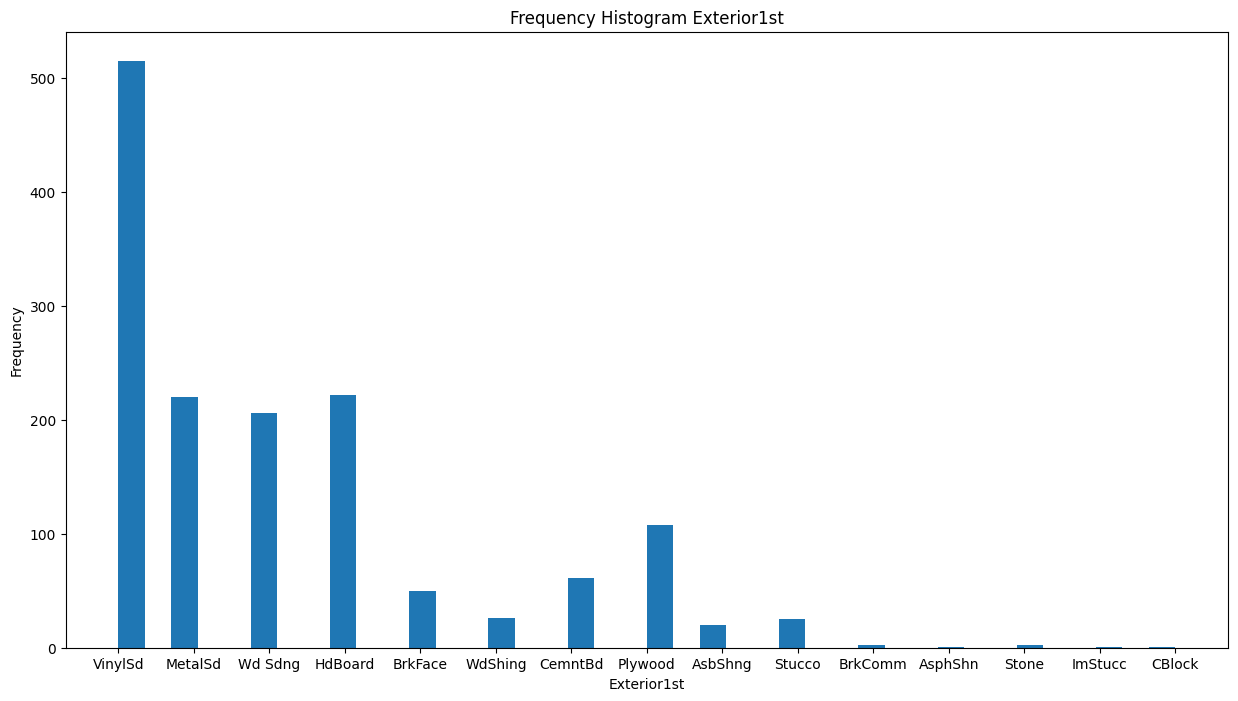

Unable to compute descriptive statistics



Exterior2nd


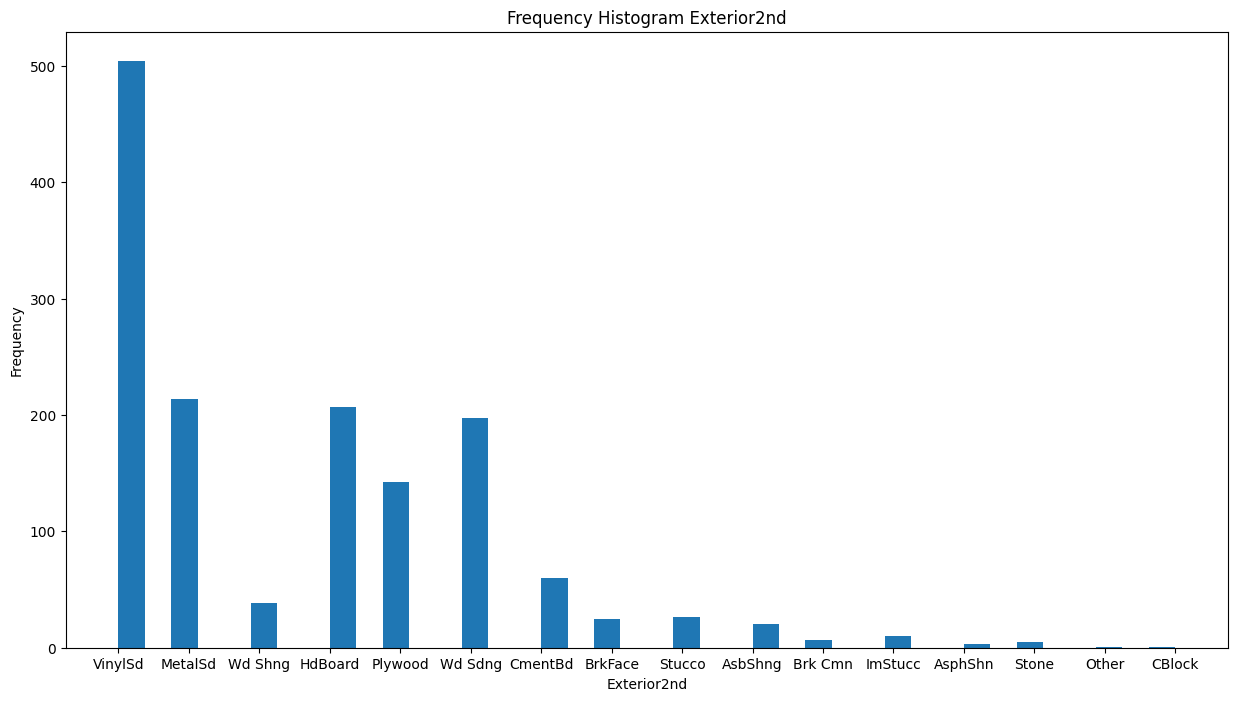

Unable to compute descriptive statistics



MasVnrType
Unable to plot MasVnrType
Unable to compute descriptive statistics



MasVnrArea


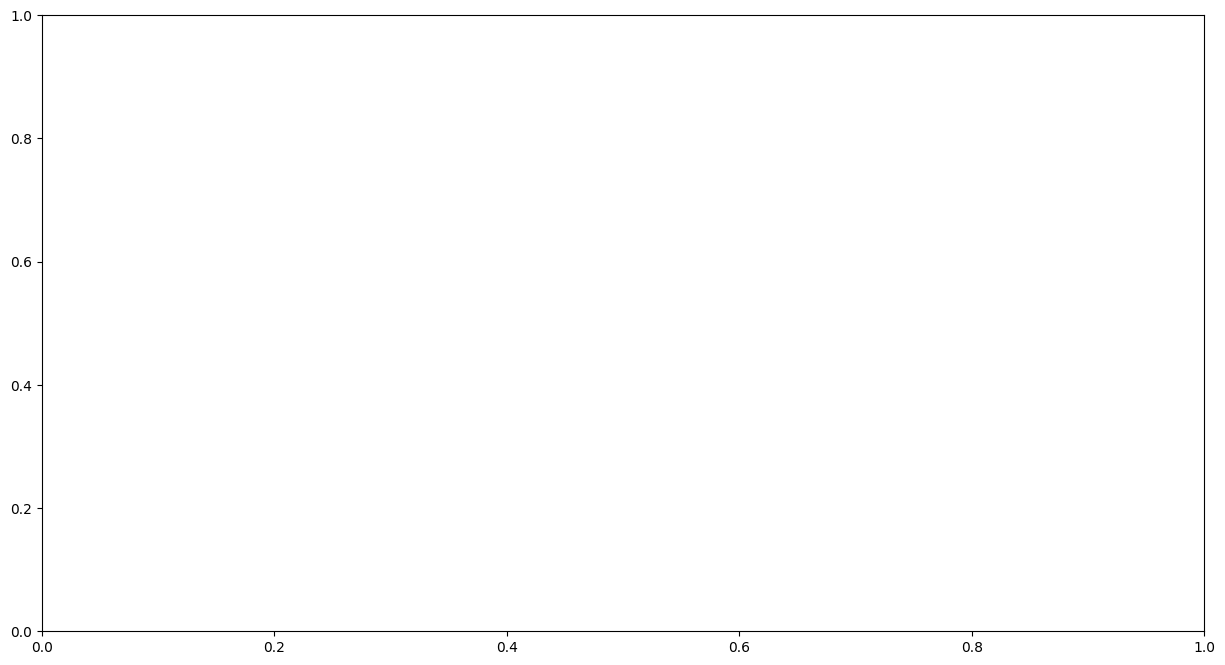

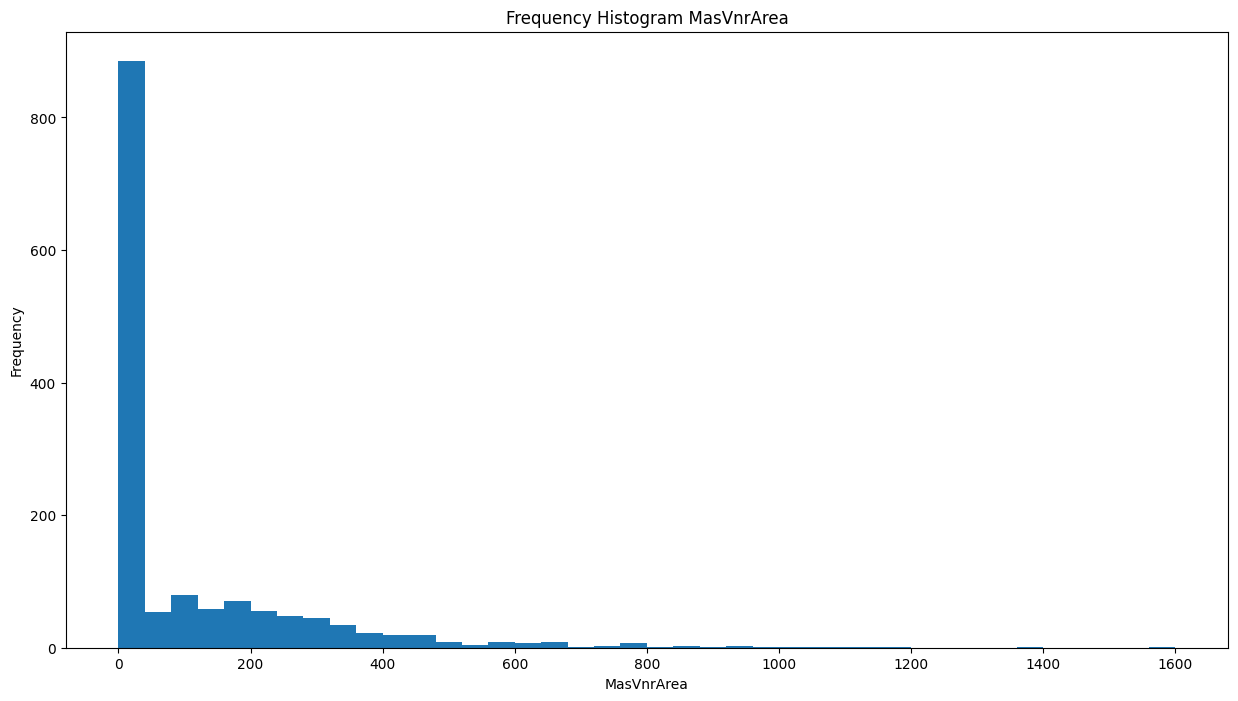

Mean: 103.68526170798899
Median: 0.0
Mode: 0    0.0
Name: MasVnrArea, dtype: float64
Variance: 32784.9711678846
Std Dev: 181.0662065872166
Range: 1600.0
IQR 166.0



ExterQual


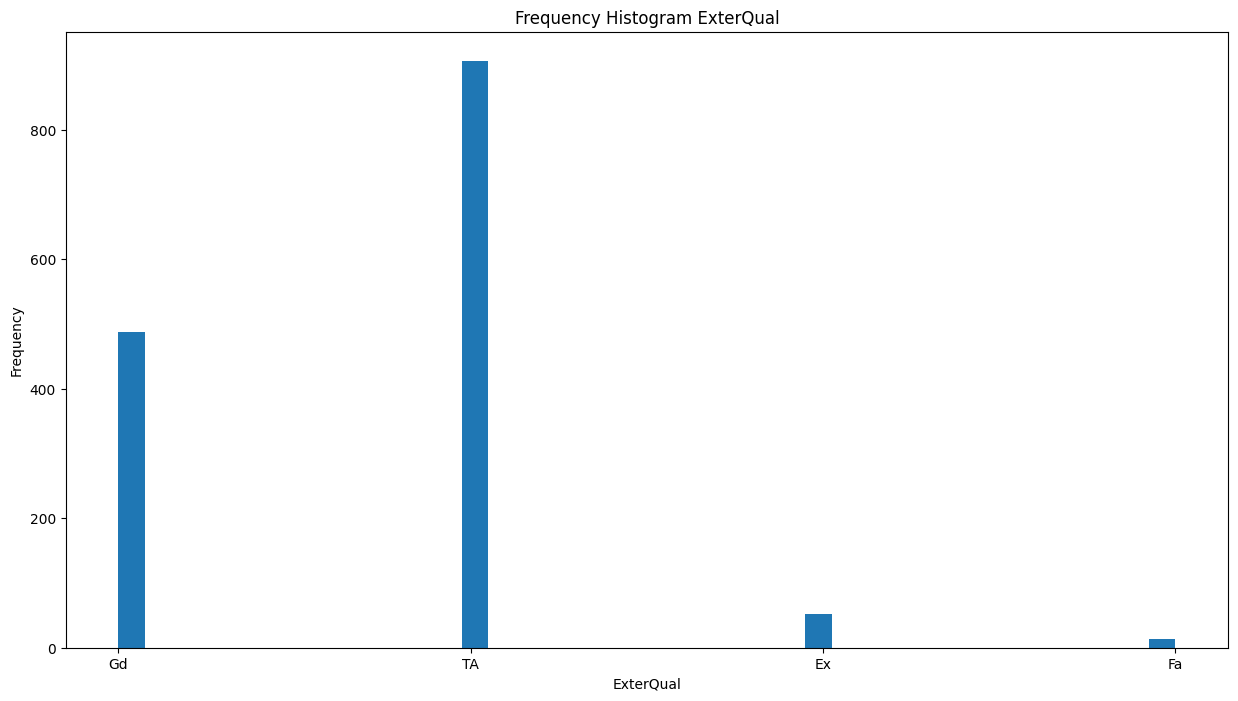

Unable to compute descriptive statistics



ExterCond


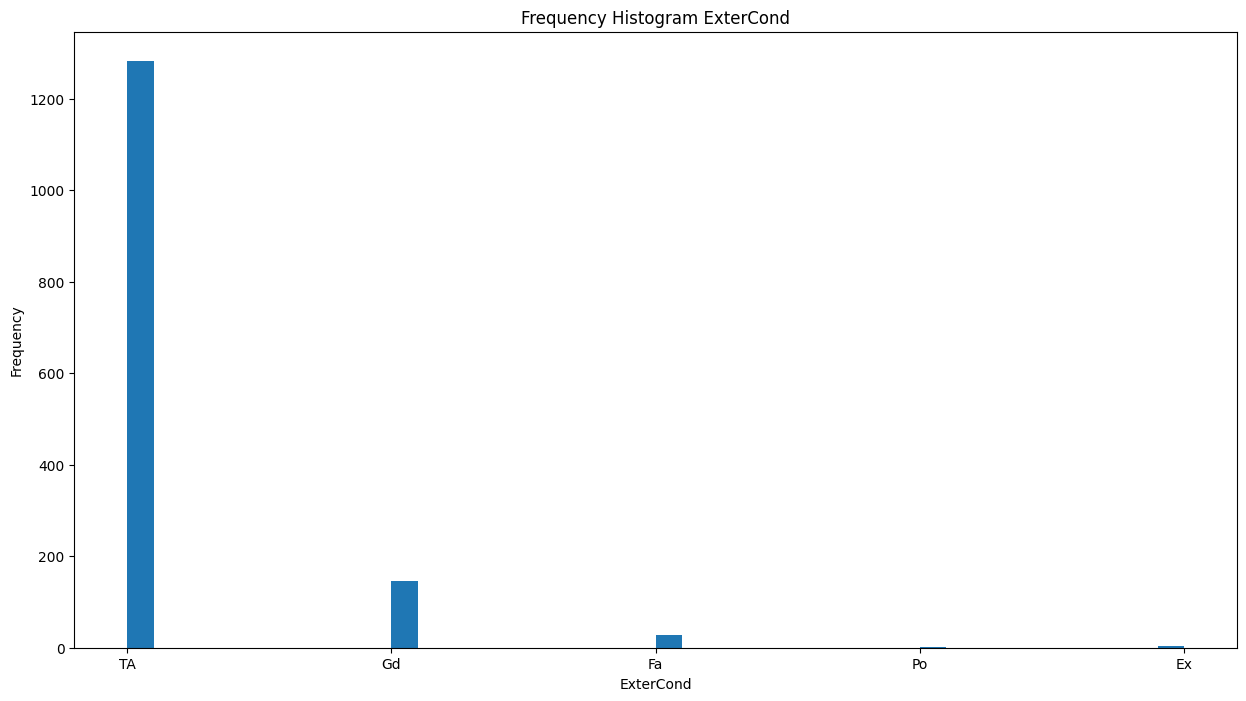

Unable to compute descriptive statistics



Foundation


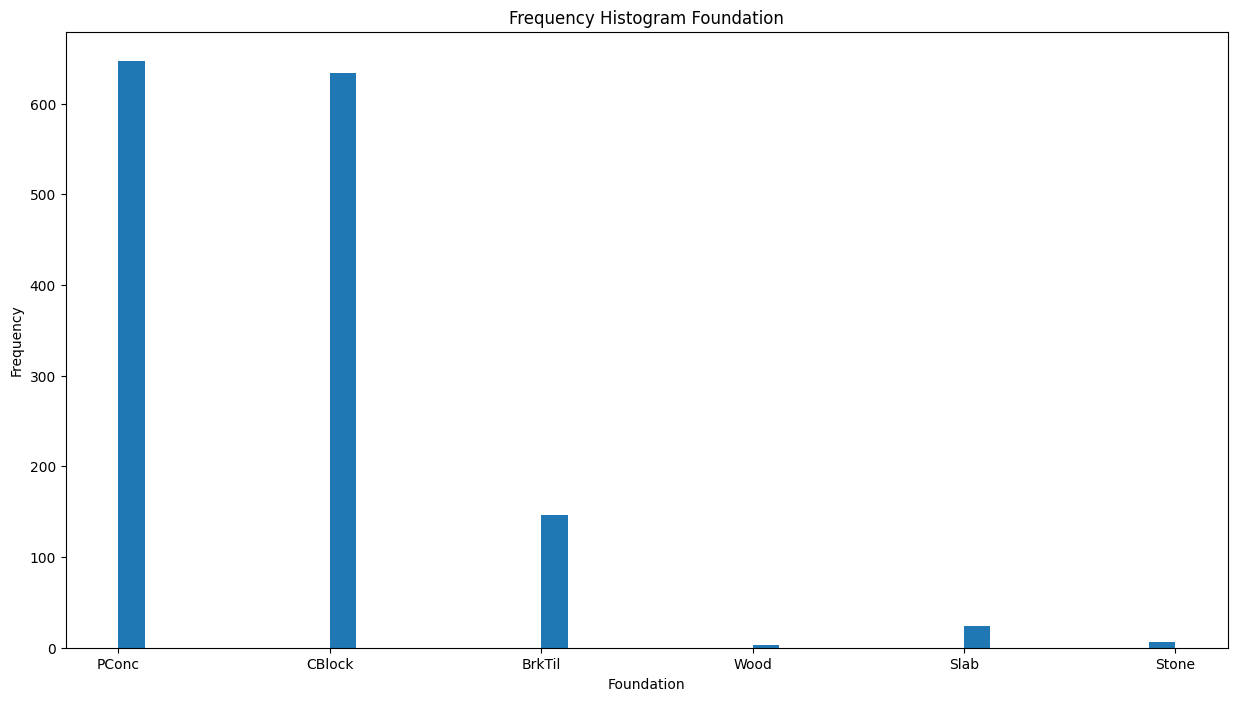

Unable to compute descriptive statistics



BsmtQual
Unable to plot BsmtQual
Unable to compute descriptive statistics



BsmtCond
Unable to plot BsmtCond
Unable to compute descriptive statistics



BsmtExposure
Unable to plot BsmtExposure
Unable to compute descriptive statistics



BsmtFinType1
Unable to plot BsmtFinType1
Unable to compute descriptive statistics



BsmtFinSF1


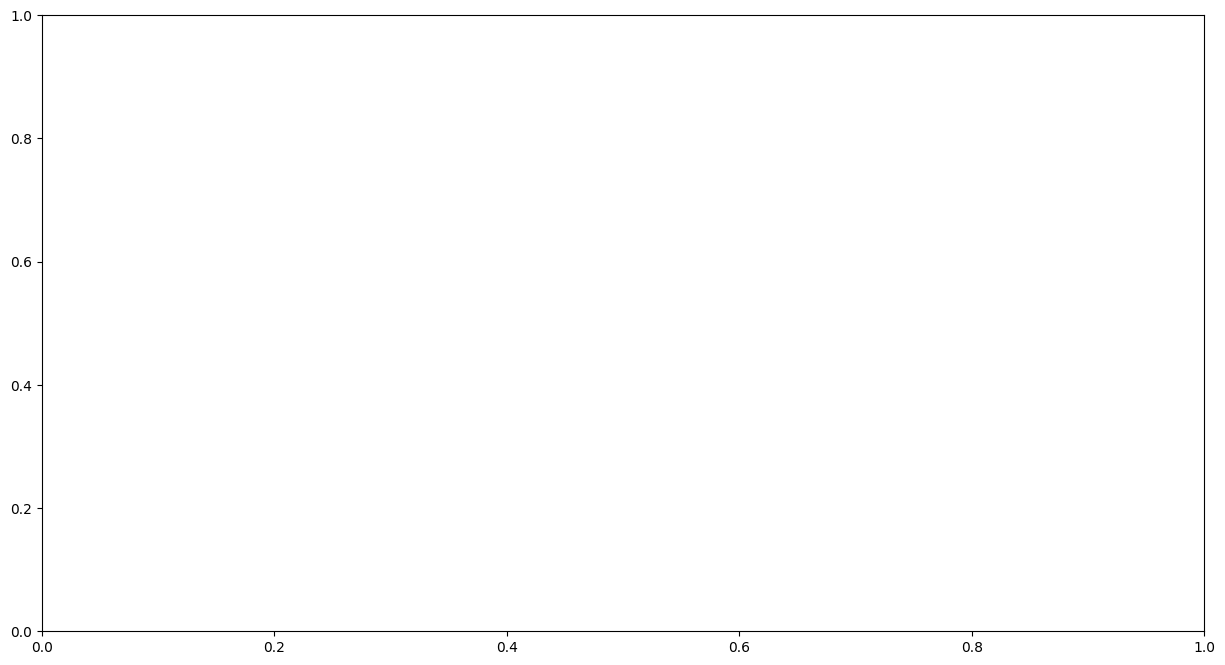

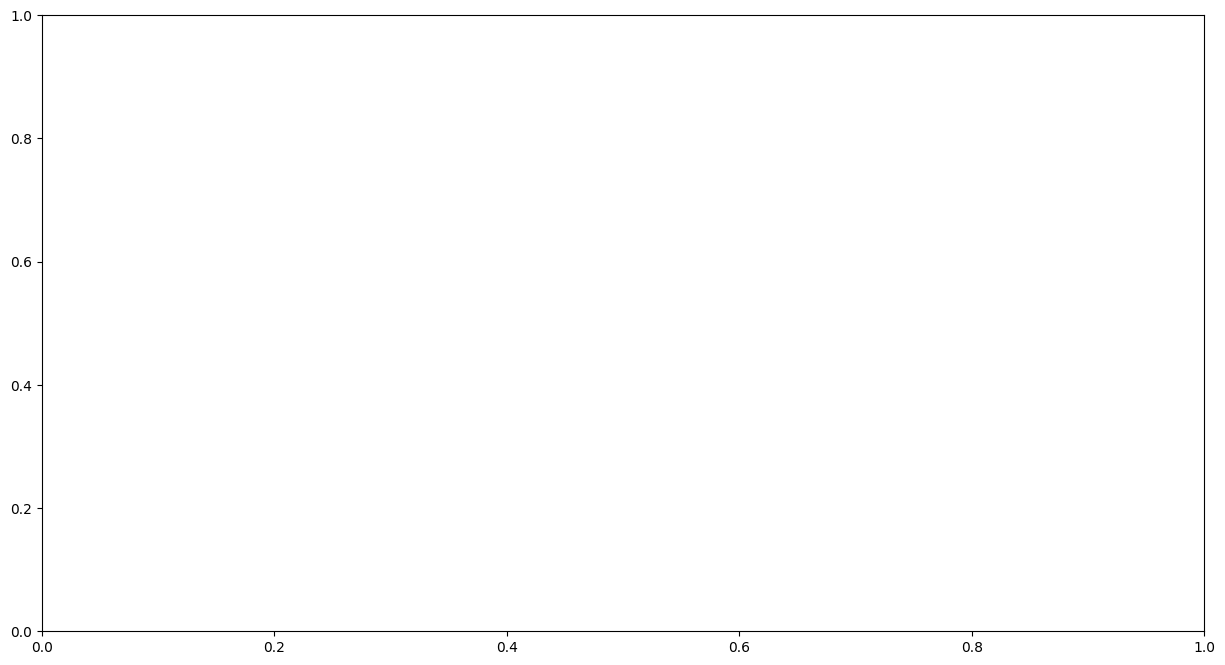

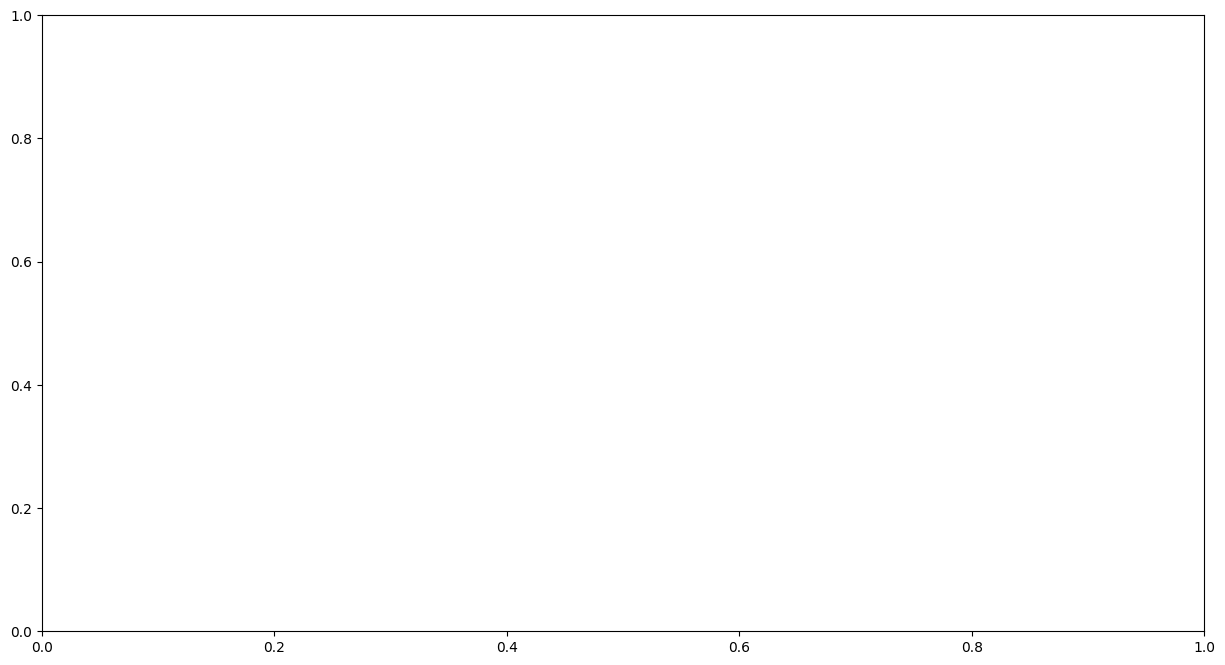

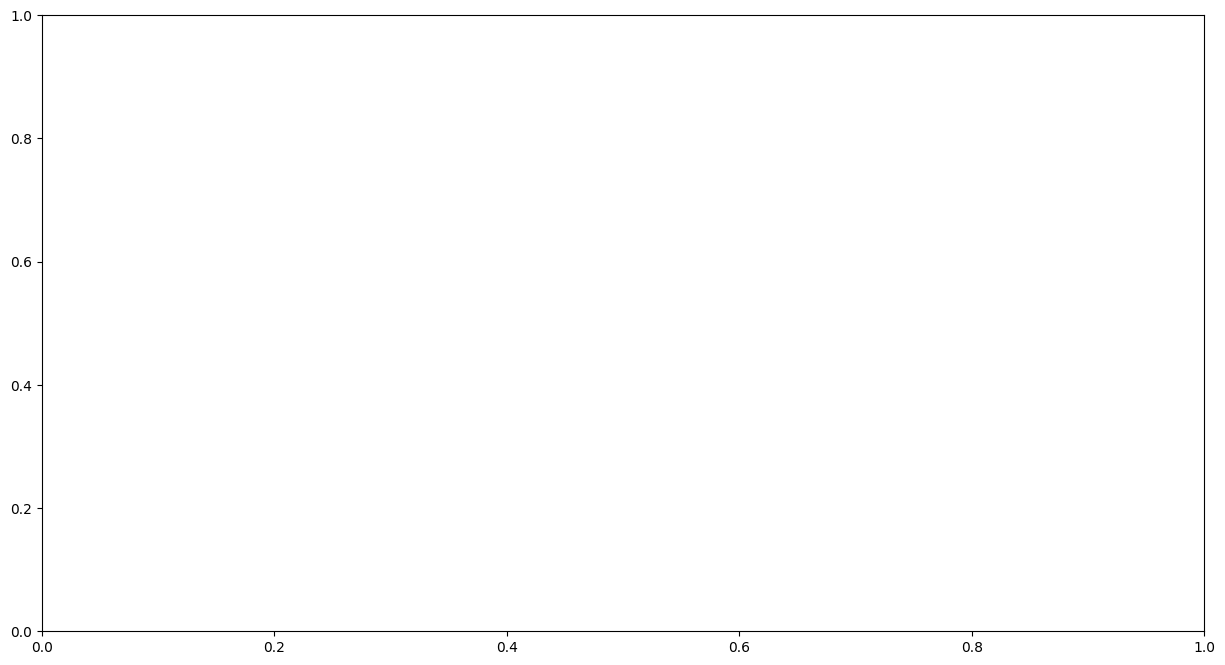

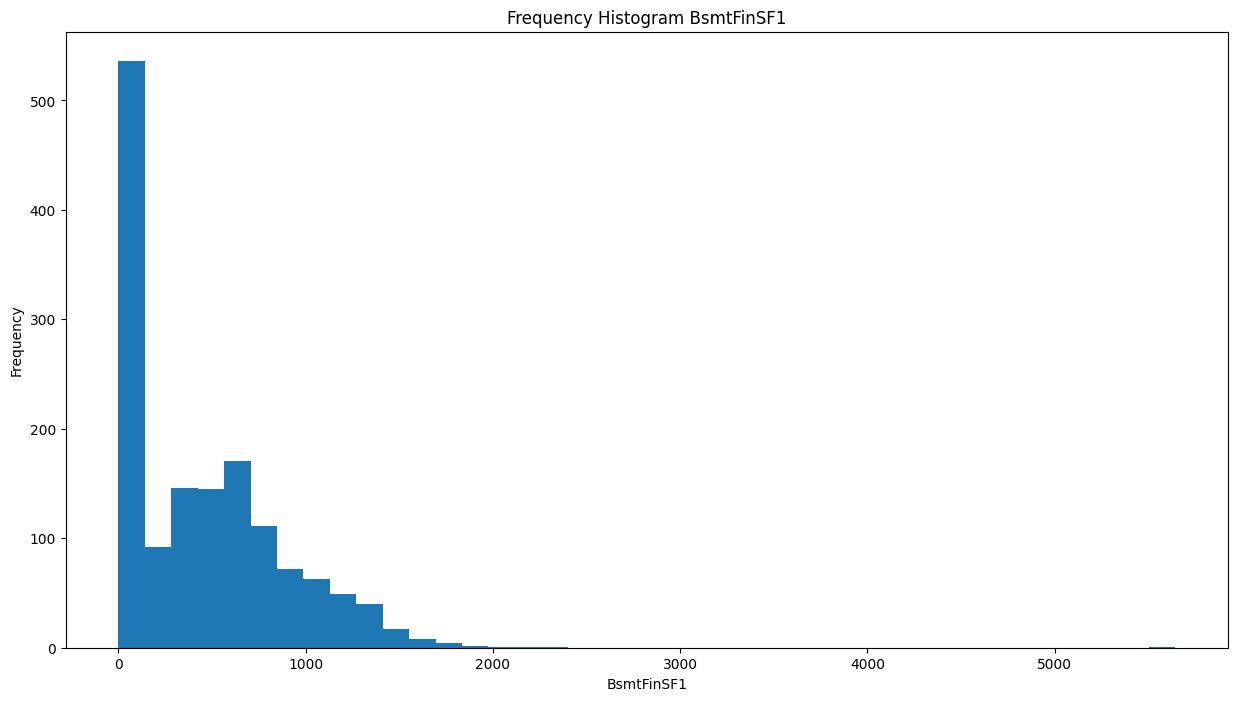

Mean: 443.6397260273973
Median: 383.5
Mode: 0    0
Name: BsmtFinSF1, dtype: int64
Variance: 208025.46846873913
Std Dev: 456.0980908409277
Range: 5644
IQR 712.25



BsmtFinType2
Unable to plot BsmtFinType2
Unable to compute descriptive statistics



BsmtFinSF2


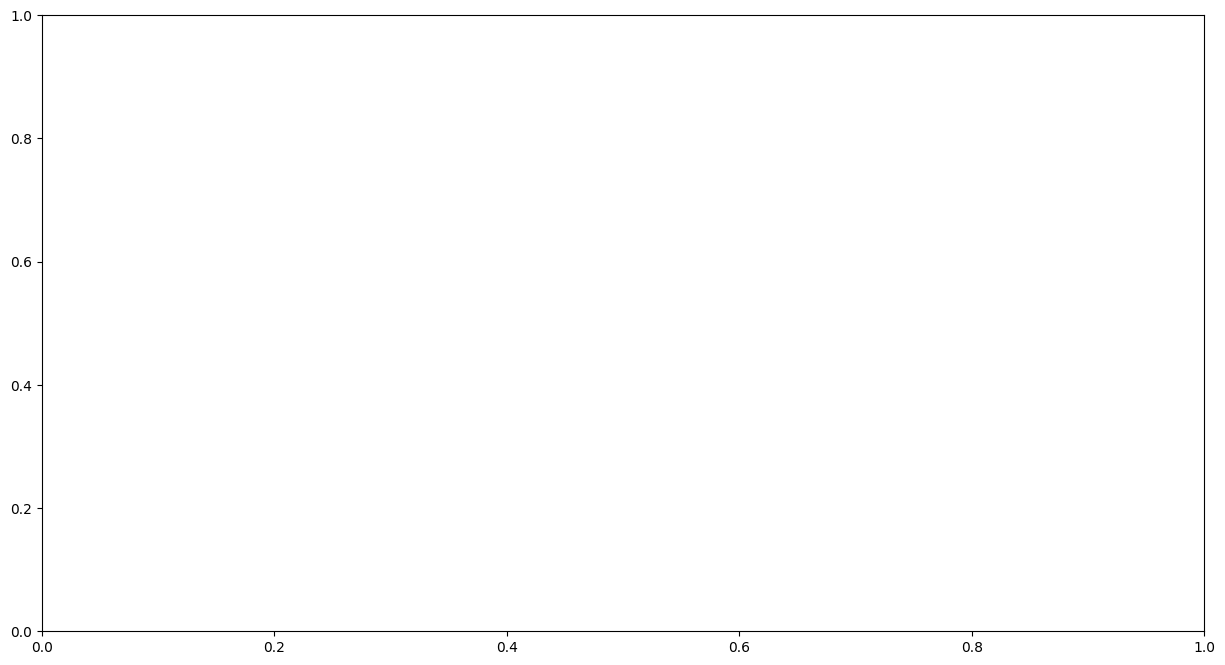

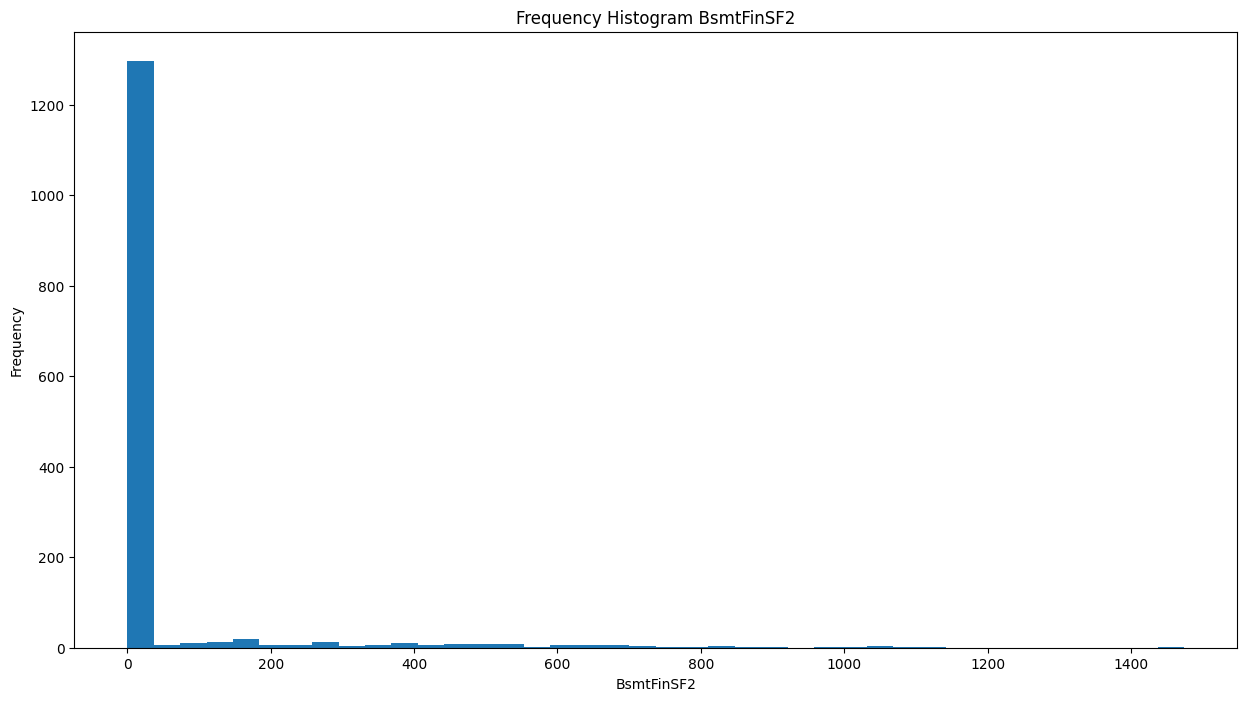

Mean: 46.54931506849315
Median: 0.0
Mode: 0    0
Name: BsmtFinSF2, dtype: int64
Variance: 26023.90777883144
Std Dev: 161.31927280654173
Range: 1474
IQR 0.0



BsmtUnfSF


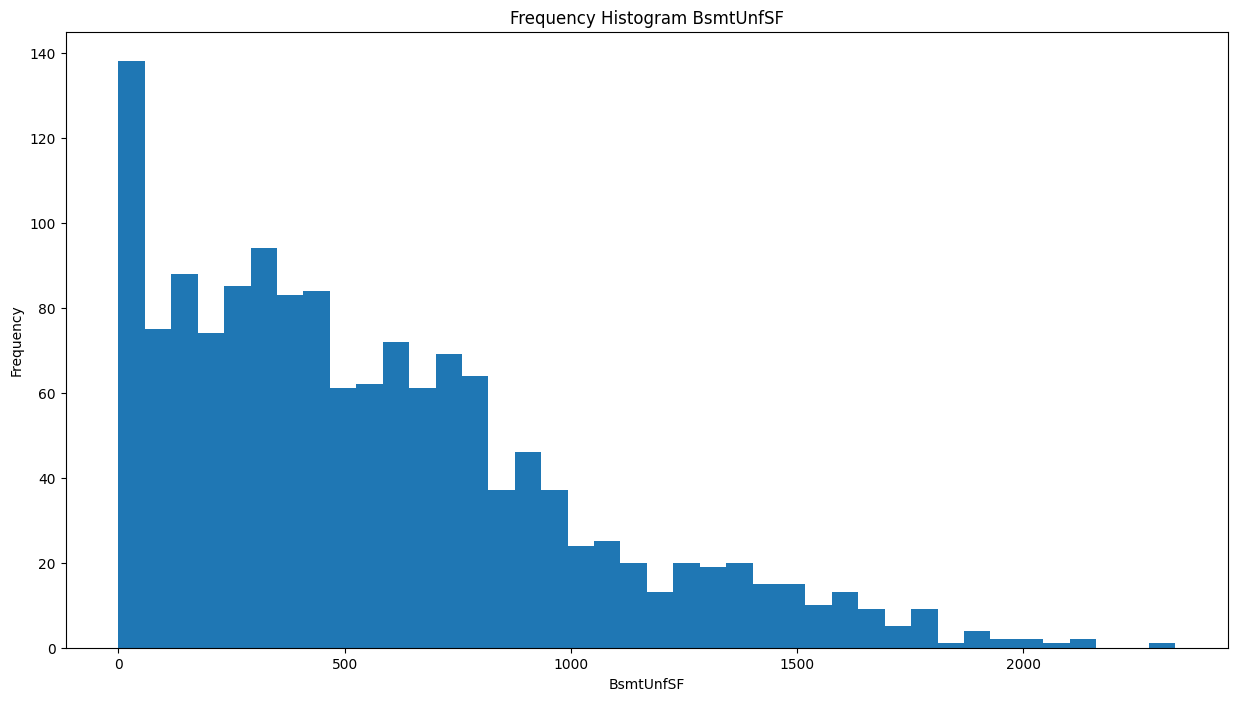

Mean: 567.2404109589041
Median: 477.5
Mode: 0    0
Name: BsmtUnfSF, dtype: int64
Variance: 195246.40617940604
Std Dev: 441.86695529243417
Range: 2336
IQR 585.0



TotalBsmtSF


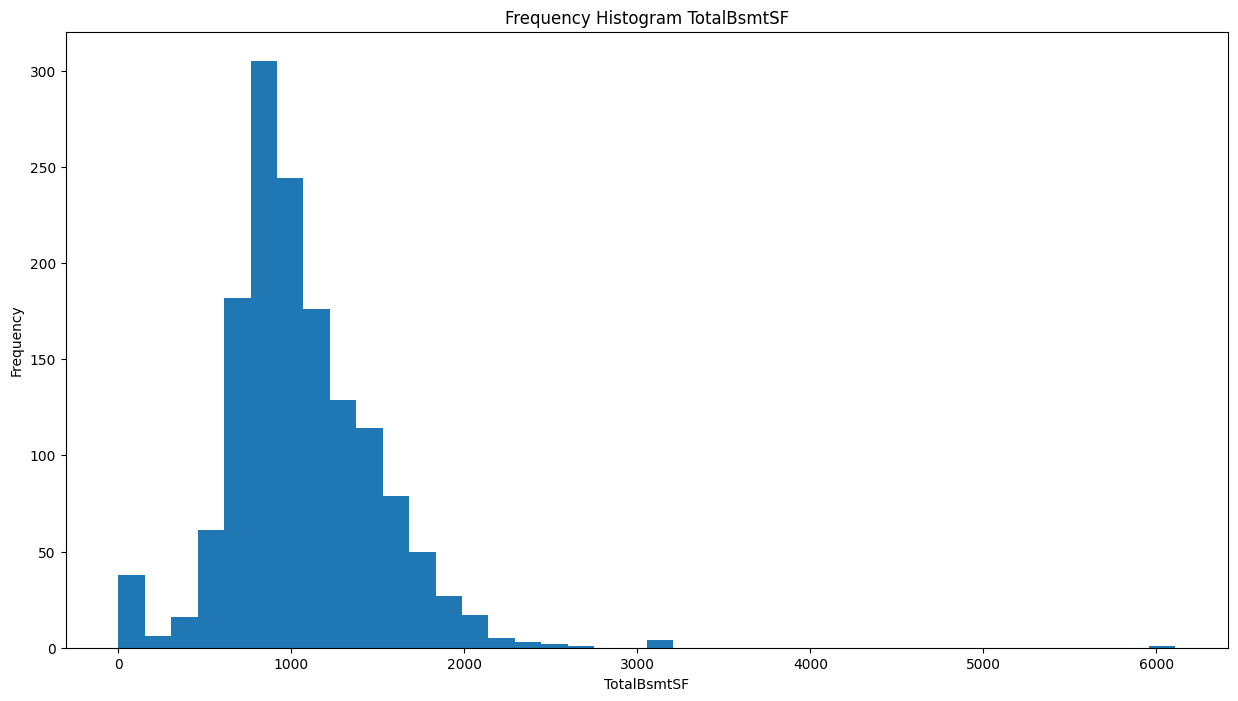

Mean: 1057.4294520547944
Median: 991.5
Mode: 0    0
Name: TotalBsmtSF, dtype: int64
Variance: 192462.36170908954
Std Dev: 438.7053244594708
Range: 6110
IQR 502.5



Heating


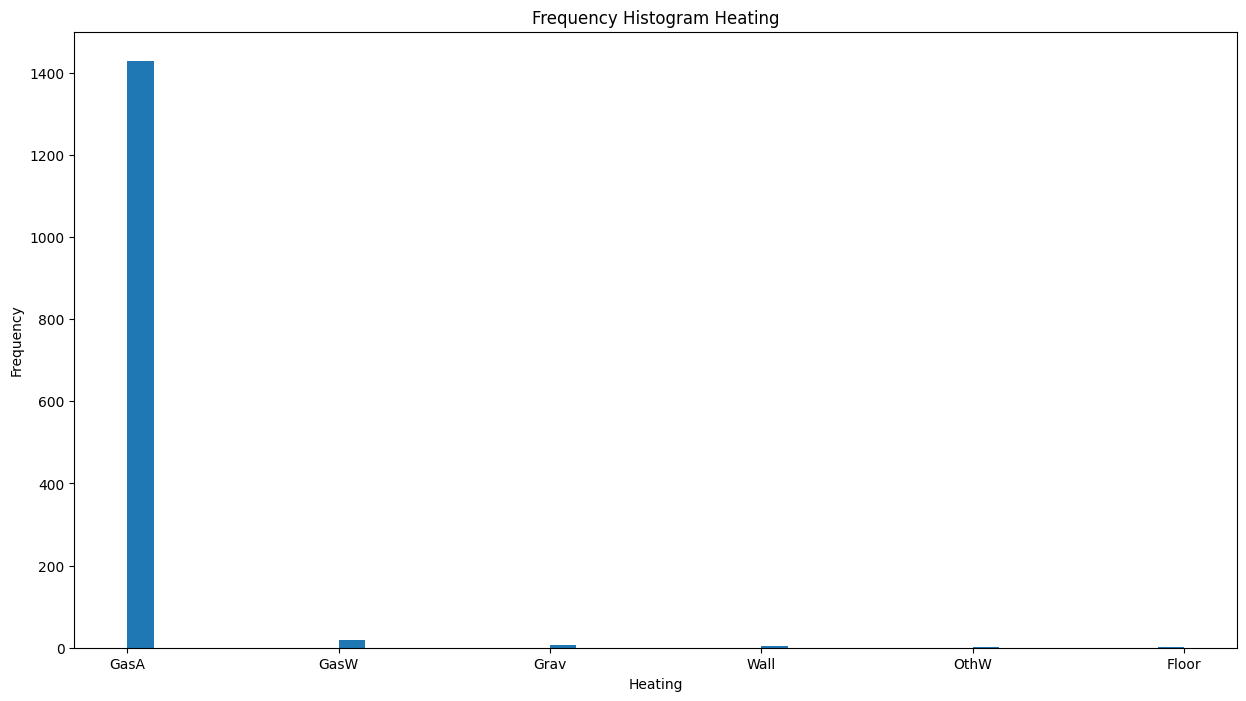

Unable to compute descriptive statistics



HeatingQC


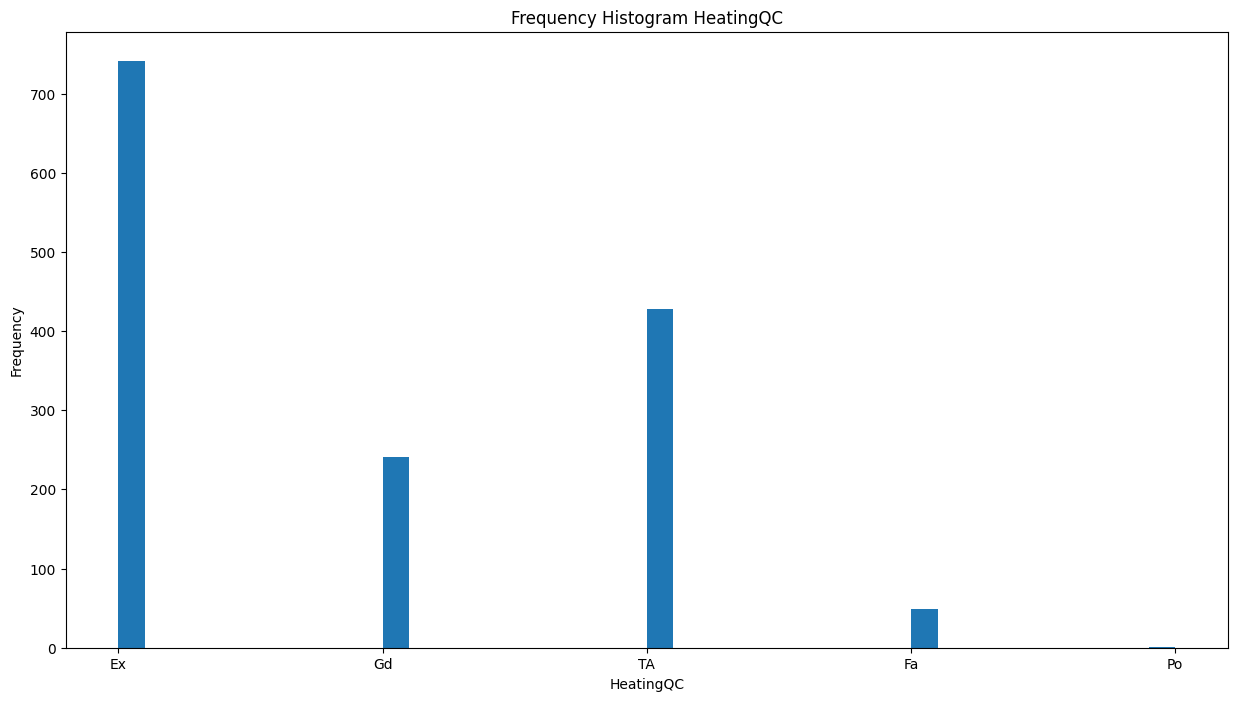

Unable to compute descriptive statistics



CentralAir


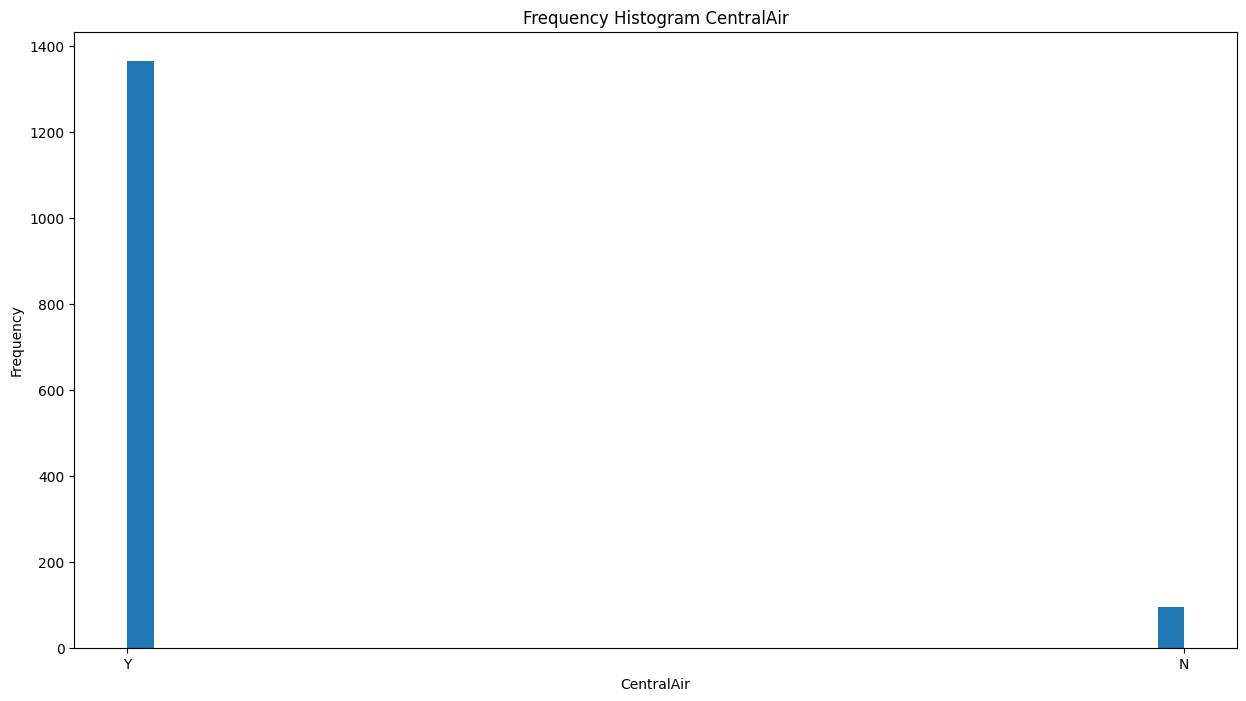

Unable to compute descriptive statistics



Electrical
Unable to plot Electrical
Unable to compute descriptive statistics



1stFlrSF


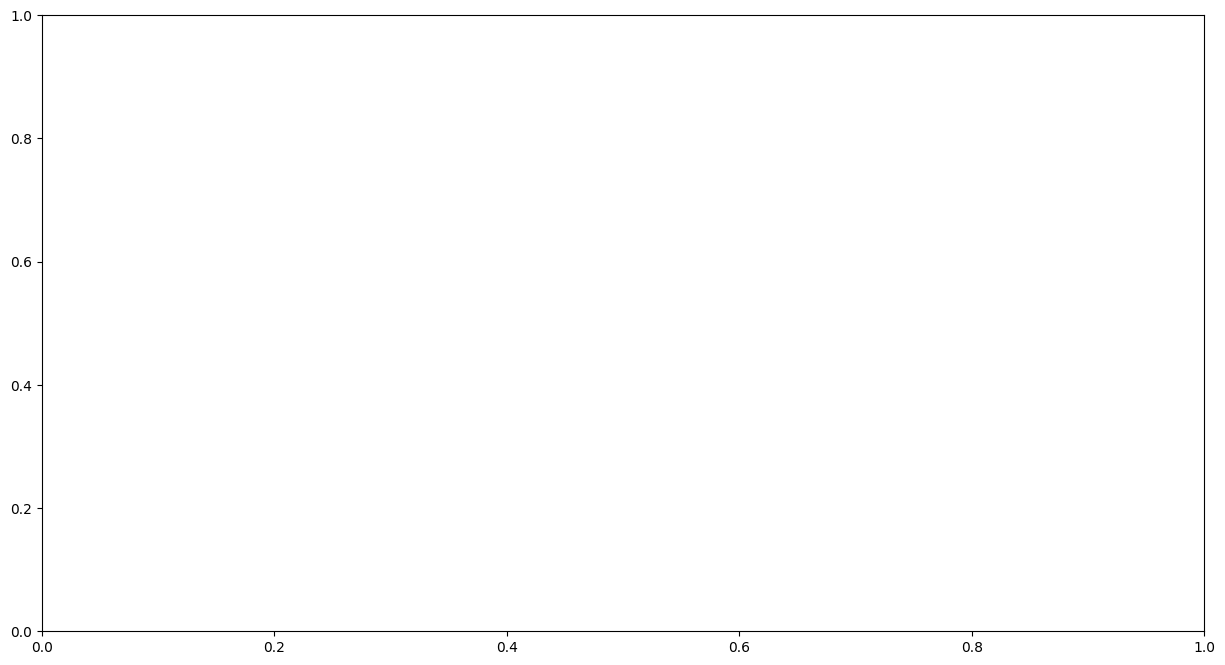

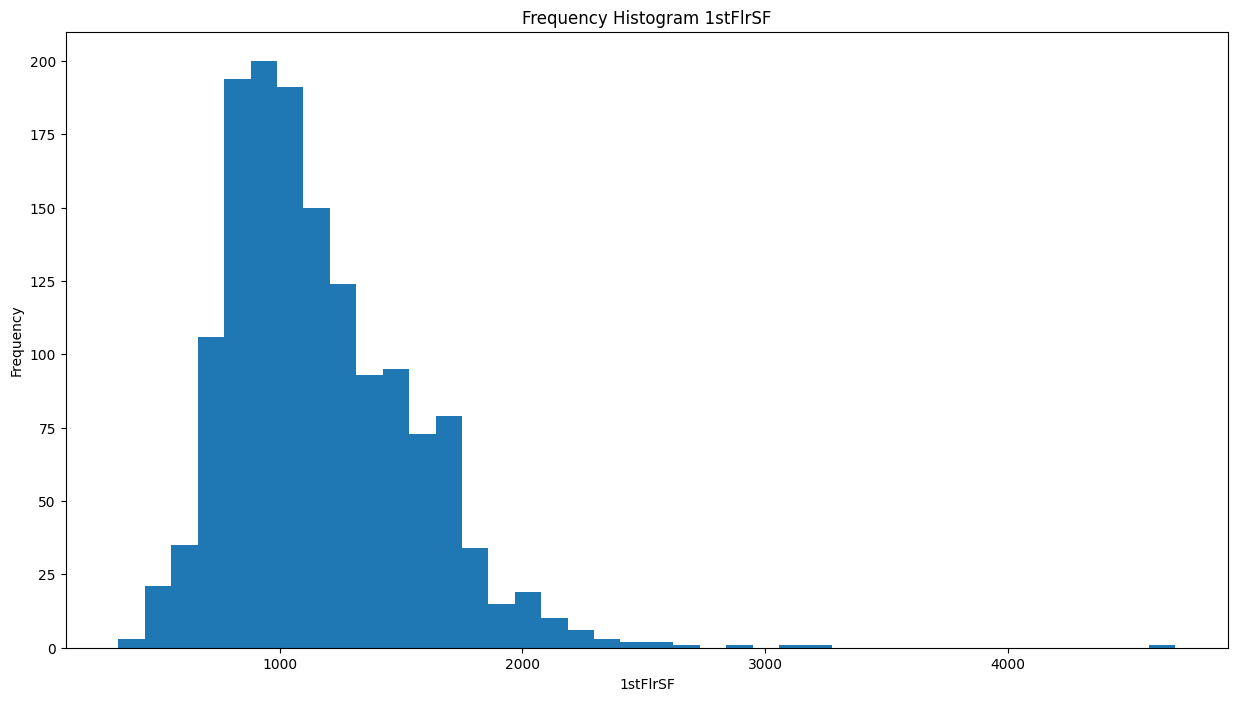

Mean: 1162.626712328767
Median: 1087.0
Mode: 0    864
Name: 1stFlrSF, dtype: int64
Variance: 149450.07920371433
Std Dev: 386.5877380410744
Range: 4358
IQR 509.25



2ndFlrSF


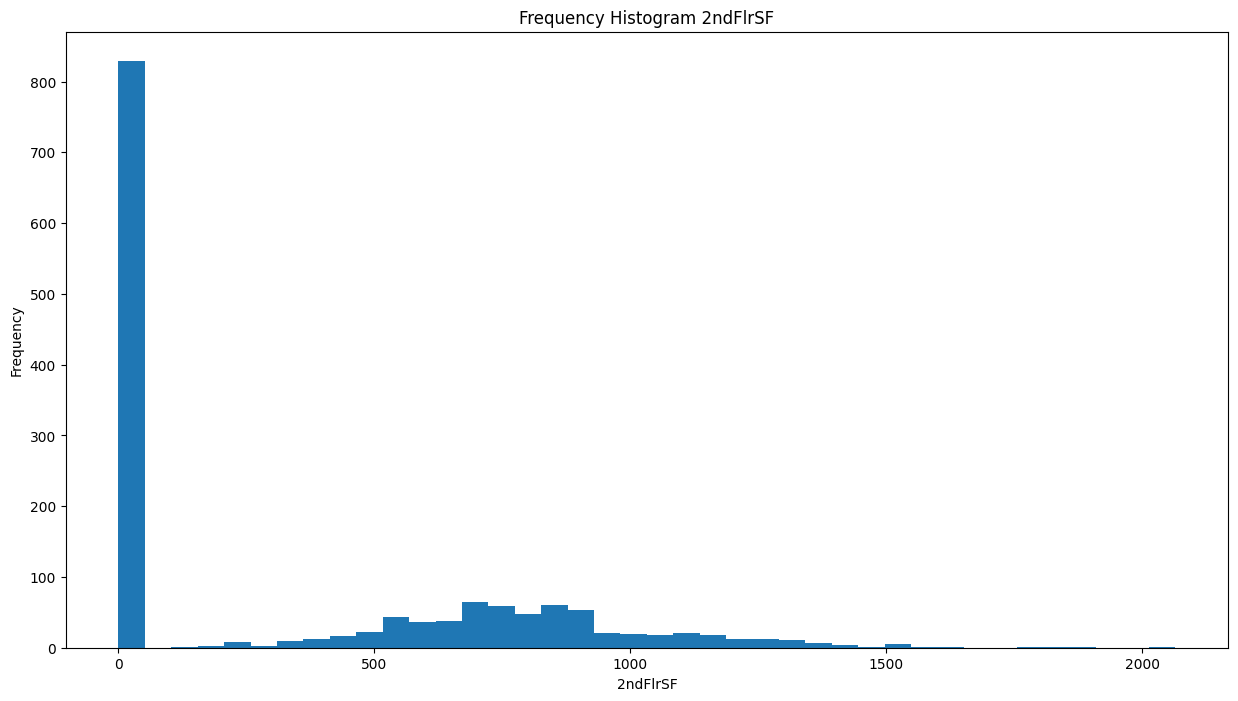

Mean: 346.99246575342465
Median: 0.0
Mode: 0    0
Name: 2ndFlrSF, dtype: int64
Variance: 190557.07533730177
Std Dev: 436.5284358862568
Range: 2065
IQR 728.0



LowQualFinSF


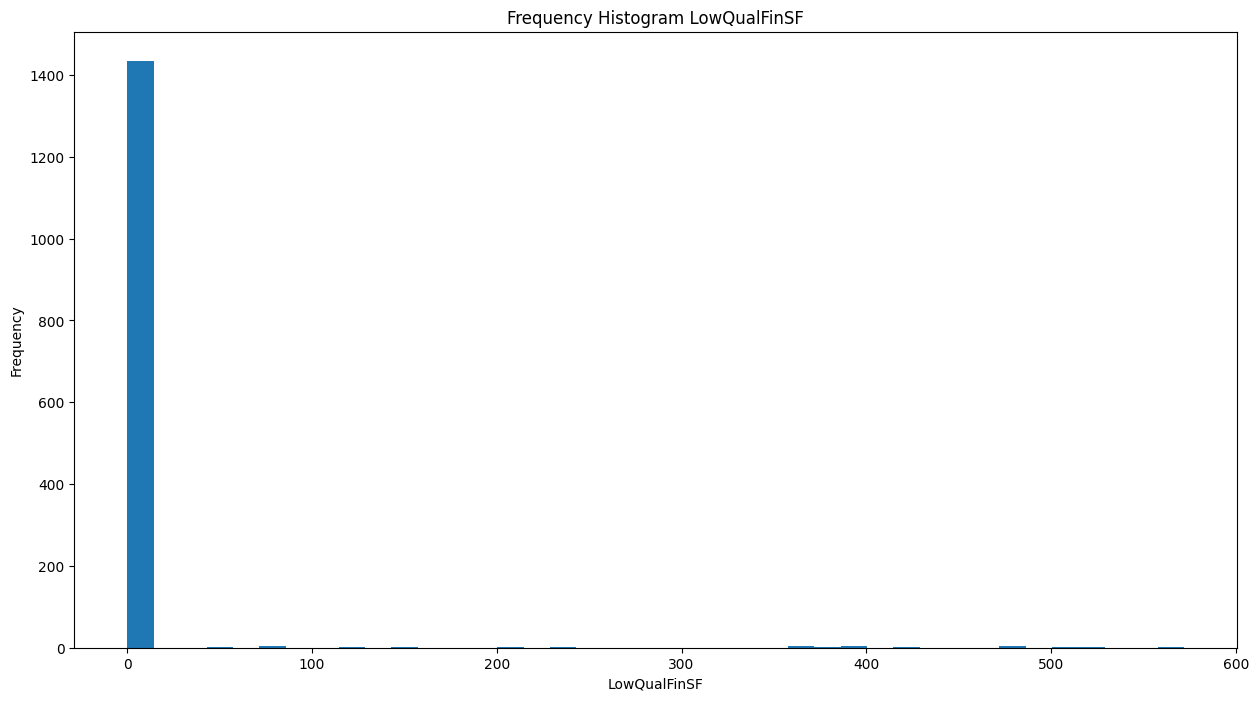

Mean: 5.844520547945206
Median: 0.0
Mode: 0    0
Name: LowQualFinSF, dtype: int64
Variance: 2364.2040480907363
Std Dev: 48.62308143352019
Range: 572
IQR 0.0



GrLivArea


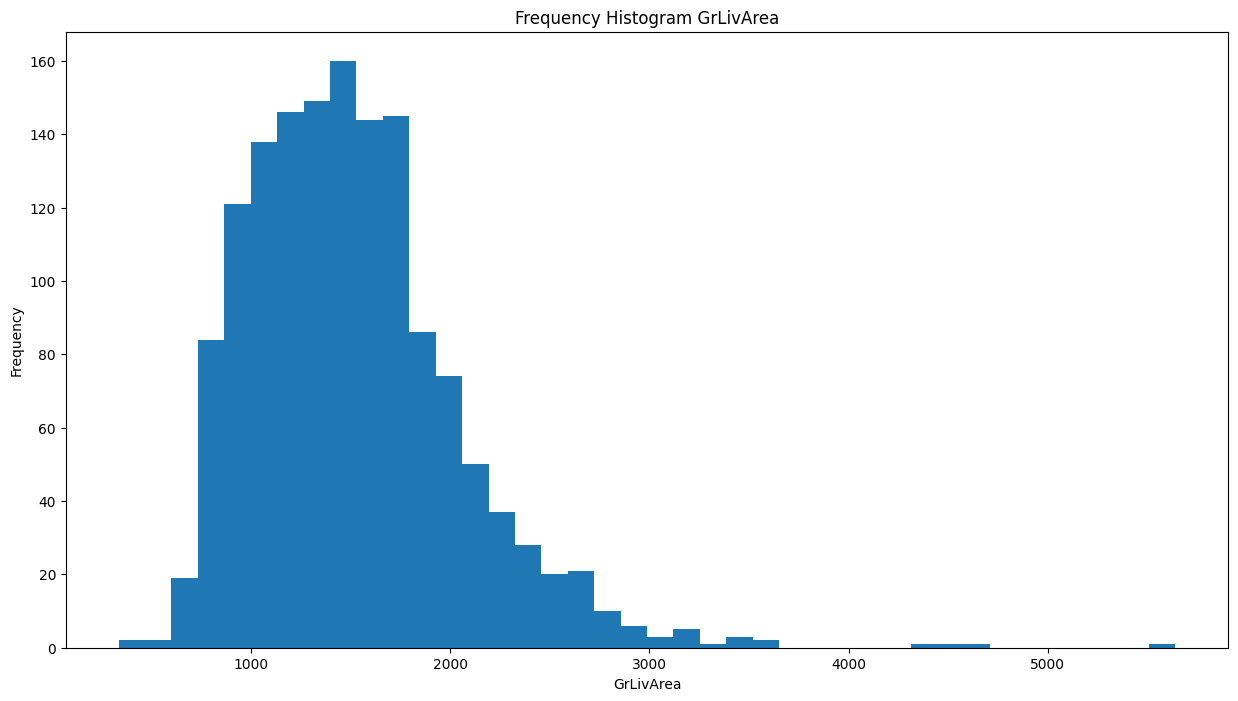

Mean: 1515.463698630137
Median: 1464.0
Mode: 0    864
Name: GrLivArea, dtype: int64
Variance: 276129.63336259587
Std Dev: 525.4803834232025
Range: 5308
IQR 647.25



BsmtFullBath


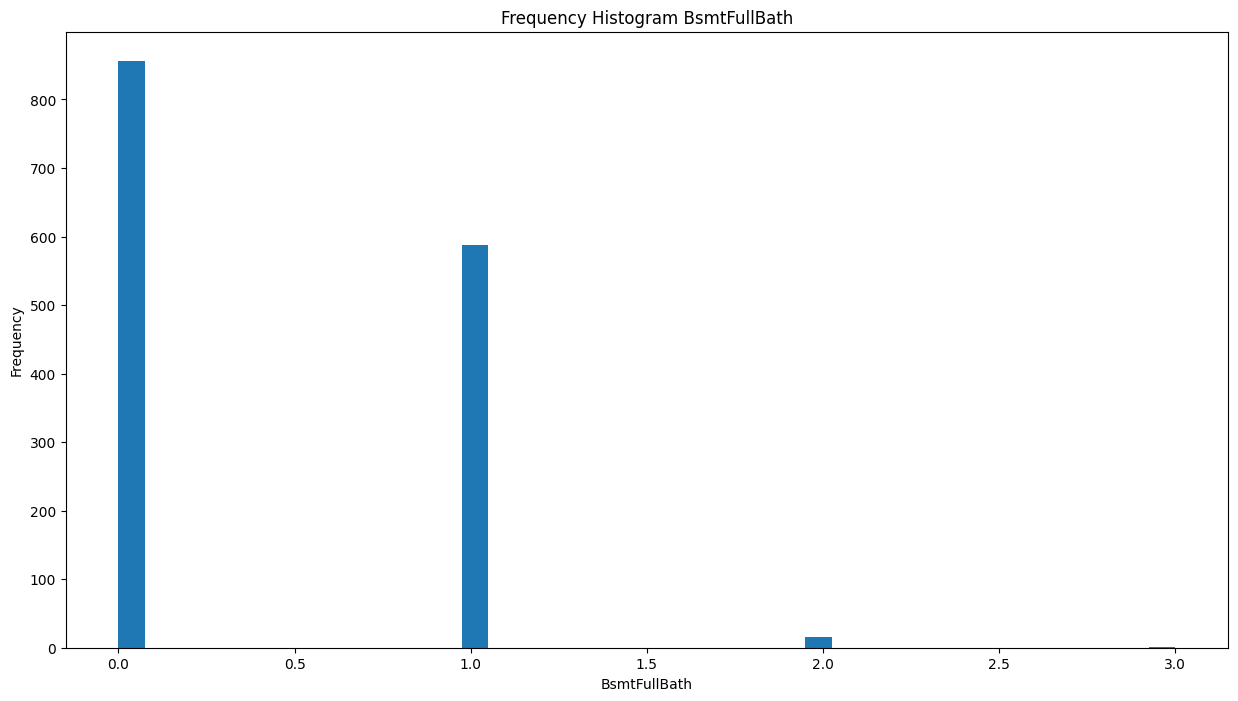

Mean: 0.42534246575342466
Median: 0.0
Mode: 0    0
Name: BsmtFullBath, dtype: int64
Variance: 0.2692682171124903
Std Dev: 0.5189106060898065
Range: 3
IQR 1.0



BsmtHalfBath


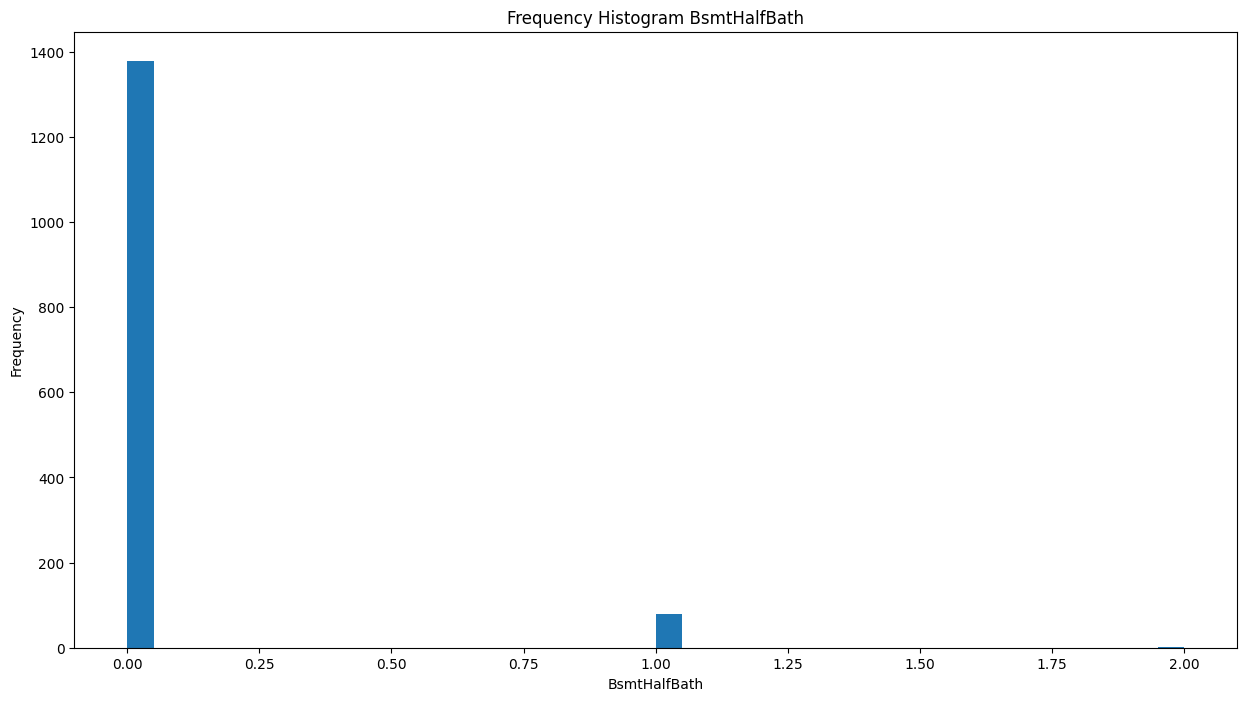

Mean: 0.057534246575342465
Median: 0.0
Mode: 0    0
Name: BsmtHalfBath, dtype: int64
Variance: 0.05700282610532642
Std Dev: 0.23875264627921178
Range: 2
IQR 0.0



FullBath


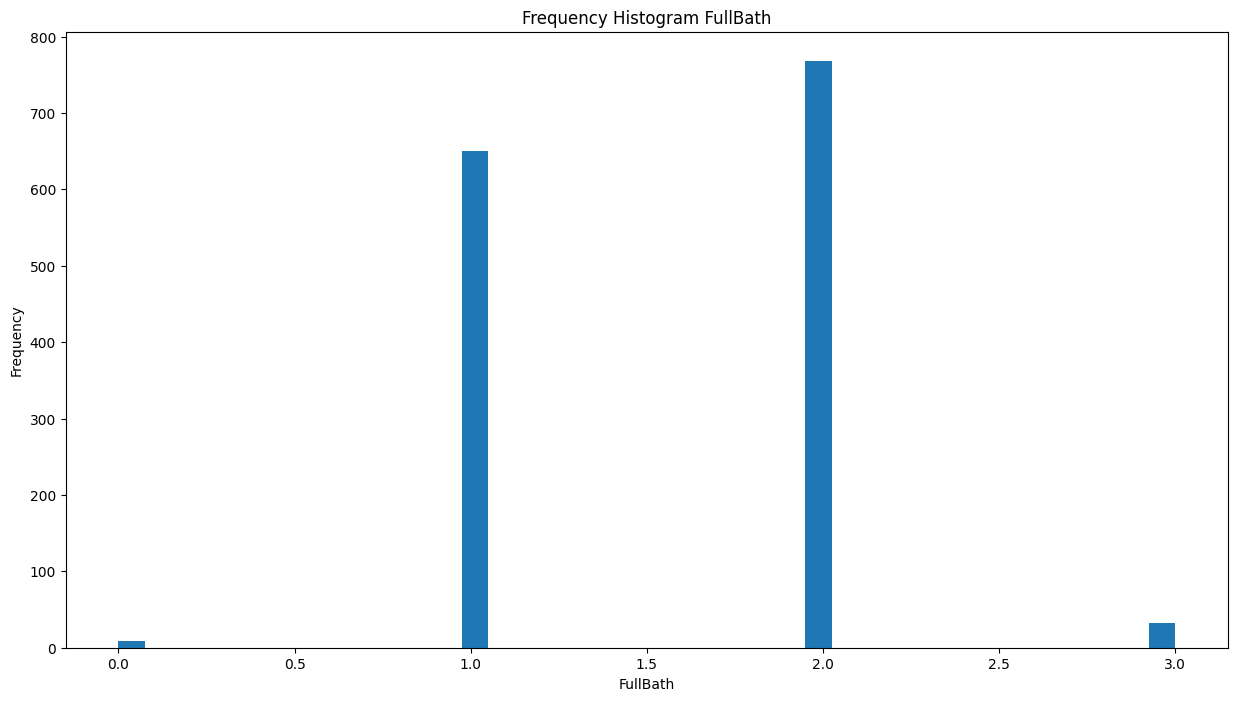

Mean: 1.5650684931506849
Median: 2.0
Mode: 0    2
Name: FullBath, dtype: int64
Variance: 0.30350822011698764
Std Dev: 0.5509158012954317
Range: 3
IQR 1.0



HalfBath


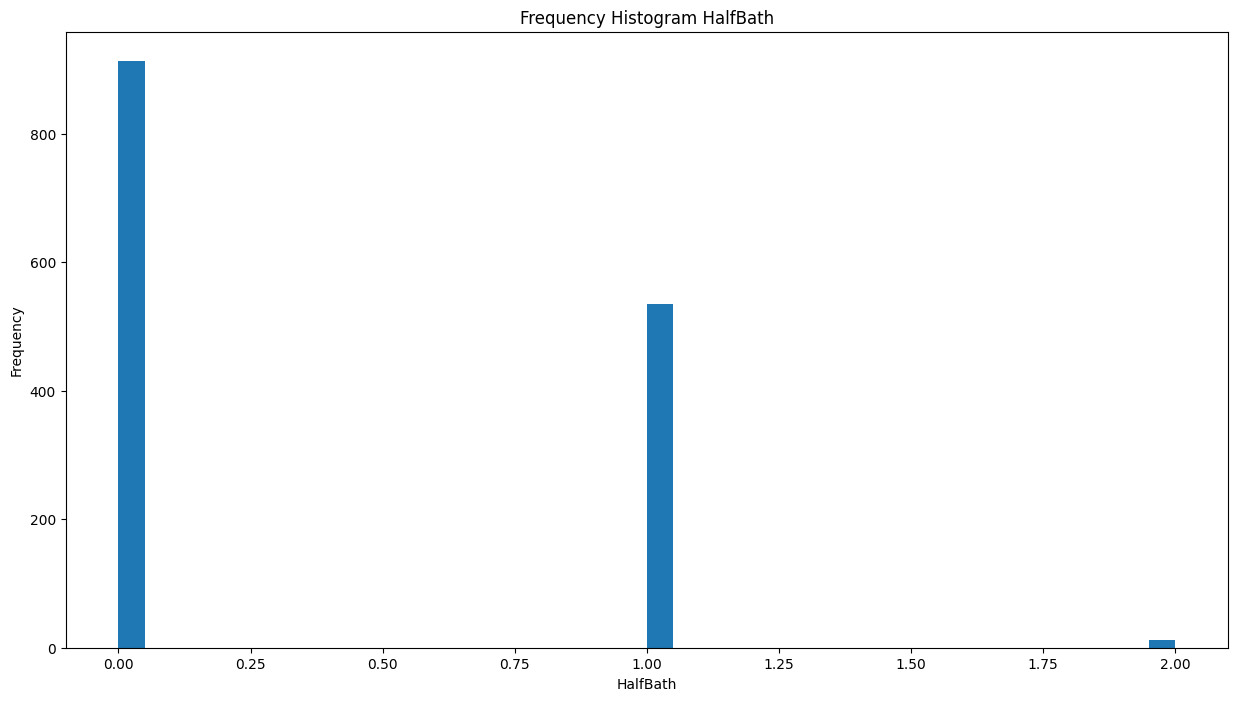

Mean: 0.38287671232876713
Median: 0.0
Mode: 0    0
Name: HalfBath, dtype: int64
Variance: 0.25289370651694265
Std Dev: 0.5028853810928914
Range: 2
IQR 1.0



BedroomAbvGr


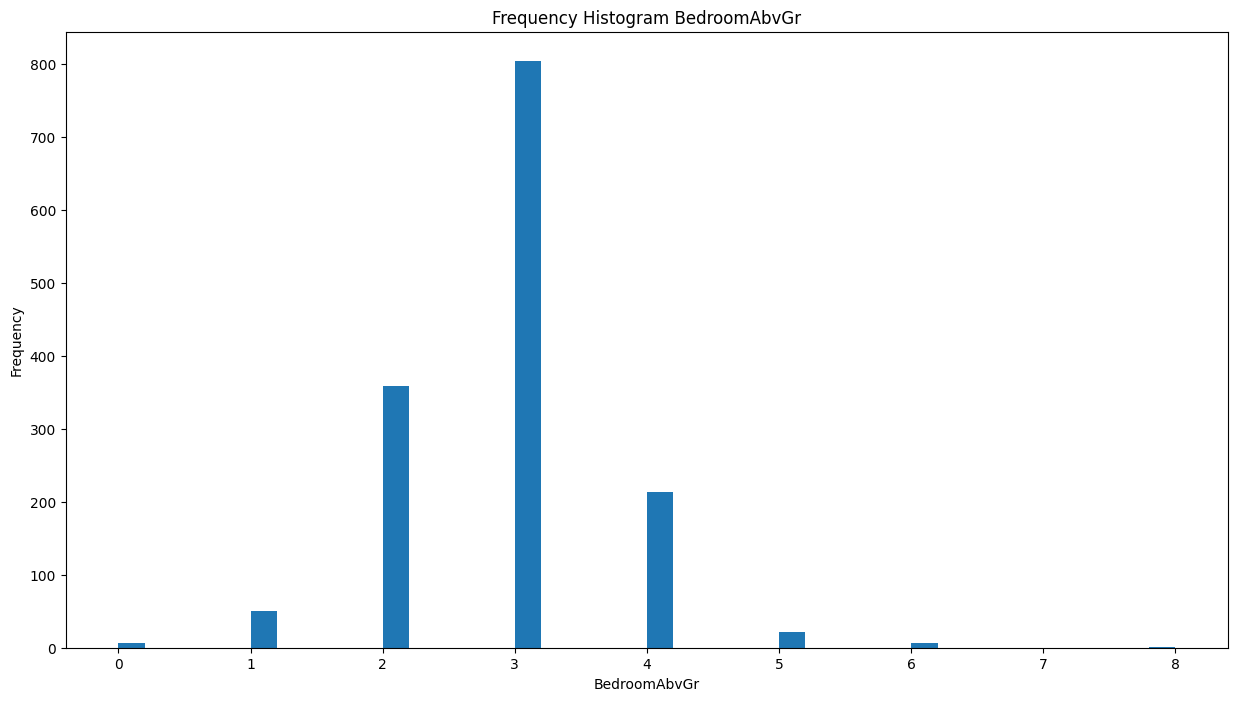

Mean: 2.8664383561643834
Median: 3.0
Mode: 0    3
Name: BedroomAbvGr, dtype: int64
Variance: 0.6654938173077826
Std Dev: 0.8157780441442284
Range: 8
IQR 1.0



KitchenAbvGr


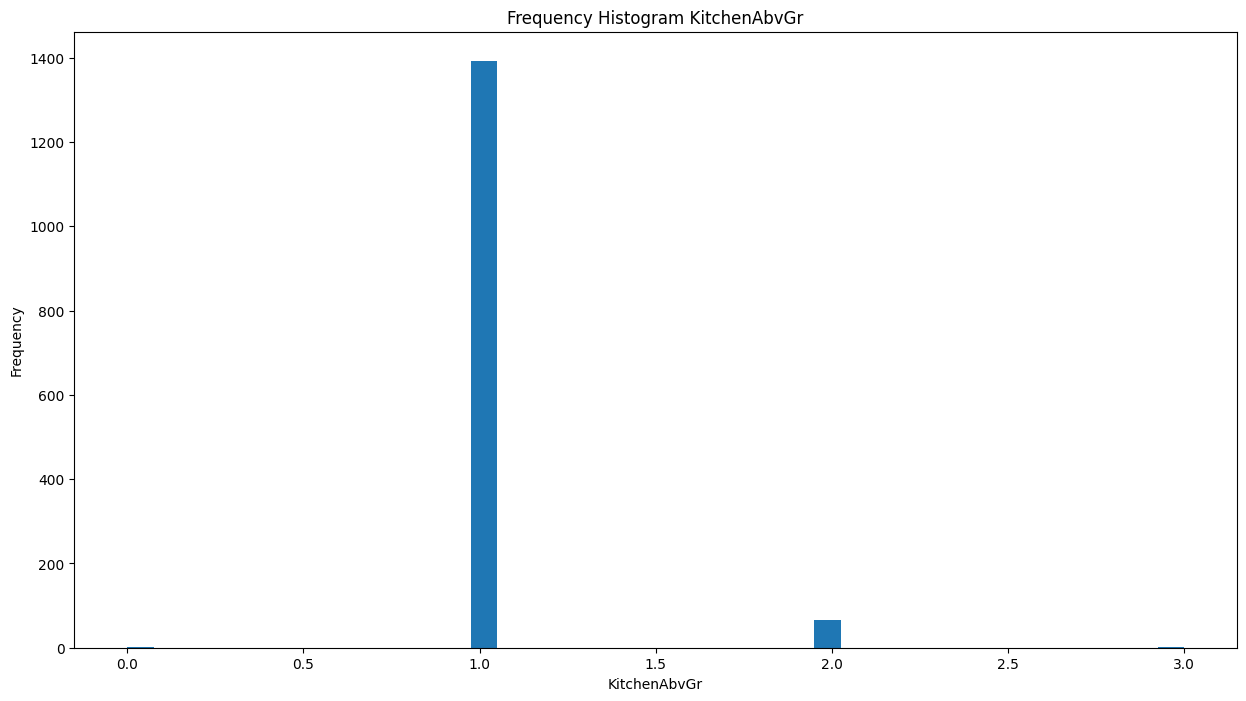

Mean: 1.0465753424657533
Median: 1.0
Mode: 0    1
Name: KitchenAbvGr, dtype: int64
Variance: 0.048548921667120465
Std Dev: 0.22033819838403068
Range: 3
IQR 0.0



KitchenQual


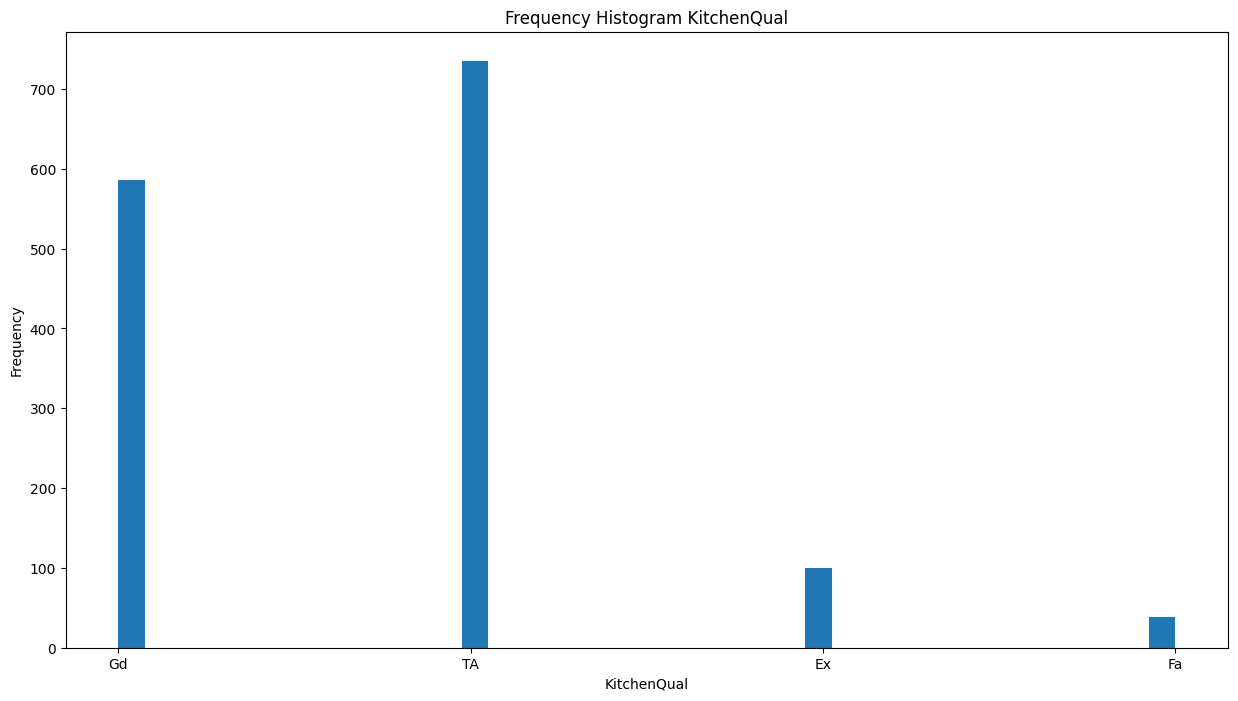

Unable to compute descriptive statistics



TotRmsAbvGrd


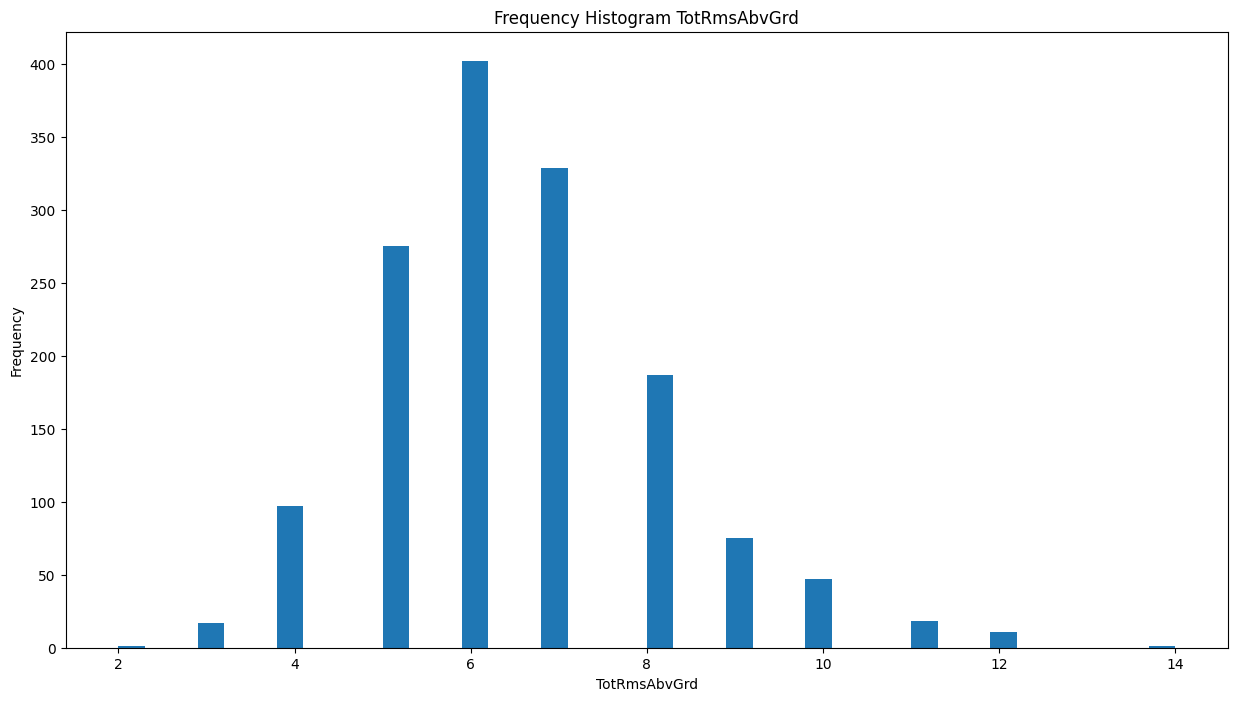

Mean: 6.517808219178082
Median: 6.0
Mode: 0    6
Name: TotRmsAbvGrd, dtype: int64
Variance: 2.641903349075647
Std Dev: 1.6253932905840505
Range: 12
IQR 2.0



Functional


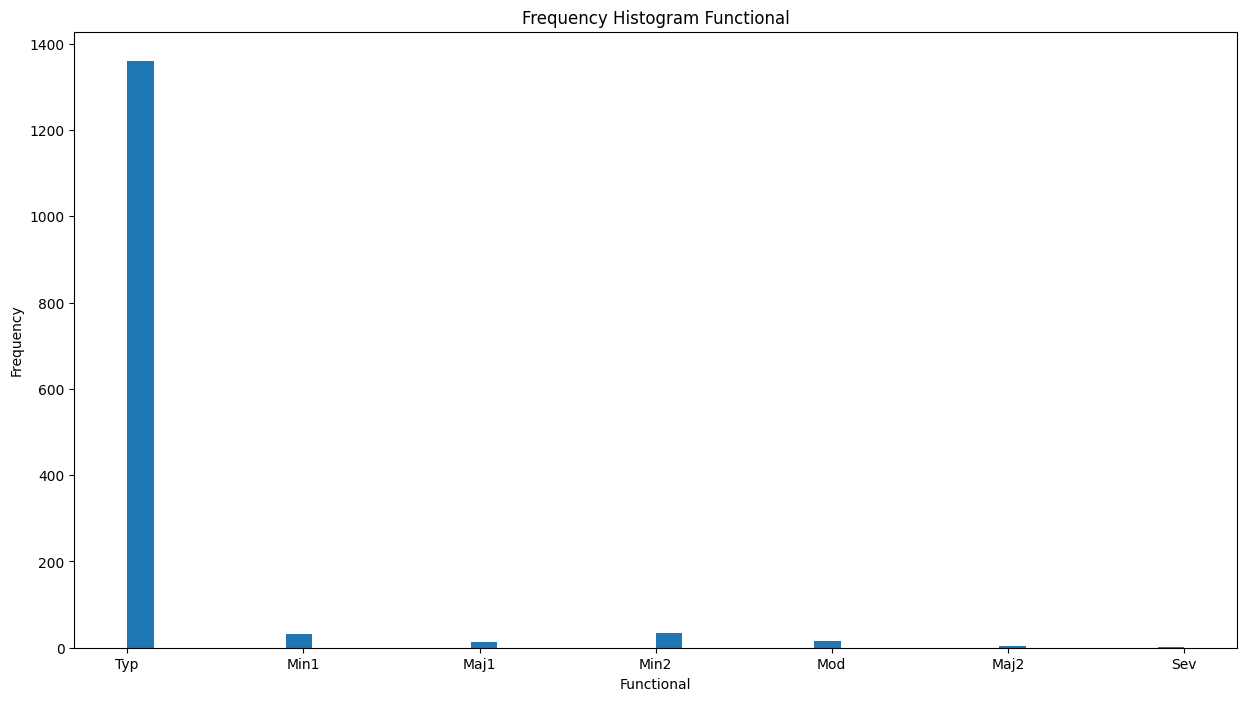

Unable to compute descriptive statistics



Fireplaces


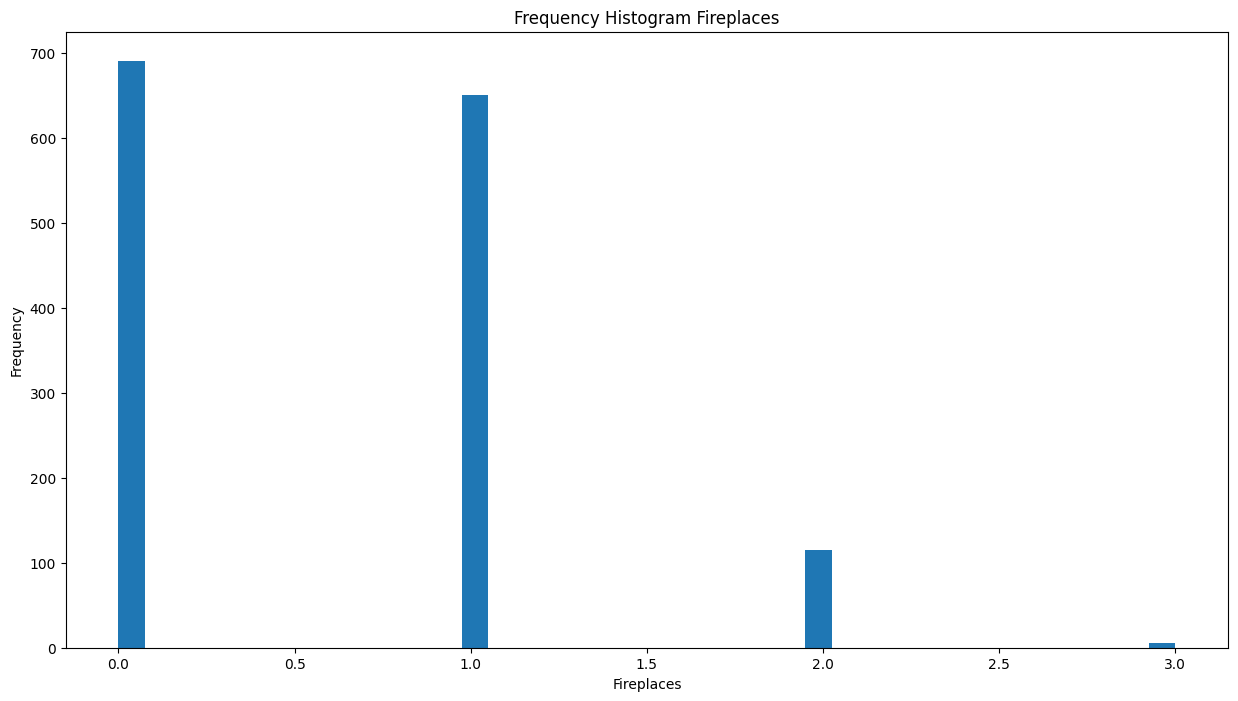

Mean: 0.613013698630137
Median: 1.0
Mode: 0    0
Name: Fireplaces, dtype: int64
Variance: 0.41559474964086873
Std Dev: 0.6446663863122295
Range: 3
IQR 1.0



FireplaceQu
Unable to plot FireplaceQu
Unable to compute descriptive statistics



GarageType
Unable to plot GarageType
Unable to compute descriptive statistics



GarageYrBlt


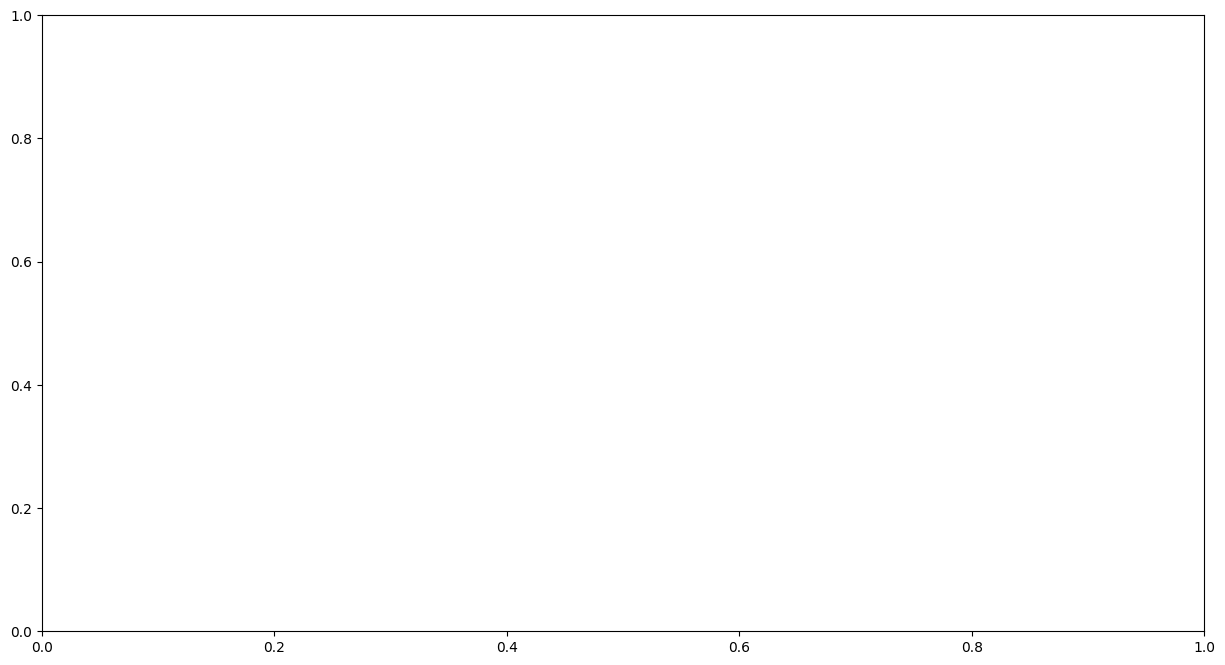

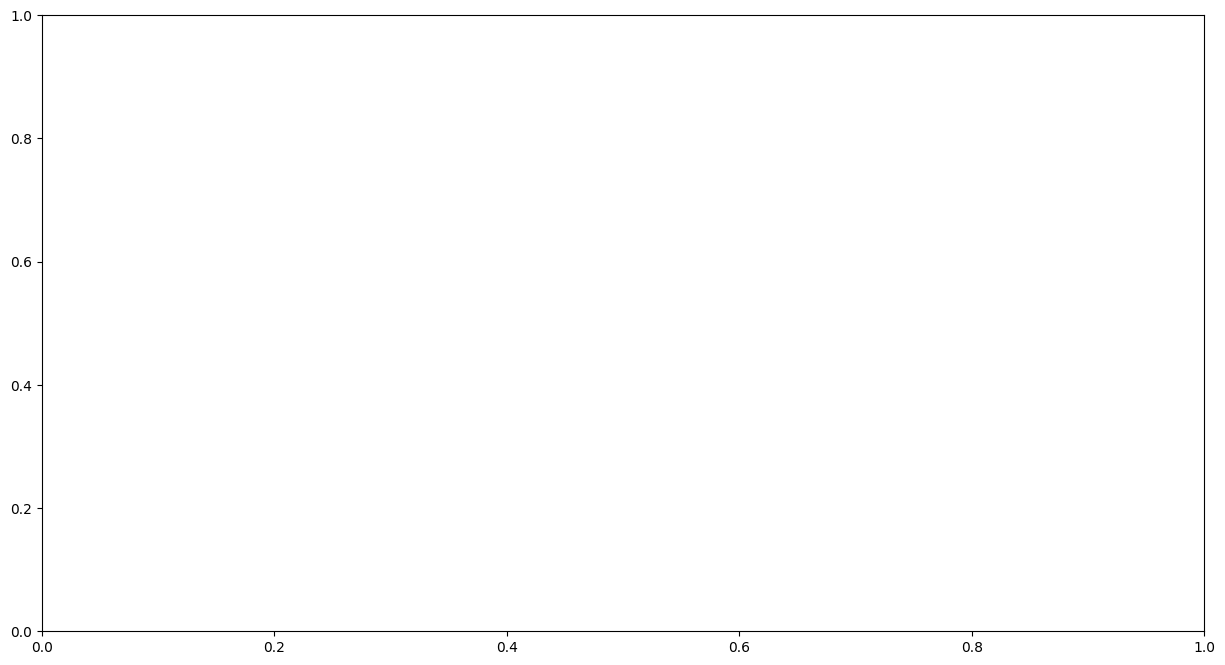

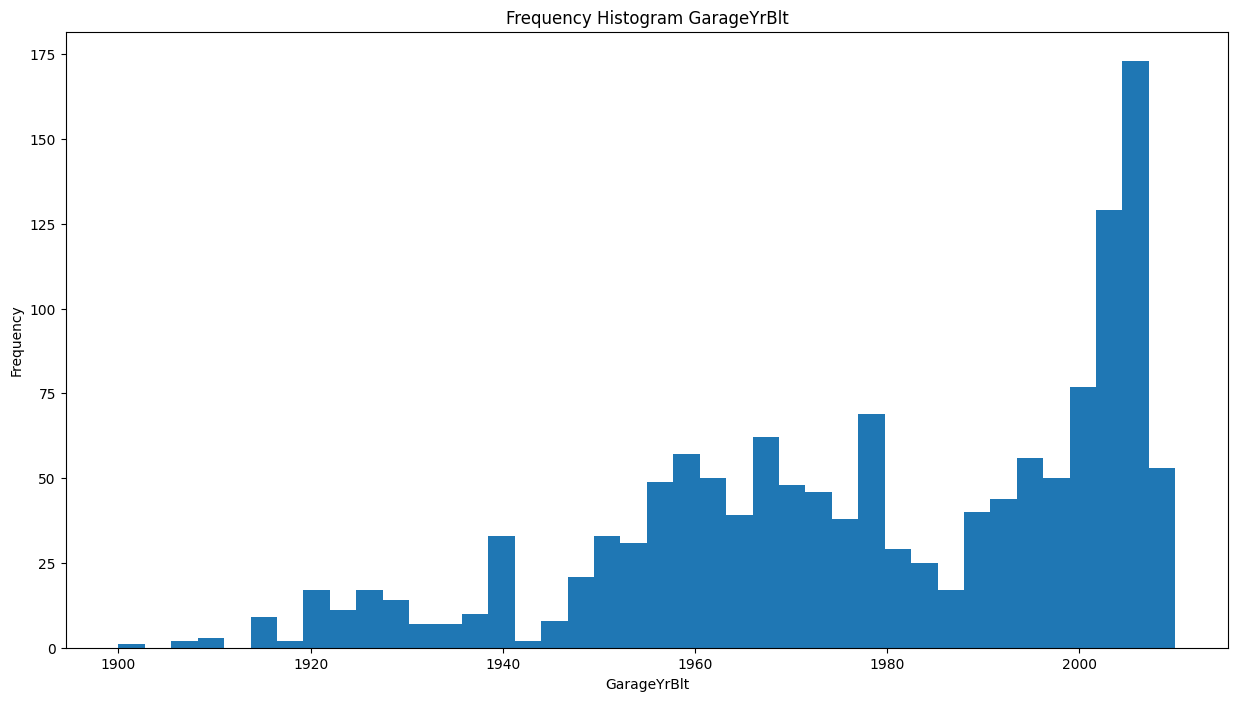

Mean: 1978.5061638868744
Median: 1980.0
Mode: 0    2005.0
Name: GarageYrBlt, dtype: float64
Variance: 609.5825091487385
Std Dev: 24.689724768590242
Range: 110.0
IQR 41.0



GarageFinish
Unable to plot GarageFinish
Unable to compute descriptive statistics



GarageCars


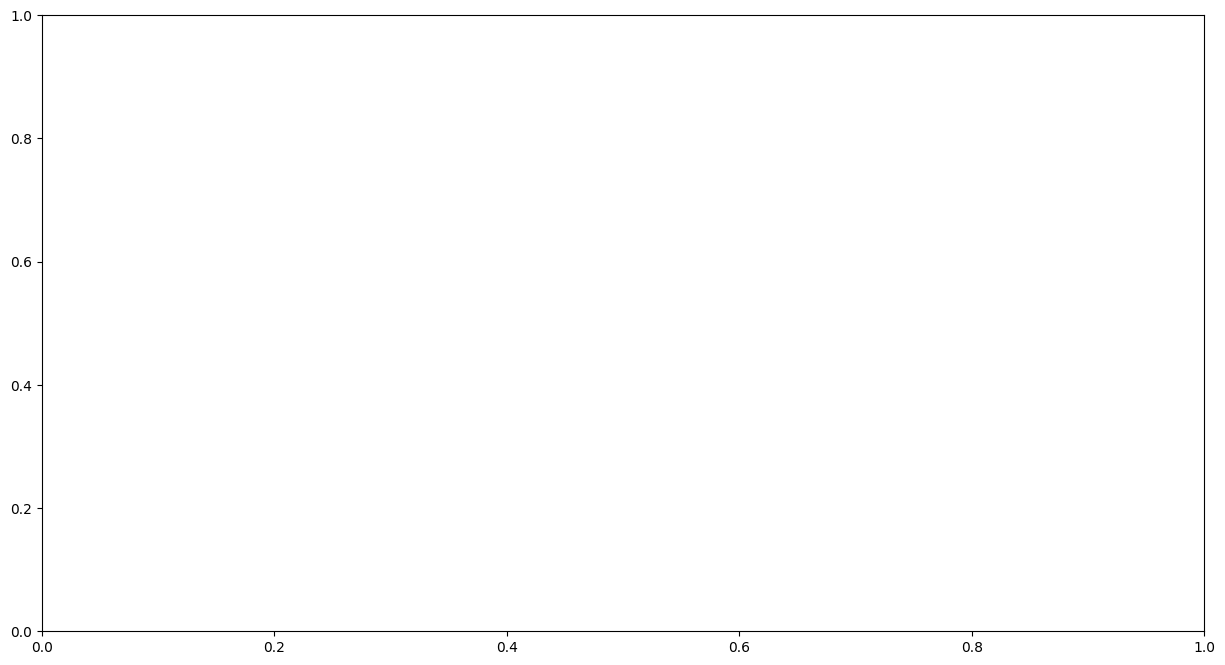

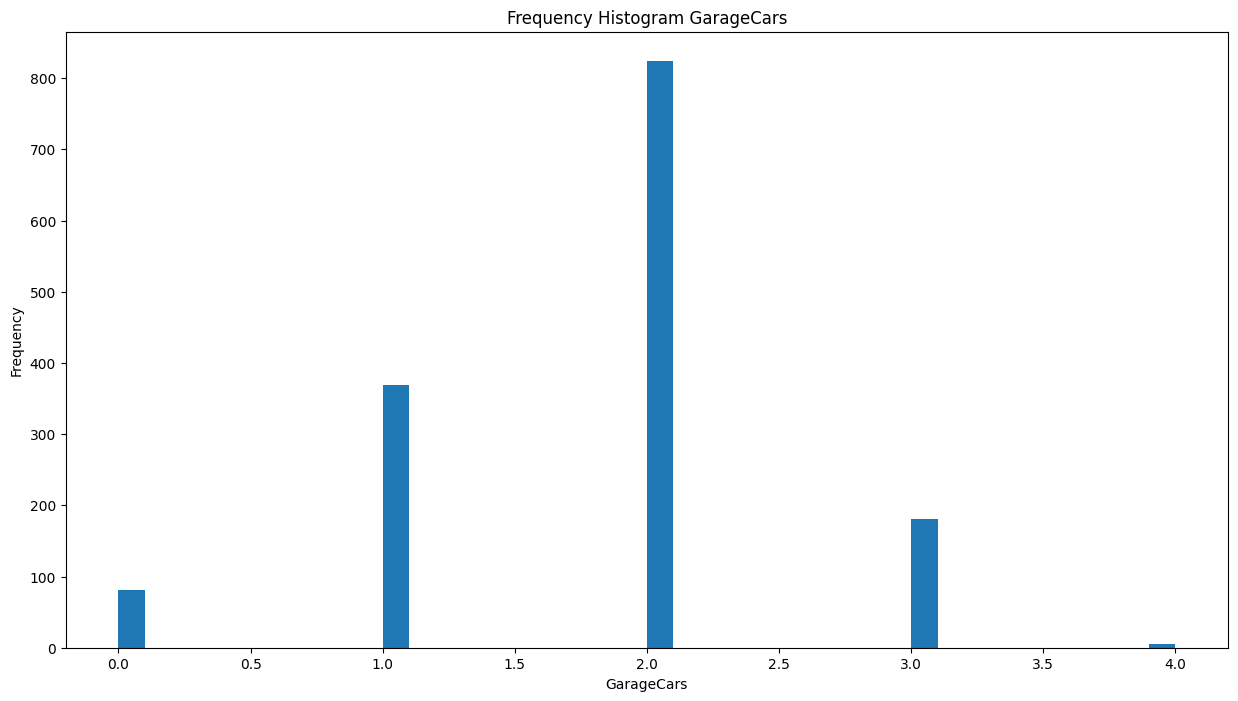

Mean: 1.7671232876712328
Median: 2.0
Mode: 0    2
Name: GarageCars, dtype: int64
Variance: 0.5584797243373676
Std Dev: 0.7473150101111095
Range: 4
IQR 1.0



GarageArea


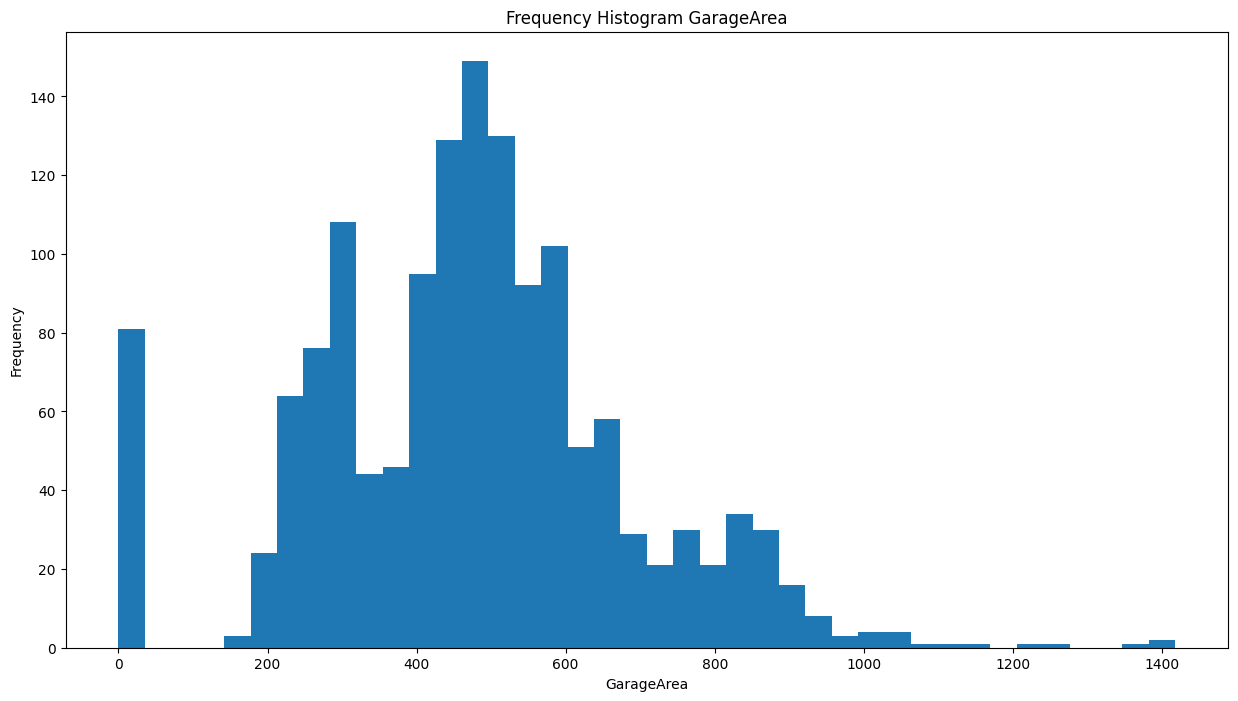

Mean: 472.9801369863014
Median: 480.0
Mode: 0    0
Name: GarageArea, dtype: int64
Variance: 45712.51022890514
Std Dev: 213.80484145338042
Range: 1418
IQR 241.5



GarageQual
Unable to plot GarageQual
Unable to compute descriptive statistics



GarageCond
Unable to plot GarageCond
Unable to compute descriptive statistics



PavedDrive


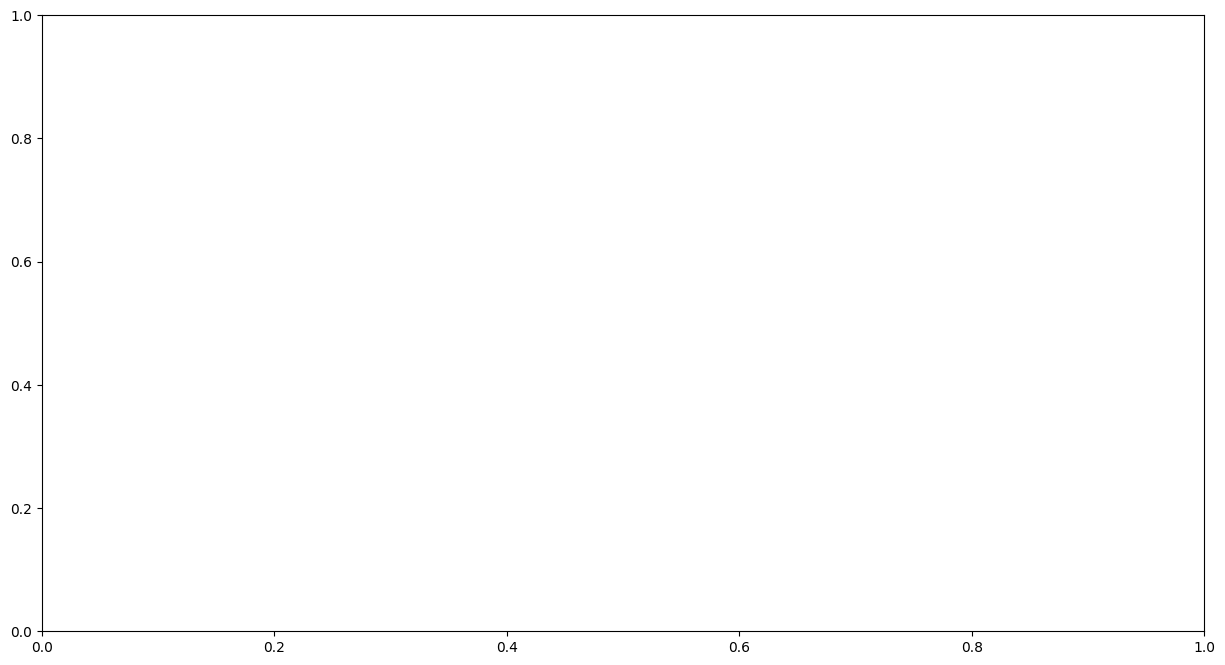

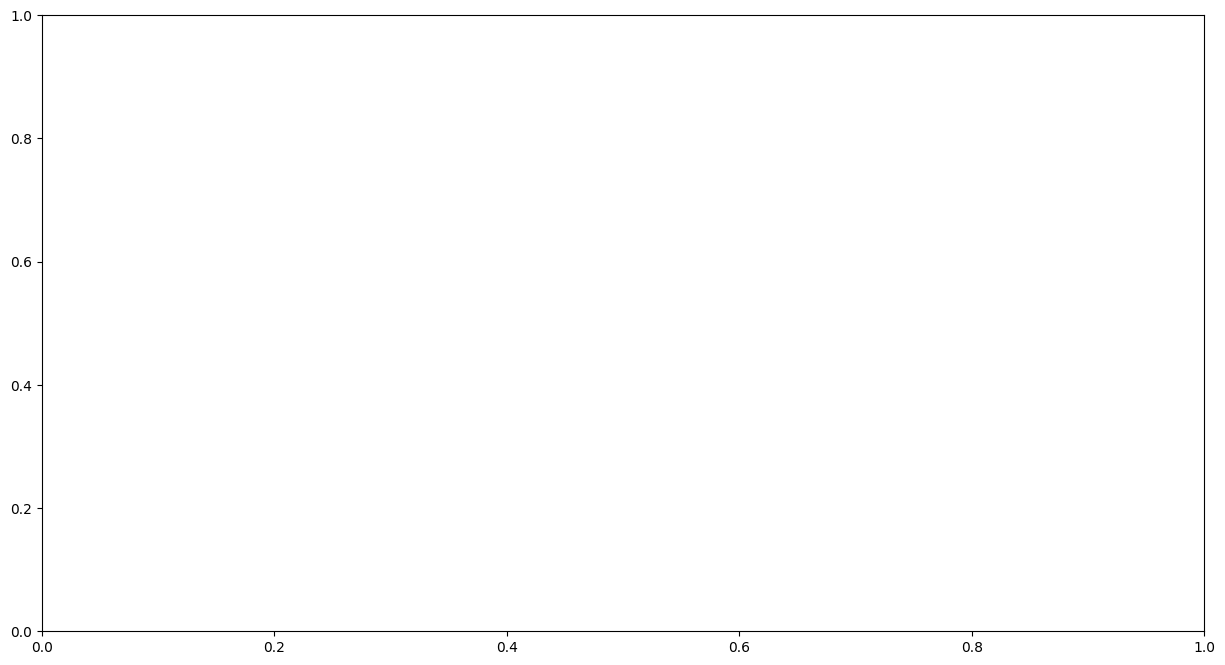

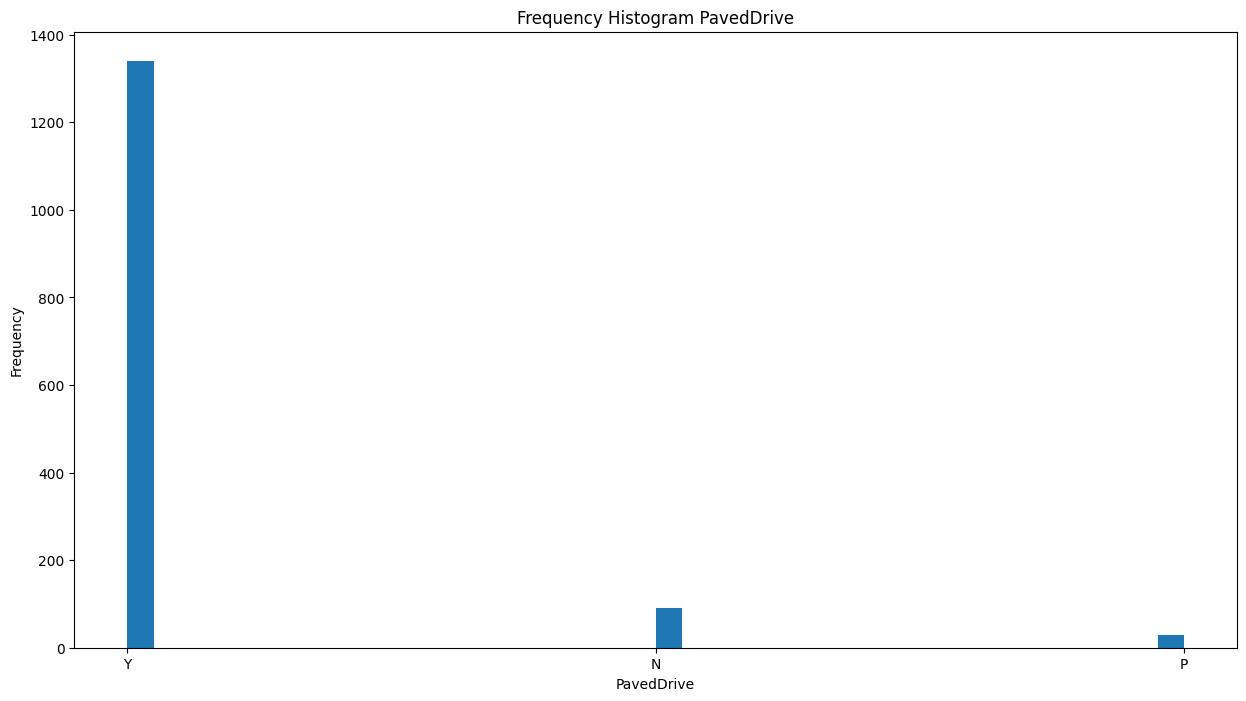

Unable to compute descriptive statistics



WoodDeckSF


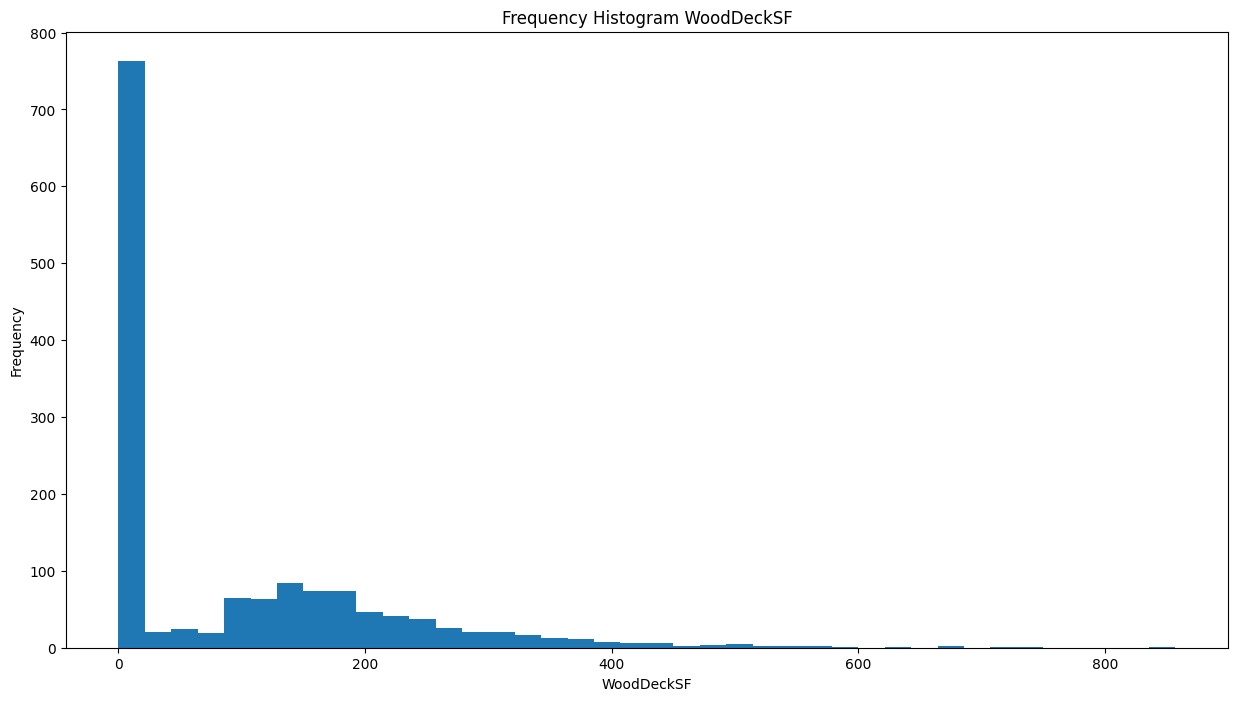

Mean: 94.2445205479452
Median: 0.0
Mode: 0    0
Name: WoodDeckSF, dtype: int64
Variance: 15709.813369543785
Std Dev: 125.3387943517241
Range: 857
IQR 168.0



OpenPorchSF


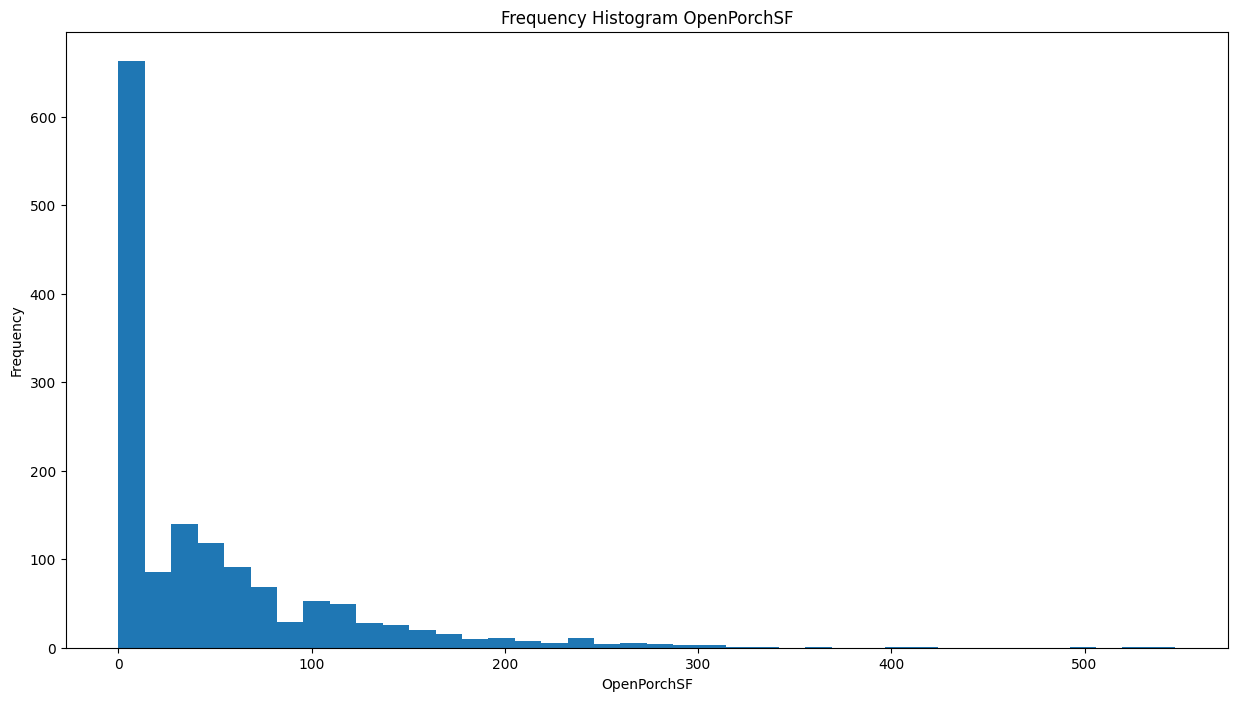

Mean: 46.66027397260274
Median: 25.0
Mode: 0    0
Name: OpenPorchSF, dtype: int64
Variance: 4389.861203488972
Std Dev: 66.25602767664971
Range: 547
IQR 68.0



EnclosedPorch


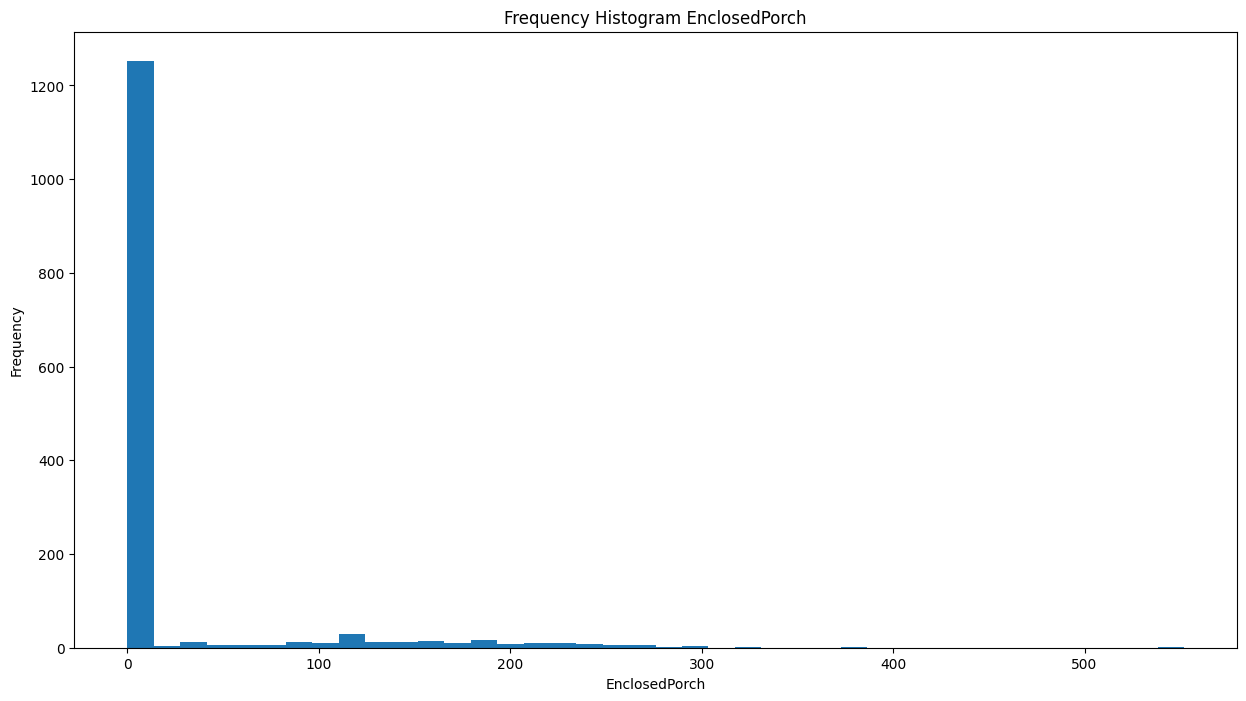

Mean: 21.954109589041096
Median: 0.0
Mode: 0    0
Name: EnclosedPorch, dtype: int64
Variance: 3735.5503258001827
Std Dev: 61.1191486017286
Range: 552
IQR 0.0



3SsnPorch


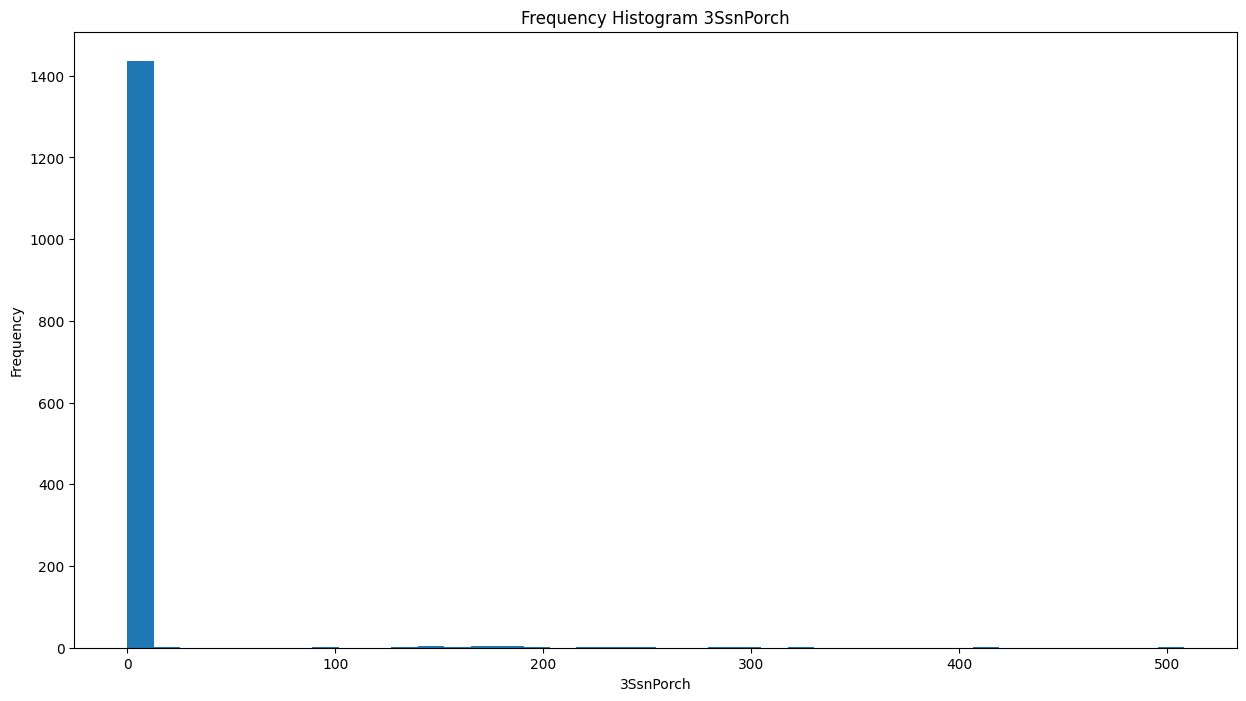

Mean: 3.4095890410958902
Median: 0.0
Mode: 0    0
Name: 3SsnPorch, dtype: int64
Variance: 859.5058709756165
Std Dev: 29.31733055678188
Range: 508
IQR 0.0



ScreenPorch


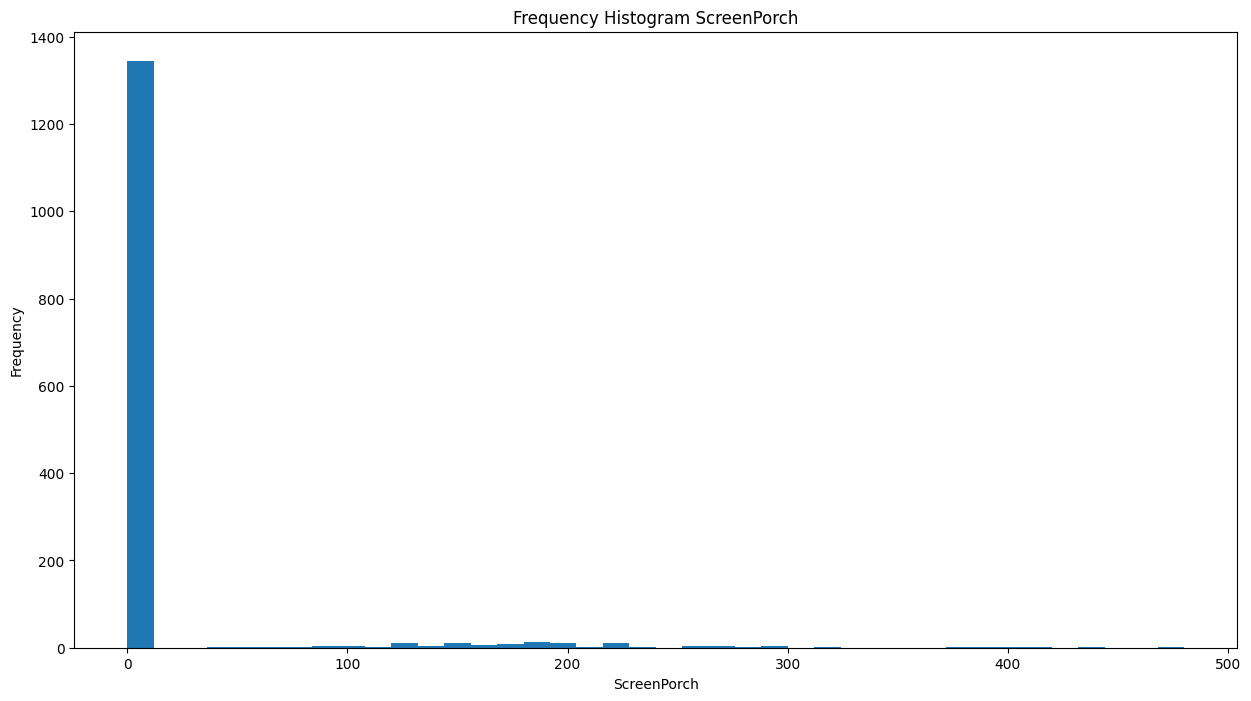

Mean: 15.060958904109588
Median: 0.0
Mode: 0    0
Name: ScreenPorch, dtype: int64
Variance: 3108.889358915376
Std Dev: 55.757415281874174
Range: 480
IQR 0.0



PoolArea


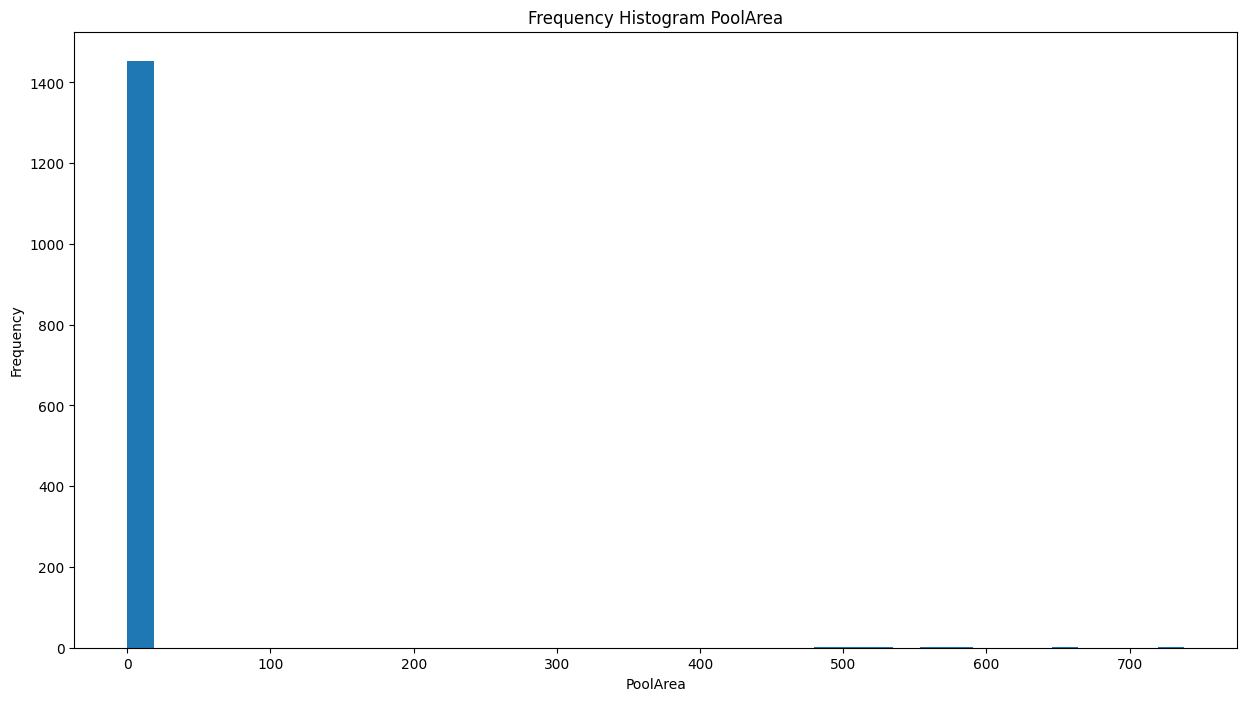

Mean: 2.758904109589041
Median: 0.0
Mode: 0    0
Name: PoolArea, dtype: int64
Variance: 1614.2159933149935
Std Dev: 40.17730694453019
Range: 738
IQR 0.0



PoolQC
Unable to plot PoolQC
Unable to compute descriptive statistics



Fence
Unable to plot Fence
Unable to compute descriptive statistics



MiscFeature
Unable to plot MiscFeature
Unable to compute descriptive statistics



MiscVal


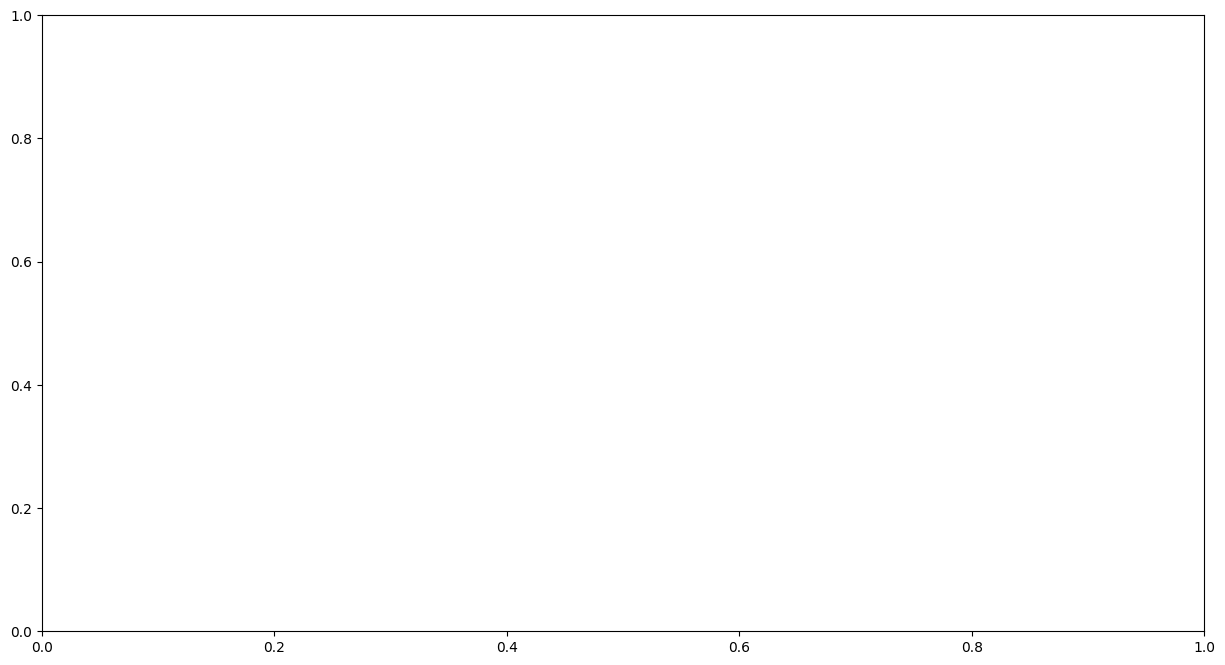

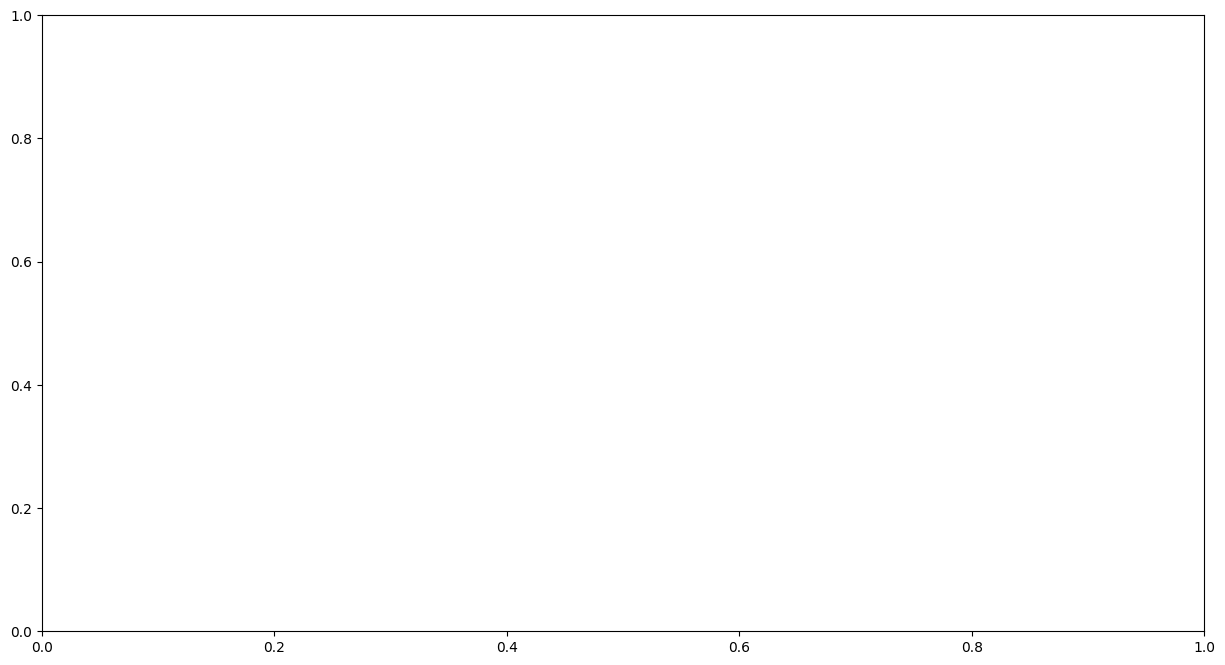

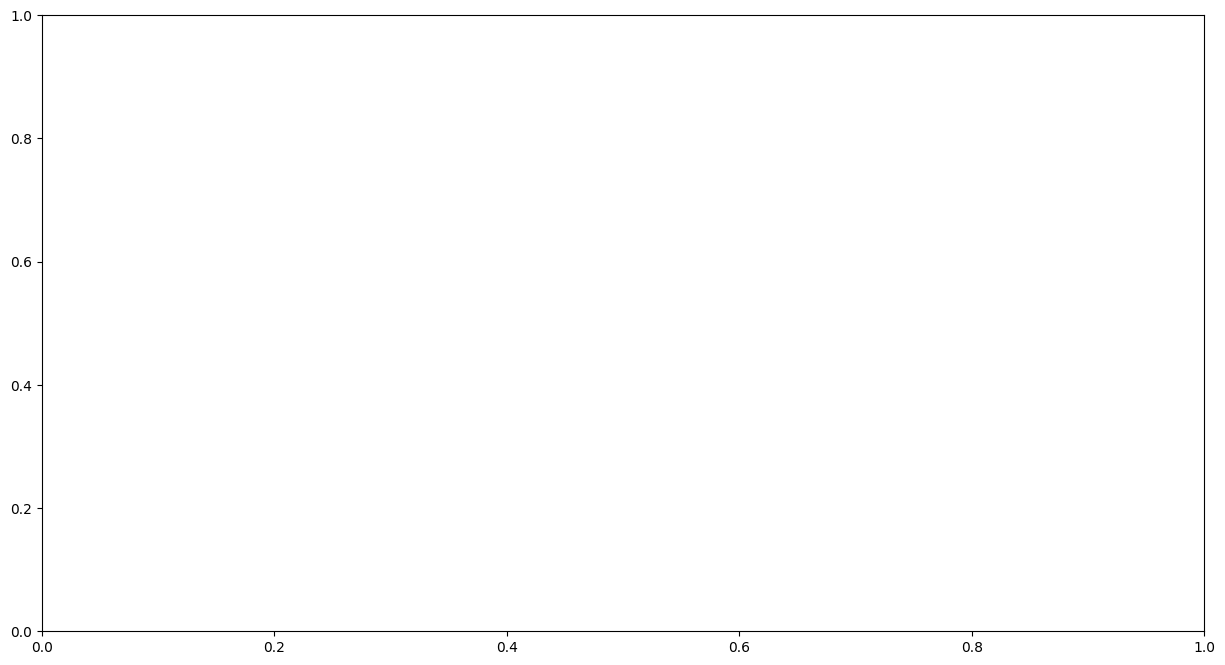

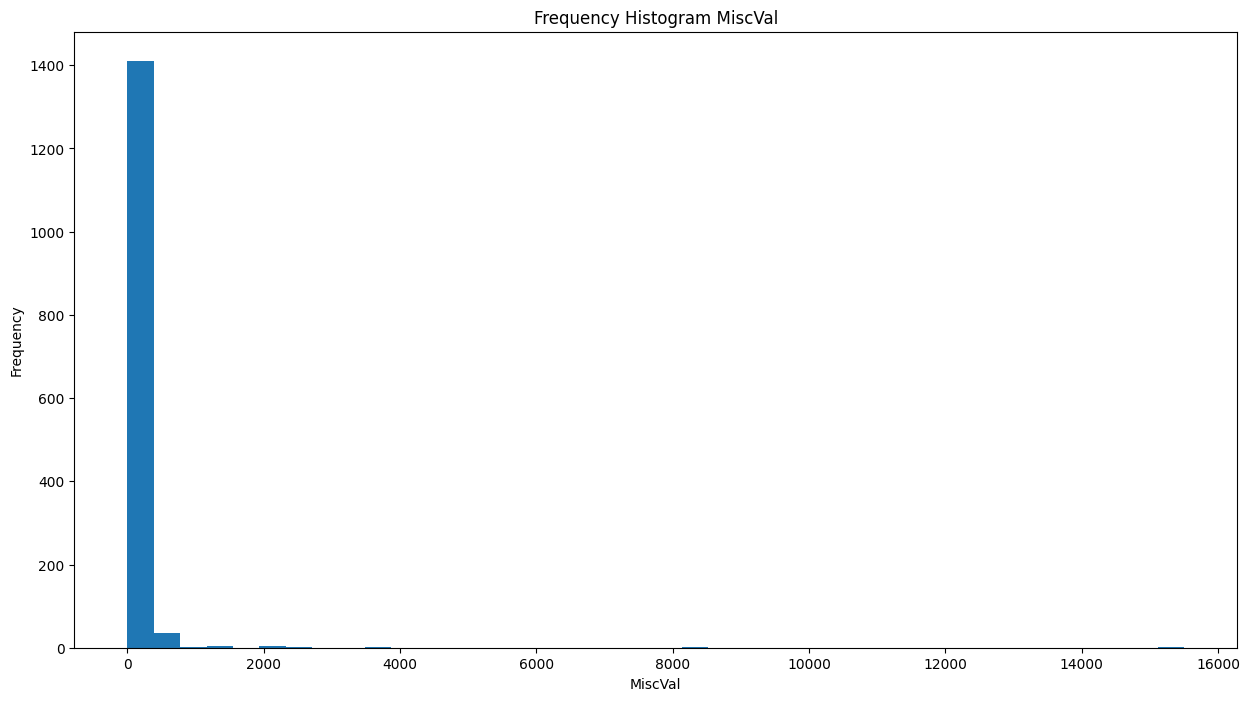

Mean: 43.489041095890414
Median: 0.0
Mode: 0    0
Name: MiscVal, dtype: int64
Variance: 246138.05539729784
Std Dev: 496.12302445794415
Range: 15500
IQR 0.0



MoSold


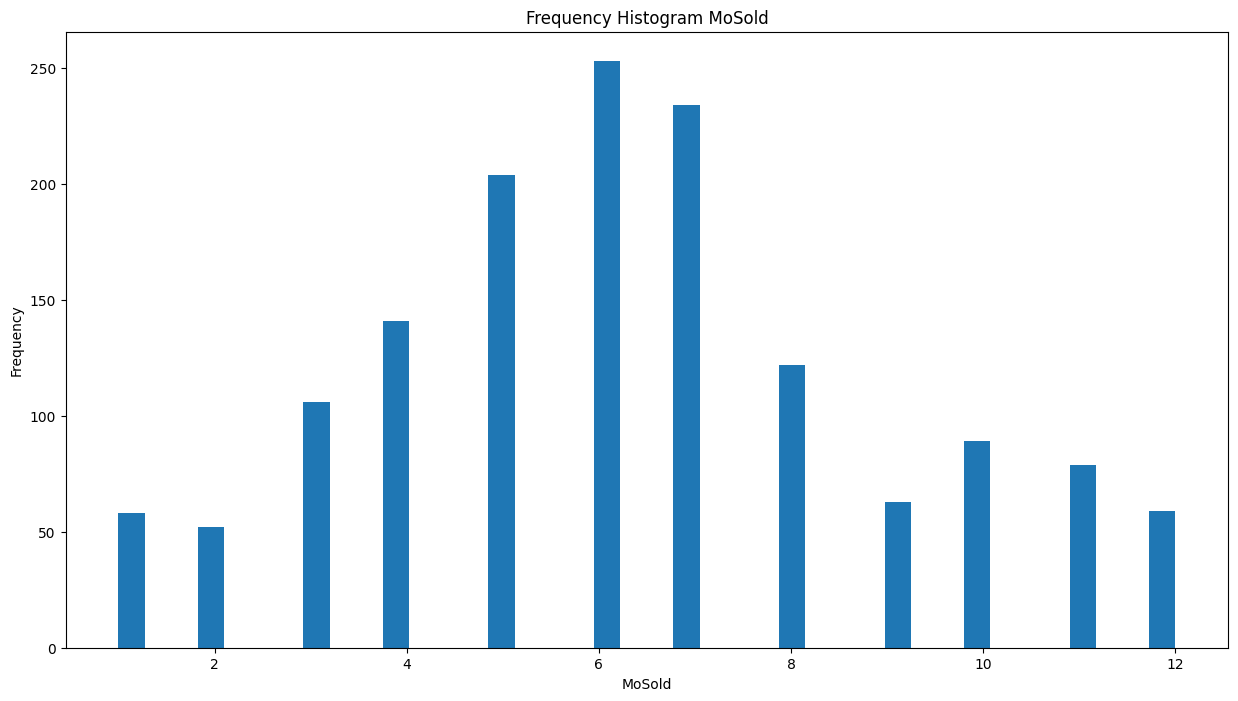

Mean: 6.321917808219178
Median: 6.0
Mode: 0    6
Name: MoSold, dtype: int64
Variance: 7.309594674528434
Std Dev: 2.7036262083595126
Range: 11
IQR 3.0



YrSold


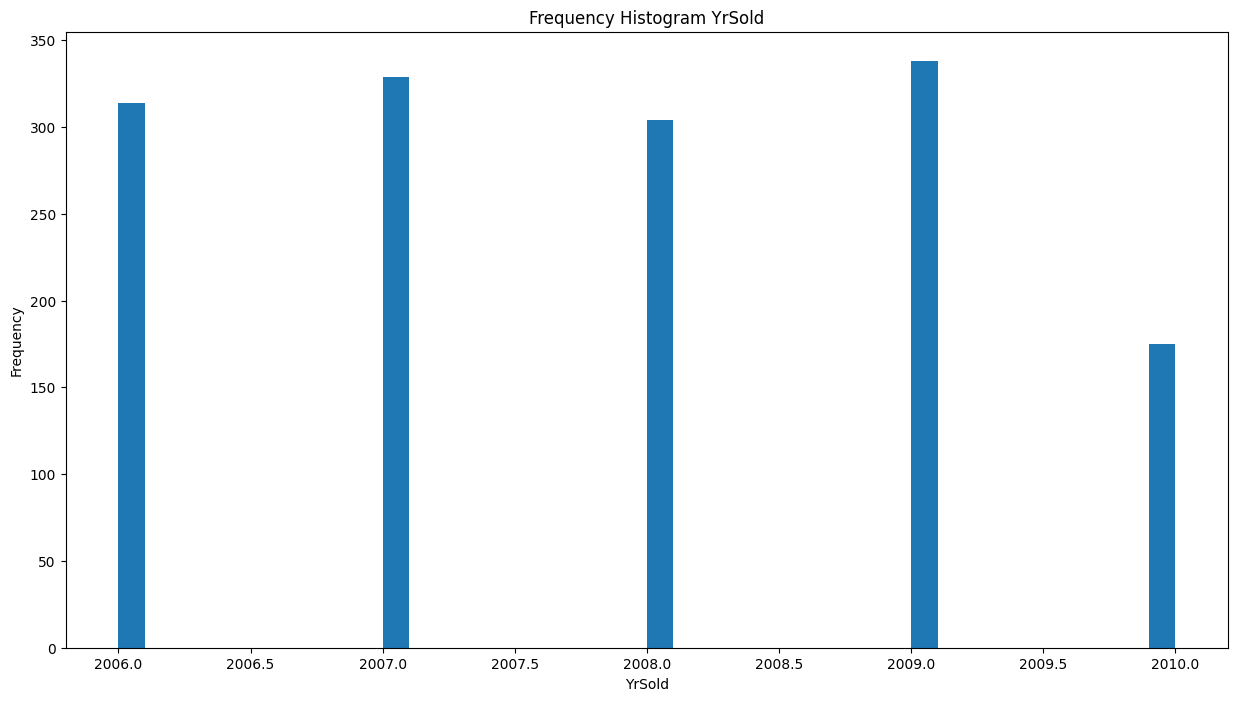

Mean: 2007.8157534246575
Median: 2008.0
Mode: 0    2009
Name: YrSold, dtype: int64
Variance: 1.7638366492343232
Std Dev: 1.3280951205521099
Range: 4
IQR 2.0



SaleType


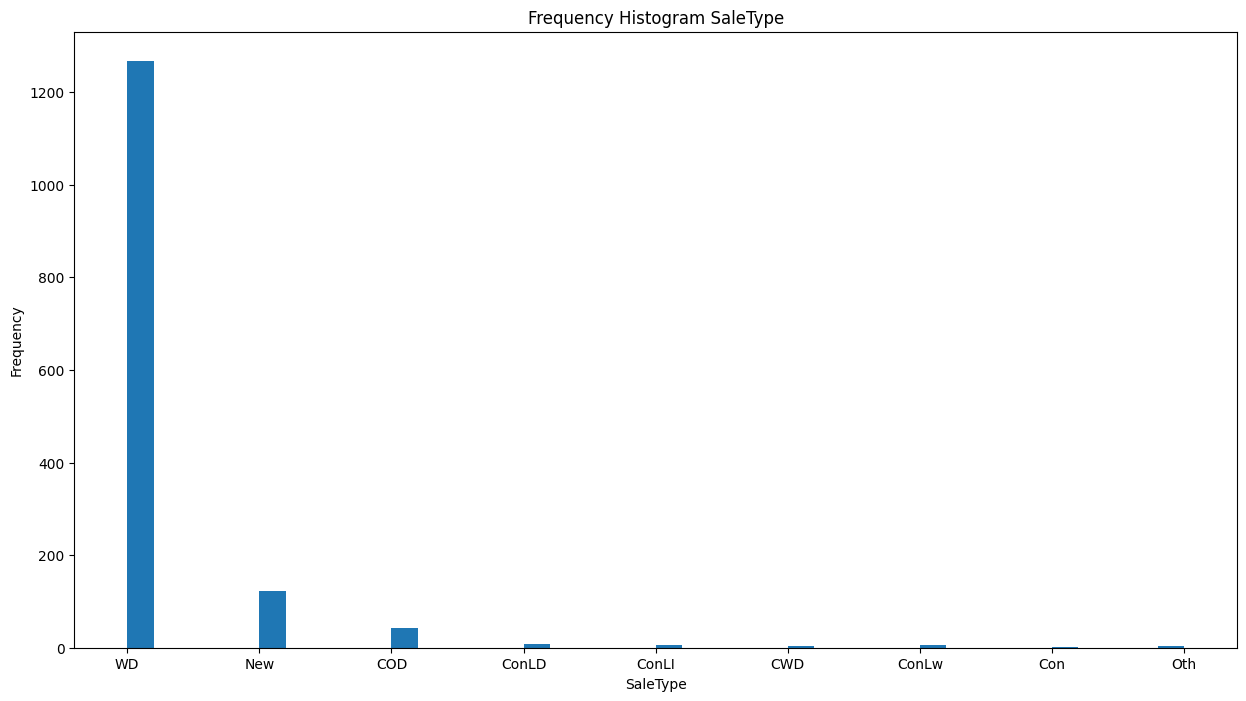

Unable to compute descriptive statistics



SaleCondition


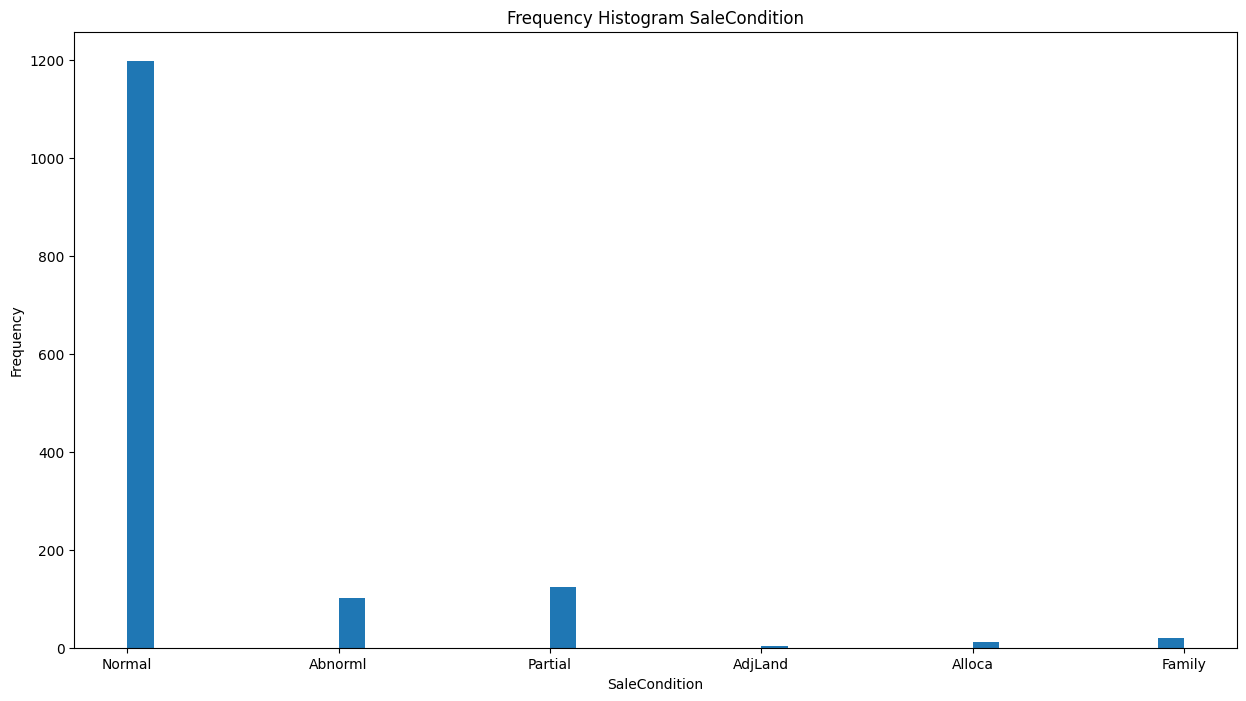

Unable to compute descriptive statistics



SalePrice


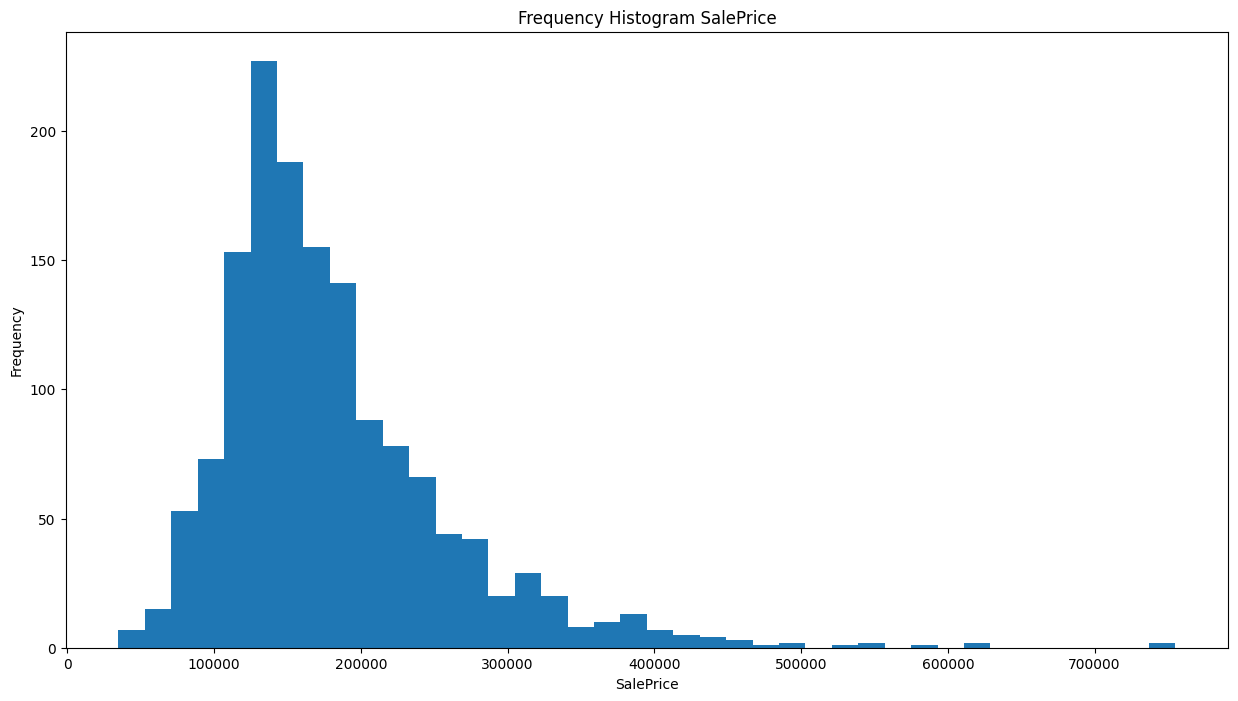

Mean: 180921.19589041095
Median: 163000.0
Mode: 0    140000
Name: SalePrice, dtype: int64
Variance: 6311111264.297448
Std Dev: 79442.50288288662
Range: 720100
IQR 84025.0





In [3]:
for feature_name, feature in train_house_prices_df.items():
    print(feature_name)
    try:
        plt.figure(figsize=(15,8))
        plt.hist(feature, bins=40)
        plt.xlabel(feature_name)
        plt.ylabel("Frequency")
        plt.title(f"Frequency Histogram {feature_name}")
        plt.show()
    except:
        print(f"Unable to plot {feature_name}")
    try:
        print(f"Mean: {feature.mean()}")
        print(f"Median: {feature.median()}")
        print(f"Mode: {feature.mode()}")
        print(f"Variance: {feature.var()}")
        print(f"Std Dev: {feature.std()}")
        print(f"Range: {feature.max() - feature.min()}")
        print(f"IQR {feature.quantile(0.75) - feature.quantile(0.25)}")
    except:
        print(f"Unable to compute descriptive statistics")
    print("\n\n")

## Feature Transformation

In [446]:
df_minus_target = train_house_prices_df.drop(['SalePrice'], axis=1)
numerical_features = df_minus_target._get_numeric_data().columns

#overallcond and overallqual already numerical
ordinal_features = ["KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "HeatingQC", "BsmtCond", "BsmtQual", "ExterCond", "ExterQual"]

kq_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
func_cat = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']
fire_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
gqual_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
gcond_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
pool_cat = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
heat_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
bcond_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
bqual_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
econd_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
equal_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']

kq_cat.reverse()
func_cat.reverse()
fire_cat.reverse()
gqual_cat.reverse()
gcond_cat.reverse()
pool_cat.reverse()
heat_cat.reverse()
bcond_cat.reverse()
bqual_cat.reverse()
econd_cat.reverse()
equal_cat.reverse()

def create_ordinal_transformer(categories, column_name, scale=True):
    if not scale:
        return (make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=np.nan)), [column_name])
    return (make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=np.nan), StandardScaler()), [column_name])

categorical_features = list(set(df_minus_target.columns) - set(numerical_features) - set(ordinal_features))

numerical_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse_output=False))

preprocessor = make_column_transformer(
    (numerical_transformer, numerical_features),
    (categorical_transformer, categorical_features),
    create_ordinal_transformer(kq_cat, 'KitchenQual'),
    create_ordinal_transformer(func_cat, 'Functional'),
    create_ordinal_transformer(fire_cat, 'FireplaceQu'),
    create_ordinal_transformer(gqual_cat, 'GarageQual'),
    create_ordinal_transformer(gcond_cat, 'GarageCond'),
    create_ordinal_transformer(pool_cat, 'PoolQC'),
    create_ordinal_transformer(heat_cat, 'HeatingQC'),
    create_ordinal_transformer(bcond_cat, 'BsmtCond'),
    create_ordinal_transformer(bqual_cat, 'BsmtQual'),
    create_ordinal_transformer(econd_cat, 'ExterCond'),
    create_ordinal_transformer(equal_cat, 'ExterQual')
)

train_x = train_house_prices_df.drop(columns=["SalePrice"])
train_y = train_house_prices_df["SalePrice"]

processed_df = preprocessor.fit_transform(train_x, train_y)
processed_df

,pipeline-1__MSSubClass,pipeline-1__LotFrontage,pipeline-1__LotArea,pipeline-1__OverallQual,pipeline-1__OverallCond,pipeline-1__YearBuilt,pipeline-1__YearRemodAdd,pipeline-1__MasVnrArea,pipeline-1__BsmtFinSF1,pipeline-1__BsmtFinSF2,...,pipeline-4__Functional,pipeline-5__FireplaceQu,pipeline-6__GarageQual,pipeline-7__GarageCond,pipeline-8__PoolQC,pipeline-9__HeatingQC,pipeline-10__BsmtCond,pipeline-11__BsmtQual,pipeline-12__ExterCond,pipeline-13__ExterQual
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.237044,0.471313,0.096397,0.105926,0.016554,0.891179,-0.038577,0.641645,-0.238112,1.052302
2,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0.237044,-1.186799,0.096397,0.105926,0.016554,0.891179,-0.038577,0.641645,-0.238112,-0.689604
3,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.237044,-1.186799,0.096397,0.105926,0.016554,0.891179,-0.038577,0.641645,-0.238112,1.052302
4,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.237044,0.471313,0.096397,0.105926,0.016554,-0.151386,3.481550,-0.833633,-0.238112,-0.689604
5,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.237044,-1.186799,0.096397,0.105926,0.016554,0.891179,-0.038577,0.641645,-0.238112,1.052302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,0.237044,-1.186799,0.096397,0.105926,0.016554,0.891179,-0.038577,0.641645,-0.238112,-0.689604
1457,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,-1.261154,-1.186799,0.096397,0.105926,0.016554,-1.193952,-0.038577,0.641645,-0.238112,-0.689604
1458,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,0.237044,0.471313,0.096397,0.105926,0.016554,0.891179,3.481550,-0.833633,2.611429,2.794208


#### Calculate Entropy for Categorical Features

In [62]:
def calculate_entropy(column):
    counts = column.value_counts(normalize=True)
    entropy_value = -np.sum(counts * np.log2(counts + 1e-12))
    return entropy_value

In [63]:
#Calculate entropy values for each feature
categorical_train_df = df_minus_target.drop(columns=numerical_features)
entropy_values = categorical_train_df.apply(calculate_entropy)
print("Entropy of Each Feature:")
print(entropy_values)

Entropy of Each Feature:
MSZoning         1.000603
Street           0.038493
Alley            0.992933
LotShape         1.139205
LandContour      0.633542
Utilities        0.008188
LotConfig        1.223824
LandSlope        0.335497
Neighborhood     4.194297
Condition1       0.897236
Condition2       0.108011
BldgType         0.942894
HouseStyle       1.858751
RoofStyle        0.902421
RoofMatl         0.168018
Exterior1st      2.725957
Exterior2nd      2.814219
MasVnrType       1.345571
ExterQual        1.191276
ExterCond        0.631838
Foundation       1.523433
BsmtQual         1.472979
BsmtCond         0.483226
BsmtExposure     1.417351
BsmtFinType1     2.338283
BsmtFinType2     0.772320
Heating          0.189947
HeatingQC        1.616087
CentralAir       0.347245
Electrical       0.505112
KitchenQual      1.431602
Functional       0.507067
FireplaceQu      1.518242
GarageType       1.353741
GarageFinish     1.547099
GarageQual       0.343693
GarageCond       0.288635
PavedDrive   

In [64]:
cov_matrix = train_house_prices_df.cov(numeric_only=True)
corr_matrix = train_house_prices_df.corr(numeric_only=True)

### Covariance Matrix

In [65]:
cov_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1789.338306,-404.439075,-5.901742e+04,1.908771,-2.792117,3.558134e+01,35.439934,1.758378e+02,-1.347356e+03,-447.979166,...,-6.669453e+01,-1.709661e+01,-31.119180,-54.348569,-61.394007,14.076652,-161.243759,-1.553607,-1.202630,-2.832337e+05
LotFrontage,-404.439075,589.749169,8.199814e+04,8.673047,-1.573935,9.510848e+01,45.744675,8.712074e+02,2.635953e+03,187.215374,...,2.587889e+02,2.438681e+02,16.022614,48.936214,56.264418,194.586364,15.520479,0.735389,0.240700,7.124262e+05
LotArea,-59017.418634,81998.138404,9.962565e+07,1460.548271,-62.602871,4.289113e+03,2841.343594,1.884014e+05,9.746908e+05,179002.233638,...,2.148006e+05,5.606253e+04,-11188.088772,5976.210971,24020.024881,31148.209380,188508.749657,32.517342,-189.050203,2.092111e+08
OverallQual,1.908771,8.673047,1.460548e+03,1.912679,-0.141484,2.390622e+01,15.723417,1.030121e+02,1.511770e+02,-13.189617,...,4.141573e+01,2.829764e+01,-9.630806,1.231398,5.003537,3.620945,-21.548945,0.264785,-0.050229,8.690413e+04
OverallCond,-2.792117,-1.573935,-6.260287e+01,-0.141484,1.238322,-1.263671e+01,1.694152,-2.581896e+01,-2.346427e+01,7.221779,...,-4.649741e-01,-2.402762e+00,4.785160,0.832039,3.400819,-0.088745,37.970669,-0.010563,0.064953,-6.882739e+03
YearBuilt,35.581337,95.108483,4.289113e+03,23.906215,-12.636709,9.122154e+02,369.675456,1.725993e+03,3.437028e+03,-239.263730,...,8.513053e+02,3.775838e+02,-714.886948,27.763434,-84.815514,6.006353,-515.209195,1.012426,-0.546237,1.254637e+06
YearRemodAdd,35.439934,45.744675,2.841344e+03,15.723417,1.694152,3.696755e+02,426.232822,6.716764e+02,1.209533e+03,-225.669866,...,5.323509e+02,3.095486e+02,-244.692937,27.410061,-44.594964,4.835329,-105.358566,1.199517,0.980046,8.317079e+05
MasVnrArea,175.837842,871.207424,1.884014e+05,103.012054,-25.818956,1.725993e+03,671.676358,3.278497e+04,2.182760e+04,-2117.724160,...,3.626330e+03,1.503301e+03,-1218.999064,100.044636,622.125969,85.516034,-2685.666442,-2.915638,-1.973363,6.854858e+06
BsmtFinSF1,-1347.355751,2635.952669,9.746908e+05,151.176998,-23.464270,3.437028e+03,1209.532821,2.182760e+04,2.080255e+05,-3687.508609,...,1.167953e+04,3.377322e+03,-2851.840396,353.685020,1577.237193,2574.473738,808.155748,-19.393195,8.697797,1.400137e+07
BsmtFinSF2,-447.979166,187.215374,1.790022e+05,-13.189617,7.221779,-2.392637e+02,-225.669866,-2.117724e+03,-3.687509e+03,26023.907779,...,1.372874e+03,3.305446e+01,360.306240,-141.852290,799.374305,270.331980,395.351466,-6.634118,6.792848,-1.458175e+05


### Correlation Matrix

In [66]:
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [67]:
abs_corr_df = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).to_frame()
abs_corr_df
abs_corr_df.columns = ["Coefficient"]
abs_corr_df = abs_corr_df[abs_corr_df.Coefficient != 1.00]
abs_corr_df.head(50)

,,Coefficient
GarageCars,GarageArea,0.882475
GarageArea,GarageCars,0.882475
YearBuilt,GarageYrBlt,0.825667
GarageYrBlt,YearBuilt,0.825667
TotRmsAbvGrd,GrLivArea,0.825489
GrLivArea,TotRmsAbvGrd,0.825489
TotalBsmtSF,1stFlrSF,0.819530
1stFlrSF,TotalBsmtSF,0.819530
OverallQual,SalePrice,0.790982
SalePrice,OverallQual,0.790982


#### Correlation Matrix for Preprocessed Data

In [68]:
corr_matrix = processed_df.corr(numeric_only=True)
corr_matrix

,pipeline-1__MSSubClass,pipeline-1__LotFrontage,pipeline-1__LotArea,pipeline-1__OverallQual,pipeline-1__OverallCond,pipeline-1__YearBuilt,pipeline-1__YearRemodAdd,pipeline-1__MasVnrArea,pipeline-1__BsmtFinSF1,pipeline-1__BsmtFinSF2,...,pipeline-4__Functional,pipeline-5__FireplaceQu,pipeline-6__GarageQual,pipeline-7__GarageCond,pipeline-8__PoolQC,pipeline-9__HeatingQC,pipeline-10__BsmtCond,pipeline-11__BsmtQual,pipeline-12__ExterCond,pipeline-13__ExterQual
pipeline-1__MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.006716,-0.004771,0.024439,-0.025864,0.017381,-0.019458,-0.005152,0.076820,-0.064686,0.016178
pipeline-1__LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.023185,-0.031077,0.048073,0.033953,0.059288,0.090051,0.045131,0.164071,-0.016430,0.165567
pipeline-1__LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,-0.025128,-0.049090,0.026851,0.016833,0.006978,0.003581,0.028160,0.079775,0.014732,0.055570
pipeline-1__OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.145436,0.022357,0.129969,0.114023,0.025137,0.457083,0.173367,0.667345,0.013953,0.726278
pipeline-1__OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.118909,0.013034,0.029467,0.023045,-0.013760,-0.014105,0.118761,-0.271285,0.389163,-0.138942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pipeline-9__HeatingQC,-0.019458,0.090051,0.003581,0.457083,-0.014105,0.448855,0.550017,0.157130,0.085672,-0.074535,...,0.058352,0.063062,0.073711,0.104997,0.062913,1.000000,0.119844,0.423714,0.055520,0.520027
pipeline-10__BsmtCond,-0.005152,0.045131,0.028160,0.173367,0.118761,0.225490,0.137869,0.042866,0.061747,0.081889,...,0.146409,-0.013801,0.093541,0.128378,0.000639,0.119844,1.000000,0.209715,0.155703,0.162389
pipeline-11__BsmtQual,0.076820,0.164071,0.079775,0.667345,-0.271285,0.724570,0.570378,0.317035,0.284602,-0.072435,...,0.118886,0.024300,0.130552,0.149076,0.013800,0.423714,0.209715,1.000000,-0.077565,0.648417
pipeline-12__ExterCond,-0.064686,-0.016430,0.014732,0.013953,0.389163,-0.103925,0.074745,-0.018065,0.040919,0.060429,...,0.100304,-0.030168,0.071427,0.100683,0.027528,0.055520,0.155703,-0.077565,1.000000,0.009184


In [69]:
abs_corr_df = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).to_frame()
abs_corr_df
abs_corr_df.columns = ["Coefficient"]
abs_corr_df = abs_corr_df[abs_corr_df.Coefficient != 1.00]
abs_corr_df.head(50)

,,Coefficient
pipeline-2__SaleType_New,pipeline-2__SaleCondition_Partial,0.986819
pipeline-2__SaleCondition_Partial,pipeline-2__SaleType_New,0.986819
pipeline-2__Exterior2nd_VinylSd,pipeline-2__Exterior1st_VinylSd,0.977525
pipeline-2__Exterior1st_VinylSd,pipeline-2__Exterior2nd_VinylSd,0.977525
pipeline-2__Exterior1st_CemntBd,pipeline-2__Exterior2nd_CmentBd,0.974171
pipeline-2__Exterior2nd_CmentBd,pipeline-2__Exterior1st_CemntBd,0.974171
pipeline-2__Exterior1st_MetalSd,pipeline-2__Exterior2nd_MetalSd,0.973065
pipeline-2__Exterior2nd_MetalSd,pipeline-2__Exterior1st_MetalSd,0.973065
pipeline-2__RoofStyle_Gable,pipeline-2__RoofStyle_Hip,0.933462
pipeline-2__RoofStyle_Hip,pipeline-2__RoofStyle_Gable,0.933462


In [13]:
features = ["GarageCars", "GarageArea", "GarageYrBlt", "YearBuilt", "TotalBsmtSF", "1stFlrSF"]
for feature_name in features:
    print(f"Variance of {feature_name}: {train_house_prices_df[feature_name].var()}")

Variance of GarageCars: 0.5584797243373676
Variance of GarageArea: 45712.51022890514
Variance of GarageYrBlt: 609.5825091487385
Variance of YearBuilt: 912.2154126019886
Variance of TotalBsmtSF: 192462.36170908954
Variance of 1stFlrSF: 149450.07920371433


Would remove Garage Cars and GarageYrBlt from features if I wasn't using PCA.

### Mutual Information for Features

In [14]:
def compute_mutual_info(df, feature1, feature2):
    c = crosstab(df[feature1], df[feature2])
    mi = mutual_info_score(labels_true=None, labels_pred=None, contingency=c[1])
    return mi

In [15]:
x = train_house_prices_df.drop(columns=["SalePrice"])
y = train_house_prices_df["SalePrice"]

processed_data = preprocessor.fit_transform(x, y)

x_processed = pd.DataFrame(processed_data)

feature_names = x_processed.columns

mi_scores = mutual_info_regression(x_processed, y, random_state=42)

mi_scores_series = pd.Series(mi_scores, index=feature_names)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("Mutual Info Scores for Regression:")
top_scores = mi_scores_series.head(100)
top_features = top_scores.index.to_list()
print(top_features)
top_scores

Mutual Info Scores for Regression:
[3, 15, 11, 26, 25, 5, 243, 233, 241, 12, 24, 0, 18, 6, 112, 1, 22, 13, 23, 169, 239, 2, 28, 8, 110, 4, 10, 48, 62, 168, 27, 68, 7, 235, 221, 227, 19, 140, 111, 186, 20, 224, 201, 122, 205, 42, 44, 121, 197, 123, 210, 69, 117, 67, 204, 152, 164, 150, 119, 167, 223, 159, 229, 113, 127, 141, 41, 194, 16, 60, 199, 198, 125, 133, 65, 240, 46, 29, 88, 187, 203, 97, 21, 195, 170, 232, 134, 181, 208, 31, 242, 209, 143, 237, 50, 118, 178, 154, 179, 196]


3      0.566623
15     0.479765
11     0.367798
26     0.364130
25     0.360874
         ...   
118    0.017540
178    0.017221
154    0.017166
179    0.017078
196    0.017018
Length: 100, dtype: float64

#### PCA

In [16]:
x_processed = x_processed[top_features]

pca = PCA(n_components=46)
principal_components = pca.fit_transform(x_processed)
print(f"Explained Variance Ratio Cumulative Sum: {pca.explained_variance_ratio_.cumsum()}")

Explained Variance Ratio Cumulative Sum: [0.22587363 0.30729123 0.37762333 0.42955017 0.47080007 0.50568582
 0.53554325 0.56286087 0.58839841 0.61277363 0.63543704 0.65721981
 0.67745804 0.69722118 0.71681669 0.73429354 0.74957609 0.76388885
 0.77802591 0.79154709 0.80446033 0.81538844 0.82510282 0.83461716
 0.84387992 0.8524538  0.86037602 0.86762744 0.87423236 0.8805055
 0.88671859 0.89270095 0.89820249 0.90356488 0.90873111 0.91370025
 0.91826337 0.92270276 0.92702453 0.93114754 0.9351003  0.9387954
 0.9424009  0.9459193  0.94918199 0.9523301 ]


#### Create Pipleine(s)

In [50]:
train_df, test_df = train_test_split(train_house_prices_df, test_size=0.2, random_state=123)

train_x = train_house_prices_df.drop(columns=["SalePrice"])
train_y = train_house_prices_df["SalePrice"]

X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

In [18]:
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=50)),
    ('regression', Ridge(alpha=100))
])

In [19]:
cv_scores = cross_validate(pipeline_test, X_train, y_train, return_train_score=True)
cv_results = pd.DataFrame(cv_scores)
print("Mean:")
print(cv_results.mean())
cv_results

Mean:
fit_time       0.092377
score_time     0.014631
test_score     0.556336
train_score    0.840875
dtype: float64


,fit_time,score_time,test_score,train_score
0,0.098221,0.010150,-0.180404,0.860922
1,0.084879,0.015652,0.859683,0.821833
2,0.089742,0.016053,0.779952,0.832003
3,0.094702,0.015650,0.867171,0.818511
4,0.094339,0.015649,0.455280,0.871107


In [20]:
pipeline_ridge = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', PCA()),
    ('ridge', Ridge())
])

In [21]:
ridge_param_grid1 = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200],
    'pca__n_components': [5, 15, 30, 40, 50, 60]
}

ridge_grid_search1 = GridSearchCV(pipeline_ridge, ridge_param_grid1, cv=5, return_train_score=True)
ridge_grid_search1.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search1.best_params_}')
print(f'Best Score: {ridge_grid_search1.best_score_}')

Best parameters: {'pca__n_components': 5, 'ridge__alpha': 200}
Best Score: 0.7418641659806873


In [27]:
ridge_param_grid2 = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200],
    'pca__n_components': [5, 10, 15, 30, 45, 50, 60]
}

ridge_grid_search2 = GridSearchCV(pipeline_ridge, ridge_param_grid2, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search2.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search2.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search2.best_score_}')

Best parameters: {'pca__n_components': 10, 'ridge__alpha': 175}
Best Root Mean Squared Error Score: -38329.95133385544


#### Ridge Without PCA

In [26]:
pipeline_ridge_no_pca = Pipeline([
    ('preprocessing', preprocessor),
    ('ridge', Ridge())
])

ridge_param_grid3 = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200],
}

ridge_grid_search3 = GridSearchCV(pipeline_ridge, ridge_param_grid3, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search3.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search3.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search3.best_score_}')

Best parameters: {'ridge__alpha': 200}
Best Root Mean Squared Error Score: -45223.050145569534


__Observation__: PCA prior to training reduced error.

### Gradient Boosting Regressor

### GBR With PCA, Evaluated With MSE

In [23]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [5, 10, 15, 30, 45, 50],
    'regression__n_estimators': [30, 50, 100, 200, 250],
    'regression__loss': ["squared_error"],
    'regression__min_samples_split': [2,4,6,10],
    'regression__max_depth': [3, 4, 10]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'pca__n_components': 30, 'regression__loss': 'squared_error', 'regression__max_depth': 3, 'regression__min_samples_split': 10, 'regression__n_estimators': 250}
Best Mean Squared Error Score: -884164326.5826561


#### Gradient Boosting Evaluated with RMSE

__Search 1__

In [31]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [6, 200],
    'regression__n_estimators': [50, 350],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [2, 12],
    'regression__max_depth': [3, 10]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'pca__n_components': 6, 'regression__learning_rate': 0.03, 'regression__max_depth': 3, 'regression__min_samples_split': 12, 'regression__n_estimators': 350}
Best Root Mean Squared Error Score: -31011.731202896175


__Search 2__

In [32]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [6, 103],
    'regression__n_estimators': [250, 400],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [7, 14],
    'regression__max_depth': [3, 6]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=4, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'pca__n_components': 103, 'regression__learning_rate': 0.03, 'regression__max_depth': 3, 'regression__min_samples_split': 14, 'regression__n_estimators': 400}
Best Root Mean Squared Error Score: -29282.817943394617


__Search 3__

In [33]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [20, 120],
    'regression__n_estimators': [350, 450],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [13, 30],
    'regression__max_depth': [3]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=4, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'pca__n_components': 120, 'regression__learning_rate': 0.03, 'regression__max_depth': 3, 'regression__min_samples_split': 30, 'regression__n_estimators': 450}
Best Root Mean Squared Error Score: -28087.678331598767


__Search 4__

In [34]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [40, 130],
    'regression__n_estimators': [400, 550],
    'regression__learning_rate': [0.02, 0.04],
    'regression__min_samples_split': [18, 40],
    'regression__max_depth': [3]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=4, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'pca__n_components': 130, 'regression__learning_rate': 0.02, 'regression__max_depth': 3, 'regression__min_samples_split': 40, 'regression__n_estimators': 550}
Best Root Mean Squared Error Score: -27932.36229374513


__Search 5__

In [35]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [50, 150],
    'regression__n_estimators': [450, 600],
    'regression__learning_rate': [0.02, 0.03],
    'regression__min_samples_split': [20, 50],
    'regression__max_depth': [3]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=4, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'pca__n_components': 150, 'regression__learning_rate': 0.03, 'regression__max_depth': 3, 'regression__min_samples_split': 20, 'regression__n_estimators': 600}
Best Root Mean Squared Error Score: -28523.560111614803


__Search 6__

In [38]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [30, 50, 100, 120, 150],
    'regression__n_estimators': [250, 350, 450, 550],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [10, 20, 30, 40],
    'regression__max_depth': [3]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=4, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'pca__n_components': 120, 'regression__learning_rate': 0.03, 'regression__max_depth': 3, 'regression__min_samples_split': 40, 'regression__n_estimators': 450}
Best Root Mean Squared Error Score: -27744.375117989854


__Train Model With Best Parameters__

In [48]:
def display_regression_metrics(y_test, y_pred):
    metrics = dict()
    metrics['rmse'] = root_mean_squared_error(y_test, y_pred)
    metrics['r2'] = r2_score(y_test, y_pred)
    metrics['mae'] = mean_absolute_error(y_test, y_pred)
    metrics_series = pd.Series(metrics)
    metrics_series.plot(kind="bar")
    plt.show()
    print(metrics_series)

In [40]:
gb_pipeline_best = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=120)),
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=40, n_estimators=450))
])

cv_scores = cross_validate(gb_pipeline_best, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
cv_scores = pd.DataFrame(cv_scores)
print("Mean")
print(cv_results.mean())
cv_results

Mean
fit_time       0.092377
score_time     0.014631
test_score     0.556336
train_score    0.840875
dtype: float64


,fit_time,score_time,test_score,train_score
0,0.098221,0.010150,-0.180404,0.860922
1,0.084879,0.015652,0.859683,0.821833
2,0.089742,0.016053,0.779952,0.832003
3,0.094702,0.015650,0.867171,0.818511
4,0.094339,0.015649,0.455280,0.871107


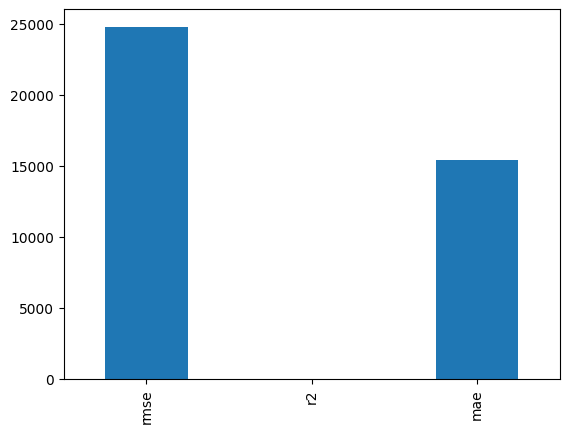

rmse    24803.714211
r2          0.900443
mae     15415.697758
dtype: float64


In [51]:
gb_pipeline_best.fit(X_train, y_train)
y_pred = gb_pipeline_best.predict(X_test)

display_regression_metrics(y_test, y_pred)

test_df = pd.read_csv('data/test.csv')
y_pred = gb_pipeline_best.predict(test_df)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission1.csv')

This submission received a score of 0.14707 on kaggle.

In [52]:
#Train on the whole dataset
gb_pipeline_best.fit(train_x, train_y)
test_df = pd.read_csv('data/test.csv')
y_pred = gb_pipeline_best.predict(test_df)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission2.csv')

This submission received a score of 0.14043 on Kaggle (leaderboard 2677/6456). Going to do some more data preprocessing and feature engineering to see if I can bring the score up.

#### Gradient Boosting Without PCA

In [43]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'regression__n_estimators': [200, 300, 550],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [3,10,20],
    'regression__max_depth': [3, 4]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=4, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'regression__learning_rate': 0.03, 'regression__max_depth': 4, 'regression__min_samples_split': 10, 'regression__n_estimators': 550}
Best Mean Squared Error Score: -27802.102379859436


__Observation:__ PCA doesn't seem to yield any significant benefits when applied before training the gradient boosting regressor. I am unsure of why it would provide a significant benefit for analysis using the Ridge regressor, but not the gbr.

I am going to look online to see what others have done as far as feature engineering goes on this dataset. I will then retry the analysis with and without PCA using the gradient boosting regressor.

## Engineering Some New Features

I did some research and found an article that details a few tips for feature engineering when working with the Ames Housing Dataset. I'm going to try and build off of their advice to improve my model.  
Reference: https://medium.com/@mskmay66/tackling-the-ames-housing-dataset-c63e7947908a

In [325]:
def add_total_sf(df):
    total_sf = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
    df['total_sf'] = total_sf

def add_finished_sf(df):
    finished_sf = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] - df['BsmtUnfSF']
    df['finished_sf'] = finished_sf

#different than the high_quality_sf engineered feature in the reference (the way that they computed theirs seemed less useful to me; they did not subtract the basement unfinished square feet)
def add_quality_sf(df):
    quality_sf = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] - df['BsmtUnfSF'] - df['LowQualFinSF']
    df['quality_sf'] = quality_sf

#different than the total_bath engineered feature in the reference (they did not include the bathrooms in the basement and counted half bathrooms the same as full bathrooms)
def add_total_baths(df):
    total_baths = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'])
    df['total_baths'] = total_baths

def drop_features(df):
    df.drop(columns=['FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'LowQualFinSF'], inplace=True)

def add_engineered_features(df):
    add_total_sf(df)
    add_finished_sf(df)
    add_quality_sf(df)
    add_total_baths(df)
    drop_features(df)
    

### New Preprocessing

In [326]:
def create_ordinal_transformer(categories, column_name):
    return (make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=np.nan), StandardScaler()), [column_name])


def get_preprocessor(df):
    #overallcond and overallqual already numerical
    ordinal_features = ["KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "HeatingQC", "BsmtCond", "BsmtQual", "ExterCond", "ExterQual"]
    
    kq_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    func_cat = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']
    fire_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    gqual_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    gcond_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    pool_cat = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
    heat_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    bcond_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    bqual_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    econd_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    equal_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    kq_cat.reverse()
    func_cat.reverse()
    fire_cat.reverse()
    gqual_cat.reverse()
    gcond_cat.reverse()
    pool_cat.reverse()
    heat_cat.reverse()
    bcond_cat.reverse()
    bqual_cat.reverse()
    econd_cat.reverse()
    equal_cat.reverse()
    
    numerical_features = df._get_numeric_data().columns
    categorical_features = list(set(df.columns) - set(numerical_features) - set(ordinal_features))

    return make_column_transformer(
        (numerical_transformer, numerical_features),
        (categorical_transformer, categorical_features),
        create_ordinal_transformer(kq_cat, 'KitchenQual'),
        create_ordinal_transformer(func_cat, 'Functional'),
        create_ordinal_transformer(fire_cat, 'FireplaceQu'),
        create_ordinal_transformer(gqual_cat, 'GarageQual'),
        create_ordinal_transformer(gcond_cat, 'GarageCond'),
        create_ordinal_transformer(pool_cat, 'PoolQC'),
        create_ordinal_transformer(heat_cat, 'HeatingQC'),
        create_ordinal_transformer(bcond_cat, 'BsmtCond'),
        create_ordinal_transformer(bqual_cat, 'BsmtQual'),
        create_ordinal_transformer(econd_cat, 'ExterCond'),
        create_ordinal_transformer(equal_cat, 'ExterQual')
    )

def fix_column_names(df):
    feature_names = [feature[feature.index('_') + 2:] for feature in df.columns]
    df.columns = feature_names


def preprocess(df, has_target=True):
    #drop sale price
    df_minus_target = df.drop(['SalePrice'], axis=1, errors='ignore')
    target_series = None
    if has_target:
        target_series = df['SalePrice']
    #add engineered features
    add_engineered_features(df_minus_target)

    preprocessor = get_preprocessor(df_minus_target)

    processed_df = None
    if has_target:
        processed_df = preprocessor.fit_transform(df_minus_target, target_series)
    else:
        processed_df = preprocessor.fit_transform(df_minus_target)

    #change column names
    fix_column_names(processed_df)
    if has_target:
        processed_df['SalePrice'] = target_series
    
    return processed_df





#### Mutual Information

In [327]:
processed_df = preprocess(train_house_prices_df)
x = processed_df.drop(columns=['SalePrice'])
y = processed_df['SalePrice']

feature_names = x.columns

mi_scores = mutual_info_regression(x, y, random_state=42)

mi_scores_series = pd.Series(mi_scores, index=feature_names)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("Mutual Info Scores:")
top_scores = mi_scores_series.head(100)
top_features = top_scores.index.to_list()
print("Top Scores:")
print(top_features)
top_scores

Mutual Info Scores:
Top Scores:
['total_sf', 'OverallQual', 'GrLivArea', 'finished_sf', 'quality_sf', 'GarageArea', 'YearBuilt', 'GarageCars', 'total_baths', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageYrBlt', 'MSSubClass', 'YearRemodAdd', 'GarageFinish_Unf', 'LotFrontage', 'TotRmsAbvGrd', 'Foundation_PConc', 'Fireplaces', 'HeatingQC', 'LotArea', 'OpenPorchSF', 'BsmtFinSF1', 'GarageFinish_Fin', 'WoodDeckSF', 'OverallCond', 'Foundation_CBlock', 'GarageType_Detchd', 'BsmtFinType1_GLQ', 'Exterior2nd_VinylSd', 'MasVnrArea', 'LotShape_Reg', 'FireplaceQu', 'GarageFinish_RFn', 'Neighborhood_NAmes', 'Exterior1st_VinylSd', 'Neighborhood_NridgHt', 'BedroomAbvGr', 'MSZoning_RM', 'SaleType_New', 'GarageType_Attchd', 'Neighborhood_NoRidge', 'MasVnrType_None', 'LotShape_IR1', 'SaleCondition_Partial', 'MasVnrType_Stone', 'MSZoning_RL', 'CentralAir_Y', 'BsmtExposure_No', 'Exterior2nd_MetalSd', 'HouseStyle_2Story', 'Electrical_SBrkr', 'Neighborhood_Somerst', 'SaleType_WD', 'Neighborhood_CollgCr', 'P

total_sf                0.676754
OverallQual             0.565821
GrLivArea               0.480836
finished_sf             0.478338
quality_sf              0.471077
                          ...   
Neighborhood_Mitchel    0.015724
RoofMatl_Tar&Grv        0.015594
Neighborhood_SWISU      0.015568
Heating_Wall            0.014550
Neighborhood_Sawyer     0.014508
Length: 100, dtype: float64

In [328]:
mi_scores_series = mi_scores_series.sort_values(ascending=True)
bottom_scores = mi_scores_series.head(50)
bottom_features = bottom_scores.index.to_list()

print("Bottom Scores")
print(bottom_features)
bottom_scores

Bottom Scores
['Exterior1st_BrkFace', 'GarageType_Basment', 'Fence_MnPrv', 'RoofMatl_Membran', 'RoofMatl_Roll', 'Condition2_Feedr', 'Condition2_Artery', 'Electrical_FuseP', 'Electrical_Mix', 'MasVnrType_BrkCmn', 'Heating_GasW', 'GarageType_2Types', 'Condition2_Norm', 'Utilities_NoSeWa', 'Neighborhood_Timber', 'SaleType_ConLD', 'Neighborhood_Veenker', 'Functional', 'MiscVal', 'PoolArea', 'MoSold', 'SaleCondition_Abnorml', 'Fence_GdWo', 'Fence_GdPrv', 'Exterior1st_Stucco', 'Condition1_RRNe', 'Exterior1st_WdShing', 'LandSlope_Sev', 'MiscFeature_Othr', 'MiscFeature_Shed', 'Condition2_PosA', 'BldgType_2fmCon', 'Foundation_Stone', 'Foundation_Wood', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'MiscFeature_TenC', 'Exterior2nd_Stone', 'GarageType_CarPort', 'Condition1_Feedr', 'Condition2_RRNn', 'Condition2_RRAe', 'Exterior1st_BrkComm', 'LandContour_Bnk', 'BsmtFinType2_Rec', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Neighborhood_Blueste', 'RoofStyle_Flat', 'HouseStyle_2.5Unf']


Exterior1st_BrkFace      0.000000
GarageType_Basment       0.000000
Fence_MnPrv              0.000000
RoofMatl_Membran         0.000000
RoofMatl_Roll            0.000000
Condition2_Feedr         0.000000
Condition2_Artery        0.000000
Electrical_FuseP         0.000000
Electrical_Mix           0.000000
MasVnrType_BrkCmn        0.000000
Heating_GasW             0.000000
GarageType_2Types        0.000000
Condition2_Norm          0.000000
Utilities_NoSeWa         0.000000
Neighborhood_Timber      0.000000
SaleType_ConLD           0.000000
Neighborhood_Veenker     0.000000
Functional               0.000000
MiscVal                  0.000000
PoolArea                 0.000000
MoSold                   0.000000
SaleCondition_Abnorml    0.000000
Fence_GdWo               0.000000
Fence_GdPrv              0.000000
Exterior1st_Stucco       0.000000
Condition1_RRNe          0.000000
Exterior1st_WdShing      0.000000
LandSlope_Sev            0.000000
MiscFeature_Othr         0.000000
MiscFeature_Sh

__Observation:__ The new engineered features seem to have high mutual information with the sale price.

### Correlation Analysis

In [329]:
corr_matrix = processed_df.corr(numeric_only=True)
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,FireplaceQu,GarageQual,GarageCond,PoolQC,HeatingQC,BsmtCond,BsmtQual,ExterCond,ExterQual,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.004771,0.024439,-0.025864,0.017381,-0.019458,-0.005152,0.076820,-0.064686,0.016178,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,-0.031077,0.048073,0.033953,0.059288,0.090051,0.045131,0.164071,-0.016430,0.165567,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,-0.049090,0.026851,0.016833,0.006978,0.003581,0.028160,0.079775,0.014732,0.055570,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.022357,0.129969,0.114023,0.025137,0.457083,0.173367,0.667345,0.013953,0.726278,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.013034,0.029467,0.023045,-0.013760,-0.014105,0.118761,-0.271285,0.389163,-0.138942,-0.077856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BsmtCond,-0.005152,0.045131,0.028160,0.173367,0.118761,0.225490,0.137869,0.042866,0.061747,0.081889,...,-0.013801,0.093541,0.128378,0.000639,0.119844,1.000000,0.209715,0.155703,0.162389,0.159445
BsmtQual,0.076820,0.164071,0.079775,0.667345,-0.271285,0.724570,0.570378,0.317035,0.284602,-0.072435,...,0.024300,0.130552,0.149076,0.013800,0.423714,0.209715,1.000000,-0.077565,0.648417,0.650138
ExterCond,-0.064686,-0.016430,0.014732,0.013953,0.389163,-0.103925,0.074745,-0.018065,0.040919,0.060429,...,-0.030168,0.071427,0.100683,0.027528,0.055520,0.155703,-0.077565,1.000000,0.009184,0.018899
ExterQual,0.016178,0.165567,0.055570,0.726278,-0.138942,0.598160,0.587318,0.345329,0.203777,-0.076236,...,0.087627,0.091169,0.078173,0.040252,0.520027,0.162389,0.648417,0.009184,1.000000,0.682639


#### Highly Correlated Features

In [330]:
abs_corr_df = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).to_frame()
abs_corr_df
abs_corr_df.columns = ["Coefficient"]
abs_corr_df = abs_corr_df[abs_corr_df.Coefficient != 1.00]
abs_corr_df.head(50)

,,Coefficient
quality_sf,finished_sf,0.998034
finished_sf,quality_sf,0.998034
SaleType_New,SaleCondition_Partial,0.986819
SaleCondition_Partial,SaleType_New,0.986819
Exterior2nd_VinylSd,Exterior1st_VinylSd,0.977525
Exterior1st_VinylSd,Exterior2nd_VinylSd,0.977525
Exterior2nd_CmentBd,Exterior1st_CemntBd,0.974171
Exterior1st_CemntBd,Exterior2nd_CmentBd,0.974171
Exterior2nd_MetalSd,Exterior1st_MetalSd,0.973065
Exterior1st_MetalSd,Exterior2nd_MetalSd,0.973065


#### Features Highly Correlated with Sale Price

In [331]:
abs_corr_df = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).to_frame()
abs_corr_df
abs_corr_df.columns = ["Coefficient"]
abs_corr_df = abs_corr_df[abs_corr_df.index.get_level_values(1) == "SalePrice"]
abs_corr_df.head(50)

,,Coefficient
SalePrice,SalePrice,1.000000
OverallQual,SalePrice,0.790982
total_sf,SalePrice,0.782260
GrLivArea,SalePrice,0.708624
finished_sf,SalePrice,0.708047
quality_sf,SalePrice,0.707980
ExterQual,SalePrice,0.682639
KitchenQual,SalePrice,0.659600
BsmtQual,SalePrice,0.650138
GarageCars,SalePrice,0.640409


### New Regressions

In [332]:
processed_df = preprocess(train_house_prices_df)

train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=123)

train_x_entire = processed_df.drop(columns=["SalePrice"])
train_y_entire = processed_df["SalePrice"]

X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

#### Ridge with PCA

In [310]:
pipeline_ridge = Pipeline([
    ('pca', PCA()),
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 400],
    'pca__n_components': [5, 10, 15, 30, 45, 50, 60, 100, 150]
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

Best parameters: {'pca__n_components': 5, 'ridge__alpha': 50}
Best Root Mean Squared Error Score: -36614.67061658773


### Ridge without PCA

In [333]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400],
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

Best parameters: {'ridge__alpha': 400}
Best Root Mean Squared Error Score: -37052.44349332923


__Observations:__ PCA still seems to improve the results with the ridge regressor, but not as much as before the addition of the new features.  
Ridge Regressor still does not have great performance

### GBR with PCA

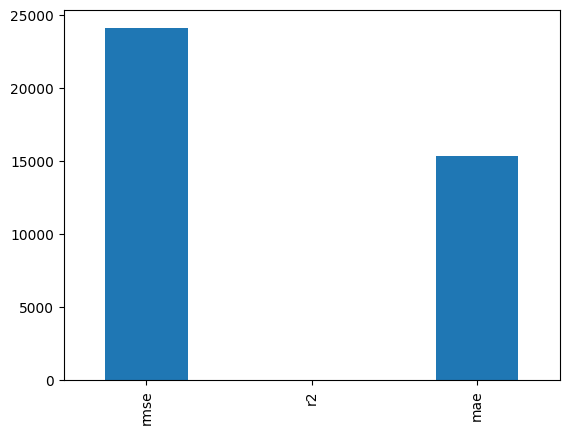

rmse    24106.047032
r2          0.905965
mae     15312.231269
dtype: float64


In [334]:
gb_pipeline = Pipeline([
    ('pca', PCA(120)),
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=40, n_estimators=450))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

__Search 1__

In [313]:
gb_pipeline = Pipeline([
    ('pca', PCA()),
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'pca__n_components': [30, 50, 100, 120, 150],
    'regression__n_estimators': [350, 450, 550],
    'regression__learning_rate': [0.03],
    'regression__min_samples_split': [20, 30, 40],
    'regression__max_depth': [3]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=4, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

KeyboardInterrupt: 

Found that the best min_samples_split is actually 40.

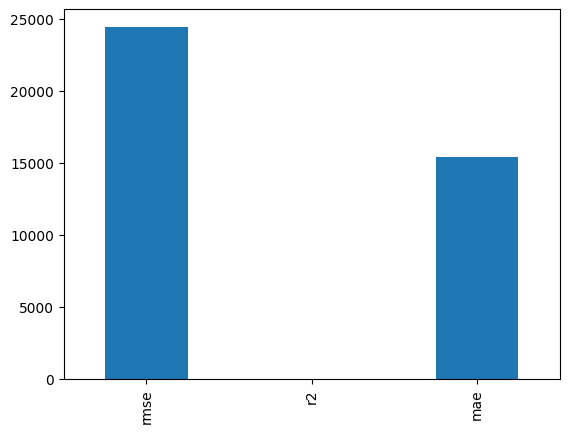

rmse    24458.788689
r2          0.903193
mae     15405.274833
dtype: float64


In [316]:
gb_pipeline_best = Pipeline([
    ('pca', PCA(120)),
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=40, n_estimators=450))
])

gb_pipeline_best.fit(X_train, y_train)
y_pred = gb_pipeline_best.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [335]:
#Train on the whole dataset
gb_pipeline_best.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
train_entire = train_house_prices_df.drop(columns=['SalePrice'])
add_engineered_features(train_entire)
preprocessor = get_preprocessor(train_entire)
preprocessor.fit(train_entire)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline_best.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission3.csv')

This submission received a score of 0.13322 on Kaggle (leaderboard: 1759/6455).

#### GBR Without PCA

In [186]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'regression__n_estimators': [200, 300, 400, 550],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [3,10,20,30],
    'regression__max_depth': [3, 4]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'regression__learning_rate': 0.03, 'regression__max_depth': 3, 'regression__min_samples_split': 10, 'regression__n_estimators': 300}
Best Root Mean Squared Error Score: -29119.382316403702


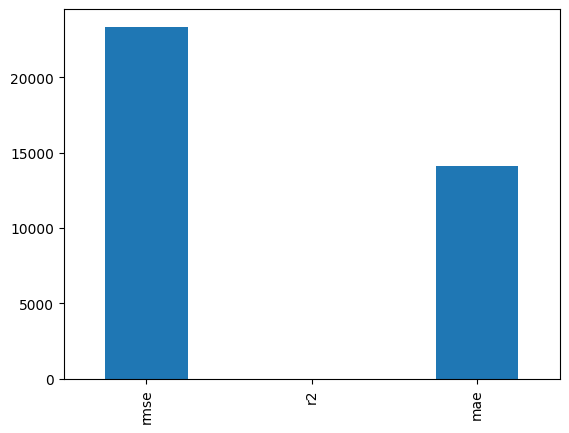

rmse    23372.634020
r2          0.911600
mae     14150.818332
dtype: float64


In [319]:
gb_pipeline_best = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=10, n_estimators=300))
])

gb_pipeline_best.fit(X_train, y_train)
y_pred = gb_pipeline_best.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [298]:
#Train on the whole dataset
gb_pipeline_best.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
train_entire = train_house_prices_df.drop(columns=['SalePrice'])
add_engineered_features(train_entire)
preprocessor = get_preprocessor(train_entire)
preprocessor.fit(train_entire)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline_best.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission4.csv')

__Observation:__ Although not using pca appears to yield a better rmse here, the model performs worse on the test data given by kaggle.

## More Data Preparation

I want to dive deeper into some of the features and see if there's anything I can revise with the current engineered features or any new features I can create that will improve my model.

#### Feature Engineering

__Looking at above ground sq ft features__

In [251]:
features = ["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea"]
test_df = train_house_prices_df[features]
test_df["SumSF"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"] + test_df["LowQualFinSF"]
print(test_df.shape)
test_df = test_df[test_df['SumSF'] != test_df['GrLivArea']]
test_df

(1460, 5)


,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SumSF
Id,,,,,


__Observation:__ 1stFlrSF and 2ndFlrSF only include the high quality SF and GrLivArea is a sum of the three features

__Looking at below ground quality and sq ft features__

In [252]:
features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
test_df = train_house_prices_df[features]
print(test_df.shape)
test_df

(1460, 9)


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
1,Gd,TA,No,GLQ,706,Unf,0,150,856
2,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
3,Gd,TA,Mn,GLQ,486,Unf,0,434,920
4,TA,Gd,No,ALQ,216,Unf,0,540,756
5,Gd,TA,Av,GLQ,655,Unf,0,490,1145
...,...,...,...,...,...,...,...,...,...
1456,Gd,TA,No,Unf,0,Unf,0,953,953
1457,Gd,TA,No,ALQ,790,Rec,163,589,1542
1458,TA,Gd,No,GLQ,275,Unf,0,877,1152


__Are there any rows where BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF do not sum to TotalBsmtSF?__

In [253]:
test_df["SumSF"] = test_df["BsmtFinSF1"] + test_df["BsmtFinSF2"] + test_df["BsmtUnfSF"]
q1_df = test_df[test_df['SumSF'] != test_df['TotalBsmtSF']]
q1_df

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SumSF
Id,,,,,,,,,,


__Observation:__ Those three features always sum to BsmtUnfSF

__Verify that BsmtFinSF2 is always 0 if BsmtFinType2 is Unf__

In [258]:
q2_df = test_df[(test_df['BsmtFinType2'] == "Unf") & (test_df['BsmtFinSF2'] != 0)]
q2_df

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SumSF
Id,,,,,,,,,,


__Observation:__ BsmtFinSF2 is always 0 if BsmtFinType2 is Unf

__Re-engineer SF Features__

In [347]:
def add_total_sf_original(df):
    total_sf = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
    df['total_sf'] = total_sf

def add_finished_sf_original(df):
    finished_sf = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] - df['BsmtUnfSF']
    df['finished_sf'] = finished_sf

def add_quality_sf_original(df):
    quality_sf = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] - df['BsmtUnfSF'] - df['LowQualFinSF']
    df['quality_sf'] = quality_sf

def add_total_sf_test(df):
    total_sf = df['GrLivArea'] + df['TotalBsmtSF']
    df['total_sf_test'] = total_sf

def add_finished_sf_test(df):
    finished_sf = df['GrLivArea'] + df['TotalBsmtSF'] - df['BsmtUnfSF']
    df['finished_sf_test'] = finished_sf

def calculate_bsmt_quality_sf(row):
    low_quality_bsmt_grades = ["LwQ", "Unf", "NA"]
    quality_sf = 0
    if row['BsmtFinType1'] not in low_quality_bsmt_grades:
        quality_sf += row['BsmtFinSF1']
    if row['BsmtFinType2'] not in low_quality_bsmt_grades:
        quality_sf += row['BsmtFinSF2']
    return quality_sf

def add_quality_sf_test(df):
    quality_sf = df['GrLivArea'] - df['LowQualFinSF'] + df.apply(calculate_bsmt_quality_sf, axis=1)
    df['quality_sf_test'] = quality_sf

#different than the total_bath engineered feature in the reference (they did not include the bathrooms in the basement and counted half bathrooms the same as full bathrooms)
def add_total_baths(df):
    total_baths = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'])
    df['total_baths'] = total_baths

def add_engineered_features_test(df):
    add_total_sf_original(df)
    add_finished_sf_original(df)
    add_quality_sf_original(df)
    add_total_sf_test(df)
    add_finished_sf_test(df)
    add_quality_sf_test(df)
    add_total_baths(df)

#### Test New Engineered SF Features

In [348]:
test_df = train_house_prices_df.drop(columns=['SalePrice'])
add_engineered_features_test(test_df)
preprocessor = get_preprocessor(test_df)
test_df = preprocessor.fit_transform(test_df)
fix_column_names(test_df)
test_df['SalePrice'] = train_house_prices_df['SalePrice']

In [349]:
x = test_df.drop(columns=['SalePrice'])
y = test_df['SalePrice']

feature_names = x.columns

mi_scores = mutual_info_regression(x, y, random_state=42)

mi_scores_series = pd.Series(mi_scores, index=feature_names)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("Mutual Info Scores:")
top_scores = mi_scores_series.head(30)
top_features = top_scores.index.to_list()
print("Top Scores:")
print(top_features)
top_scores

Mutual Info Scores:
Top Scores:
['total_sf', 'total_sf_test', 'OverallQual', 'quality_sf_test', 'GrLivArea', 'finished_sf', 'quality_sf', 'finished_sf_test', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'GarageCars', 'total_baths', 'KitchenQual', 'ExterQual', 'BsmtQual', '1stFlrSF', 'GarageYrBlt', 'MSSubClass', 'FullBath', 'YearRemodAdd', 'GarageFinish_Unf', 'TotRmsAbvGrd', 'LotFrontage', '2ndFlrSF', 'Foundation_PConc', 'HeatingQC', 'Fireplaces', 'LotArea', 'BsmtFinSF1']


total_sf            0.676979
total_sf_test       0.662459
OverallQual         0.561451
quality_sf_test     0.504737
GrLivArea           0.483327
finished_sf         0.477494
quality_sf          0.469724
finished_sf_test    0.468320
TotalBsmtSF         0.370109
YearBuilt           0.367900
GarageArea          0.363747
GarageCars          0.363679
total_baths         0.334005
KitchenQual         0.322755
ExterQual           0.321351
BsmtQual            0.316742
1stFlrSF            0.308932
GarageYrBlt         0.302312
MSSubClass          0.273554
FullBath            0.261549
YearRemodAdd        0.240534
GarageFinish_Unf    0.225771
TotRmsAbvGrd        0.224463
LotFrontage         0.221956
2ndFlrSF            0.195841
Foundation_PConc    0.186428
HeatingQC           0.167054
Fireplaces          0.161979
LotArea             0.159285
BsmtFinSF1          0.145082
dtype: float64

In [350]:
corr_matrix = test_df.corr(numeric_only=True)
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,FireplaceQu,GarageQual,GarageCond,PoolQC,HeatingQC,BsmtCond,BsmtQual,ExterCond,ExterQual,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.004771,0.024439,-0.025864,0.017381,-0.019458,-0.005152,0.076820,-0.064686,0.016178,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,-0.031077,0.048073,0.033953,0.059288,0.090051,0.045131,0.164071,-0.016430,0.165567,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,-0.049090,0.026851,0.016833,0.006978,0.003581,0.028160,0.079775,0.014732,0.055570,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.022357,0.129969,0.114023,0.025137,0.457083,0.173367,0.667345,0.013953,0.726278,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.013034,0.029467,0.023045,-0.013760,-0.014105,0.118761,-0.271285,0.389163,-0.138942,-0.077856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BsmtCond,-0.005152,0.045131,0.028160,0.173367,0.118761,0.225490,0.137869,0.042866,0.061747,0.081889,...,-0.013801,0.093541,0.128378,0.000639,0.119844,1.000000,0.209715,0.155703,0.162389,0.159445
BsmtQual,0.076820,0.164071,0.079775,0.667345,-0.271285,0.724570,0.570378,0.317035,0.284602,-0.072435,...,0.024300,0.130552,0.149076,0.013800,0.423714,0.209715,1.000000,-0.077565,0.648417,0.650138
ExterCond,-0.064686,-0.016430,0.014732,0.013953,0.389163,-0.103925,0.074745,-0.018065,0.040919,0.060429,...,-0.030168,0.071427,0.100683,0.027528,0.055520,0.155703,-0.077565,1.000000,0.009184,0.018899
ExterQual,0.016178,0.165567,0.055570,0.726278,-0.138942,0.598160,0.587318,0.345329,0.203777,-0.076236,...,0.087627,0.091169,0.078173,0.040252,0.520027,0.162389,0.648417,0.009184,1.000000,0.682639


In [351]:
abs_corr_df = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).to_frame()
abs_corr_df
abs_corr_df.columns = ["Coefficient"]
abs_corr_df = abs_corr_df[abs_corr_df.Coefficient != 1.00]
abs_corr_df.head(30)

Coefficient
total_sf_test         total_sf                  0.998256
total_sf              total_sf_test             0.998256
finished_sf           quality_sf                0.998034
quality_sf            finished_sf               0.998034
finished_sf           finished_sf_test          0.998031
finished_sf_test      finished_sf               0.998031
                      quality_sf                0.992138
quality_sf            finished_sf_test          0.992138
quality_sf_test       finished_sf               0.987959
finished_sf           quality_sf_test           0.987959
SaleType_New          SaleCondition_Partial     0.986819
SaleCondition_Partial SaleType_New              0.986819
quality_sf_test       quality_sf                0.986470
quality_sf            quality_sf_test           0.986470
quality_sf_test       finished_sf_test          0.985561
finished_sf_test      quality_sf_test           0.985561
Exterior2nd_VinylSd   Exterior1st_VinylSd       0.977525
Exterior1st_VinylSd   Exterior2nd_VinylSd       0.977525
Exterior1st_CemntBd   Exterior2nd_CmentBd       0.974171
Exterior2nd_CmentBd   Exterior1st_CemntBd       0.974171
Exterior1st_MetalSd   Exterior2nd_MetalSd       0.973065
Exterior2nd_MetalSd   Exterior1st_MetalSd       0.973065
RoofStyle_Gable       RoofStyle_Hip             0.933462
RoofStyle_Hip         RoofStyle_Gable           0.933462
LotShape_IR1          LotShape_Reg              0.925959
LotShape_Reg          LotShape_IR1              0.925959
LandSlope_Mod         LandSlope_Gtl             0.908607
LandSlope_Gtl         LandSlope_Mod             0.908607
MiscFeature_Gar2      MiscVal                   0.885427
MiscVal               MiscFeature_Gar2          0.885427

In [352]:
abs_corr_df = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).to_frame()
abs_corr_df
abs_corr_df.columns = ["Coefficient"]
abs_corr_df = abs_corr_df[abs_corr_df.index.get_level_values(1) == "SalePrice"]
abs_corr_df.head(50)

,,Coefficient
SalePrice,SalePrice,1.000000
OverallQual,SalePrice,0.790982
total_sf,SalePrice,0.782260
total_sf_test,SalePrice,0.778959
quality_sf_test,SalePrice,0.722702
GrLivArea,SalePrice,0.708624
finished_sf,SalePrice,0.708047
quality_sf,SalePrice,0.707980
finished_sf_test,SalePrice,0.705327
ExterQual,SalePrice,0.682639


In [513]:
def add_total_sf(df):
    total_sf = df['GrLivArea'] + df['TotalBsmtSF']
    df['total_sf'] = total_sf

def add_finished_sf(df):
    finished_sf = df['GrLivArea'] + df['TotalBsmtSF'] - df['BsmtUnfSF']
    df['finished_sf'] = finished_sf

def calculate_bsmt_quality_sf(row):
    low_quality_bsmt_grades = ["LwQ", "Unf", "NA"]
    quality_sf = 0
    if row['BsmtFinType1'] not in low_quality_bsmt_grades:
        quality_sf += row['BsmtFinSF1']
    if row['BsmtFinType2'] not in low_quality_bsmt_grades:
        quality_sf += row['BsmtFinSF2']
    return quality_sf

def add_quality_sf(df):
    quality_sf = df['GrLivArea'] - df['LowQualFinSF'] + df.apply(calculate_bsmt_quality_sf, axis=1)
    df['quality_sf'] = quality_sf

#different than the total_bath engineered feature in the reference (they did not include the bathrooms in the basement and counted half bathrooms the same as full bathrooms)
def add_total_baths(df):
    total_baths = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'])
    df['total_baths'] = total_baths

def drop_features(df):
    #['FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'LowQualFinSF']
    df.drop(columns=['FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFinSF2', 'BsmtFinSF1'], inplace=True)

def add_engineered_features(df):
    add_total_sf(df)
    add_finished_sf(df)
    add_quality_sf(df)
    add_total_baths(df)
    drop_features(df)

In [514]:
processed_df = train_house_prices_df.drop(columns=['SalePrice'])
add_engineered_features(processed_df)
preprocessor = get_preprocessor(processed_df)
processed_df = preprocessor.fit_transform(processed_df)
fix_column_names(processed_df)
processed_df['SalePrice'] = train_house_prices_df['SalePrice']

train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=123)

train_x_entire = processed_df.drop(columns=["SalePrice"])
train_y_entire = processed_df["SalePrice"]

X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

In [355]:
### Test with Ridge Classifier and PCA
pipeline_ridge = Pipeline([
    ('pca', PCA()),
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 400],
    'pca__n_components': [5, 10, 15, 30, 45, 50, 60, 100, 150]
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

Best parameters: {'pca__n_components': 5, 'ridge__alpha': 50}
Best Root Mean Squared Error Score: -36502.94816458811


In [345]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400],
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

Best parameters: {'ridge__alpha': 400}
Best Root Mean Squared Error Score: -36982.10592504884


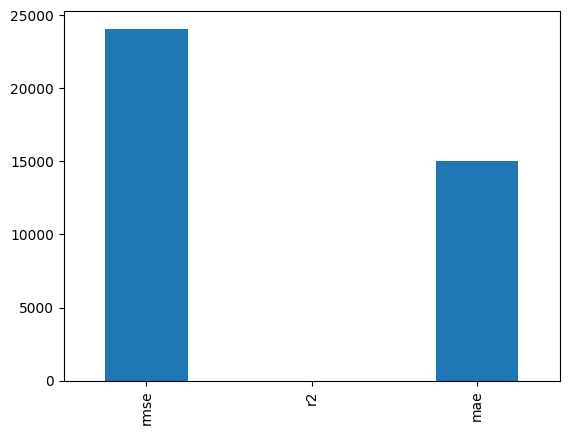

rmse    24079.760557
r2          0.906170
mae     15023.038143
dtype: float64


In [324]:
gb_pipeline = Pipeline([
    ('pca', PCA(120)),
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=40, n_estimators=450))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [300]:
#Train on the whole dataset
gb_pipeline_best.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline_best.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission5.csv')

In [358]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'regression__n_estimators': [200, 300, 400, 550],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [3,10,20,30,40],
    'regression__max_depth': [3, 4]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'regression__learning_rate': 0.03, 'regression__max_depth': 4, 'regression__min_samples_split': 30, 'regression__n_estimators': 300}
Best Root Mean Squared Error Score: -28552.666607220326


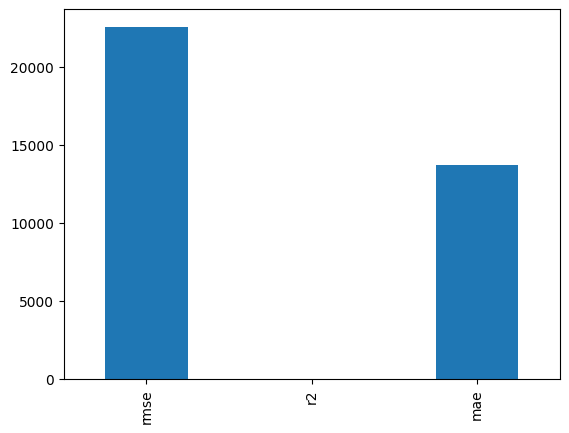

rmse    22562.568601
r2          0.917621
mae     13719.581202
dtype: float64


In [359]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=4, min_samples_split=30, n_estimators=300))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [365]:
#Train on the whole dataset
gb_pipeline_best.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline_best.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission6.csv', index=False)

### More Data Preparation

In [367]:
abs_corr_df = train_house_prices_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).to_frame()
abs_corr_df
abs_corr_df.columns = ["Coefficient"]
abs_corr_df = abs_corr_df[abs_corr_df.index.get_level_values(1) == "SalePrice"]
abs_corr_df.head(10)

,,Coefficient
SalePrice,SalePrice,1.000000
OverallQual,SalePrice,0.790982
GrLivArea,SalePrice,0.708624
GarageCars,SalePrice,0.640409
GarageArea,SalePrice,0.623431
TotalBsmtSF,SalePrice,0.613581
1stFlrSF,SalePrice,0.605852
FullBath,SalePrice,0.560664
TotRmsAbvGrd,SalePrice,0.533723
YearBuilt,SalePrice,0.522897


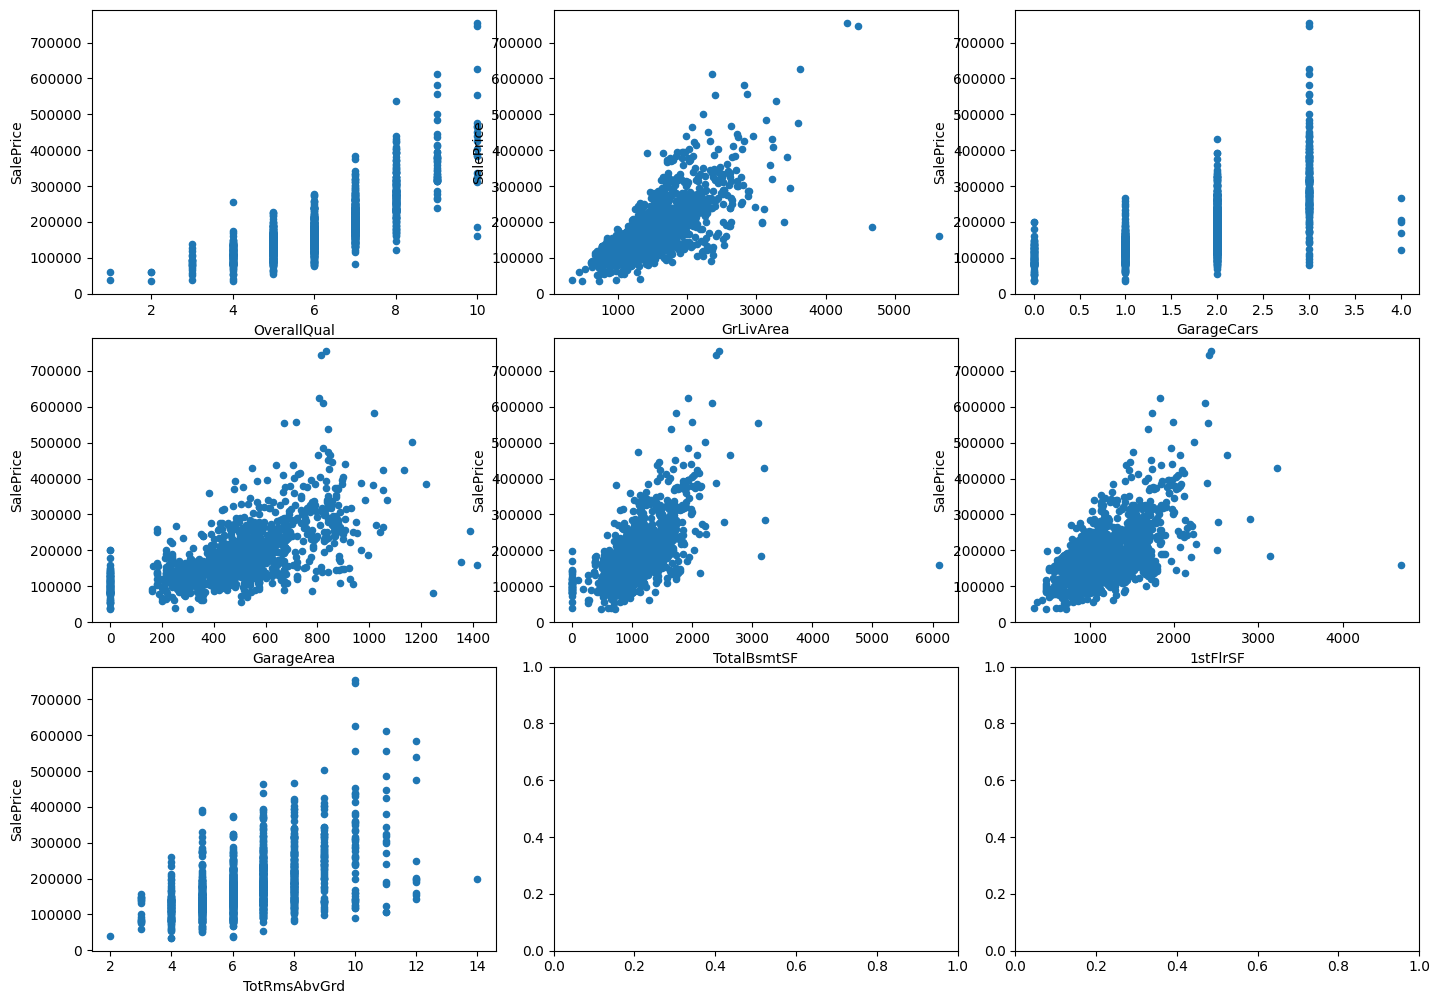

In [378]:
top_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd"]
plt_df = train_house_prices_df[top_features + ['SalePrice']]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
fig.tight_layout()
count = 0
for feature in top_features:
    row = count // 3
    col = count % 3
    train_house_prices_df.plot(kind="scatter", x=feature, y="SalePrice", ax=axes[row, col])
    count += 1
plt.show()

#### Find outliers  
This article (https://nycdatascience.com/blog/student-works/predicting-house-prices-using-machine-learning-what-features-matter-most/) had some useful information about finding outliers in the dataset.

In [385]:
df = train_house_prices_df[top_features + ['2ndFlrSF', '','SalePrice']].copy()
df[df['GrLivArea'] >= 4000]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,SalePrice
Id,,,,,,,,
524,10,4676,3,884,3138,3138,11,184750
692,10,4316,3,832,2444,2444,10,755000
1183,10,4476,3,813,2396,2411,10,745000
1299,10,5642,2,1418,6110,4692,12,160000


__524__ and __1299__ appear to be outliers for the trend between GrLivArea and SalePrice.

In [386]:
df[df['TotalBsmtSF'] > 5000]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,SalePrice
Id,,,,,,,,
1299,10,5642,2,1418,6110,4692,12,160000


__1299__ Appears to be an outlier for the trend between bsmt sq ft and saleprice.

In [516]:
processed_df = train_house_prices_df.drop(columns=['SalePrice'], index=[524, 1299])
add_engineered_features(processed_df)
preprocessor = get_preprocessor(processed_df)
processed_df = preprocessor.fit_transform(processed_df)
fix_column_names(processed_df)
processed_df['SalePrice'] = train_house_prices_df['SalePrice']

train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=123)

train_x_entire = processed_df.drop(columns=["SalePrice"])
train_y_entire = processed_df["SalePrice"]

X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

In [404]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400],
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

### Test with Ridge Classifier and PCA
pipeline_ridge = Pipeline([
    ('pca', PCA()),
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 400],
    'pca__n_components': [120, 150, 200]
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

Best parameters: {'ridge__alpha': 50}
Best Root Mean Squared Error Score: -26454.12505461265
Best parameters: {'pca__n_components': 200, 'ridge__alpha': 50}
Best Root Mean Squared Error Score: -26454.12505461264


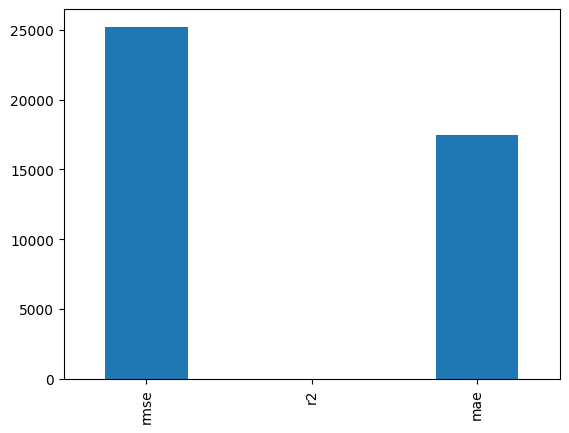

rmse    25221.405751
r2          0.888545
mae     17468.970227
dtype: float64


In [405]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge(50))
])

pipeline_ridge.fit(X_train, y_train)
y_pred = pipeline_ridge.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [406]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'regression__n_estimators': [200, 300, 400, 550],
    'regression__learning_rate': [0.01, 0.03],
    'regression__min_samples_split': [3,10,20,30,40],
    'regression__max_depth': [3, 4]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'regression__learning_rate': 0.03, 'regression__max_depth': 3, 'regression__min_samples_split': 20, 'regression__n_estimators': 550}
Best Root Mean Squared Error Score: -24185.421957072234


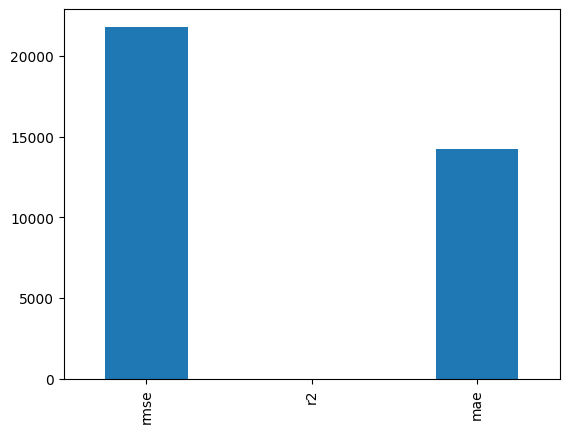

rmse    21806.698770
r2          0.916681
mae     14197.103454
dtype: float64


In [407]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=20, n_estimators=550))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [519]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=20, n_estimators=550))
])

#Train on the whole dataset
gb_pipeline.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission7.csv', index=False)

In [517]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'regression__n_estimators': [300, 400, 550, 650, 750],
    'regression__learning_rate': [0.02, 0.03, 0.04],
    'regression__min_samples_split': [3,10,20,30,40,50,60],
    'regression__max_depth': [3, 4]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'regression__learning_rate': 0.04, 'regression__max_depth': 3, 'regression__min_samples_split': 3, 'regression__n_estimators': 650}
Best Root Mean Squared Error Score: -24043.027816509482


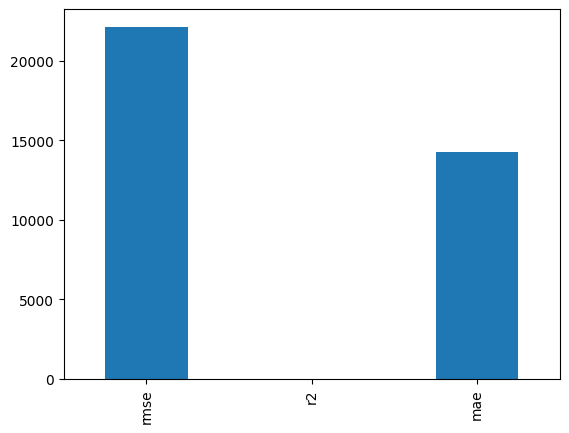

rmse    22143.034618
r2          0.914092
mae     14272.426070
dtype: float64


In [518]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.04, max_depth=3, min_samples_split=3, n_estimators=650))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [520]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.04, max_depth=3, min_samples_split=3, n_estimators=650))
])

#Train on the whole dataset
gb_pipeline.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission8.csv', index=False)

#### More Feature Engineering

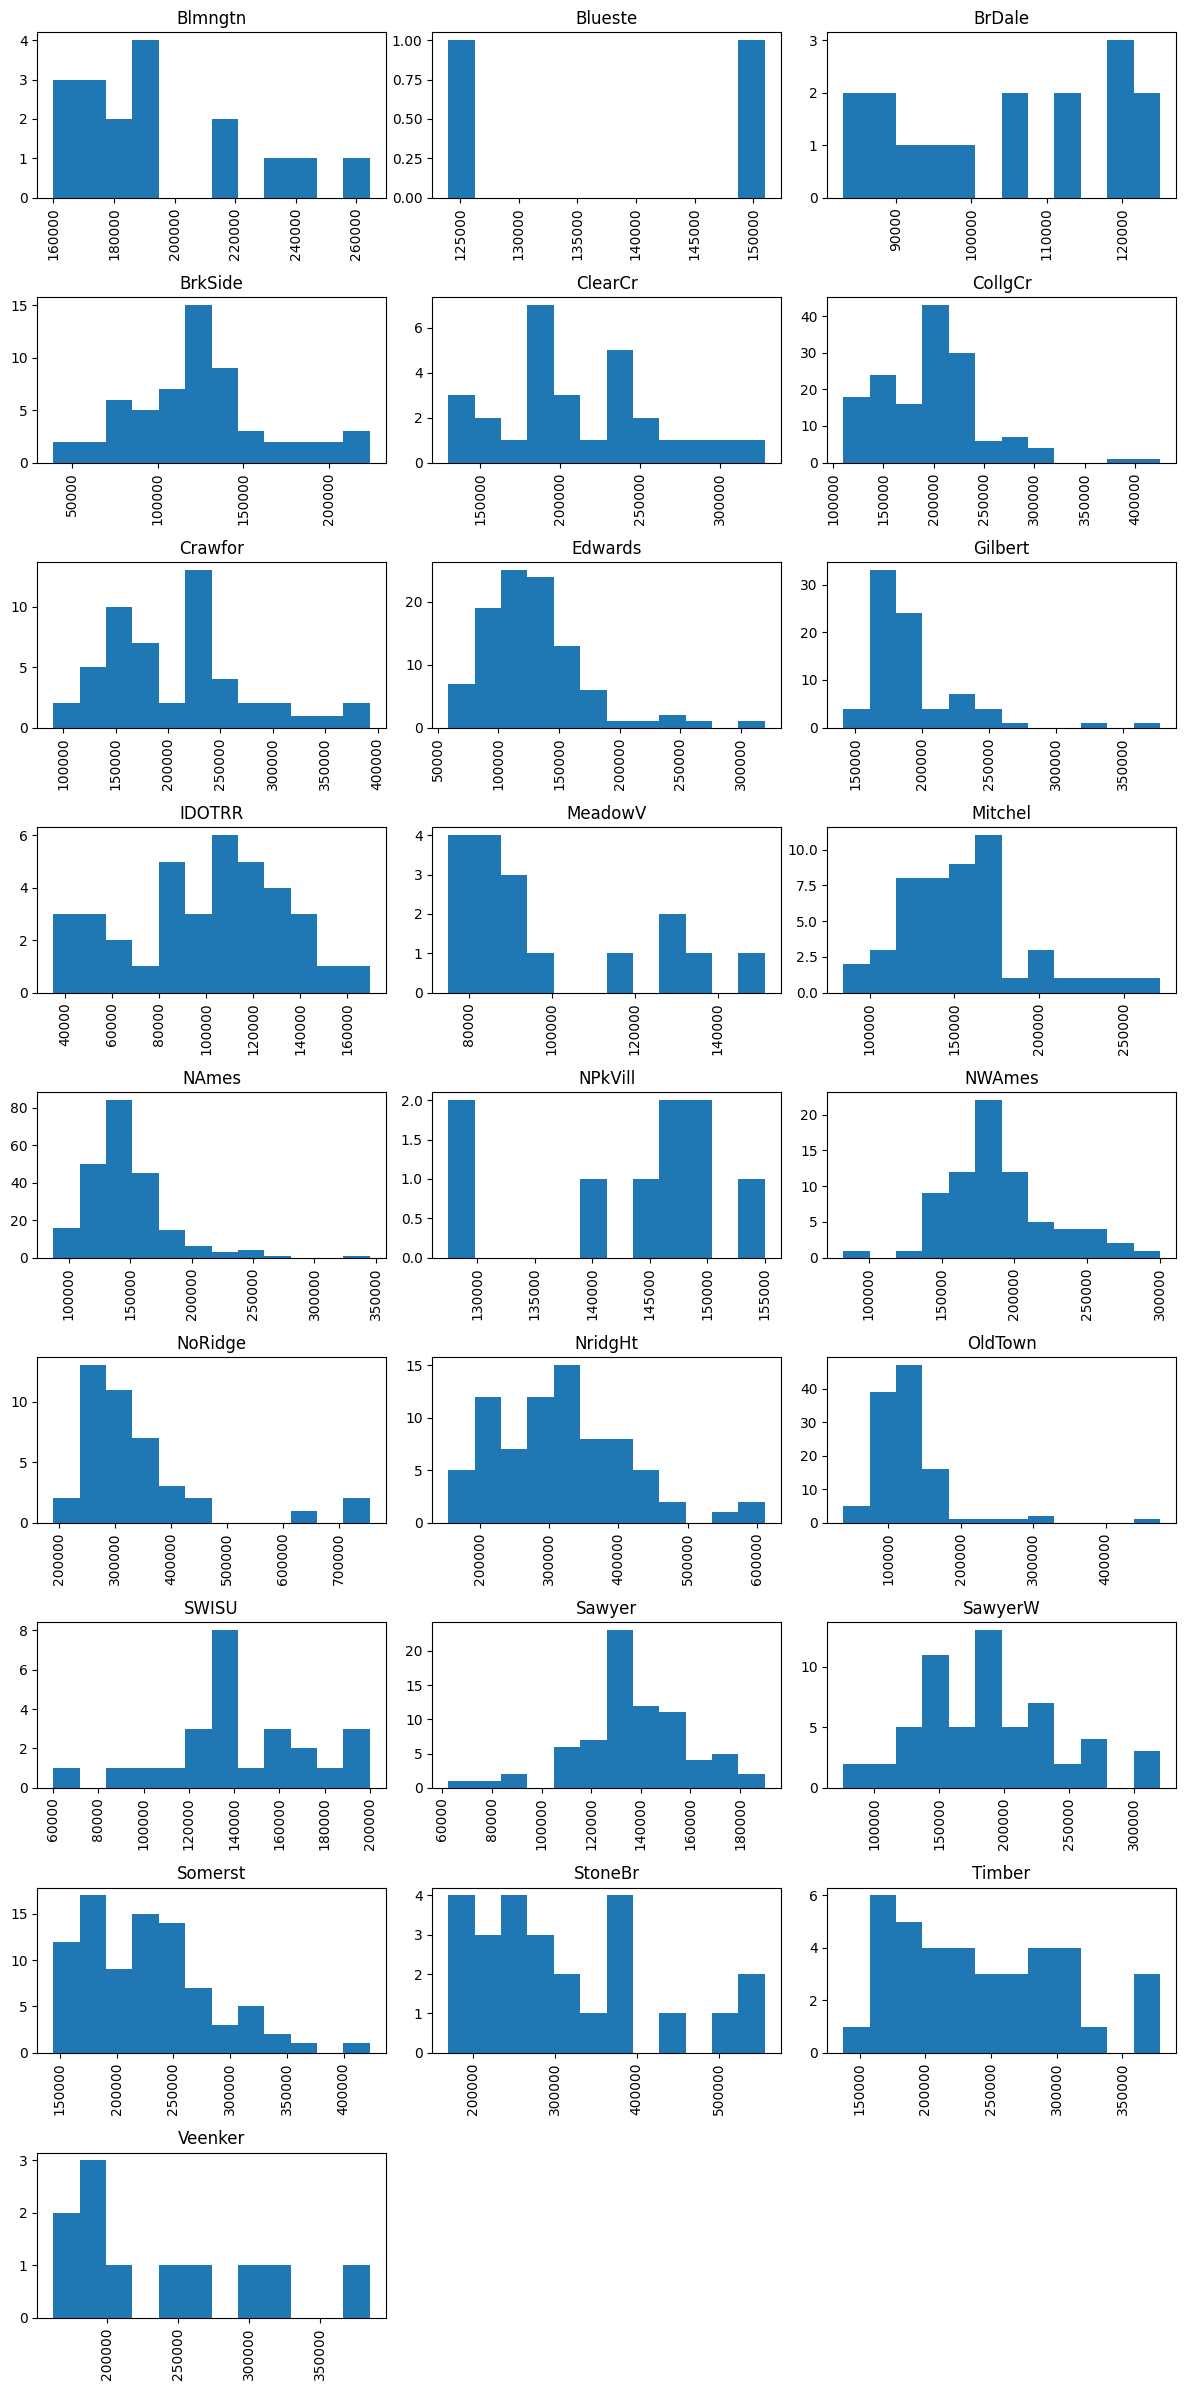

,sum,min,max,mean,median,quantile1,quantile2,std,OverallQual,OverallCond,ExterQual,BsmtQual,ExterCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,Functional,BsmtCond
Neighborhood,,,,,,,,,,,,,,,,,,,,
MeadowV,1675800,75000,151400,98576.470588,88000.0,78200.0,131540.0,23491.049610,4.470588,5.529412,2.000000,3.705882,2.117647,2.470588,2.176471,3.647059,3.000000,3.000000,6.764706,3.000000
IDOTRR,3704580,34900,169500,100123.783784,103000.0,55000.0,140040.0,33376.710117,4.756757,5.540541,1.891892,3.000000,1.945946,2.486486,1.972973,3.972973,2.972973,2.891892,6.783784,2.810811
BrDale,1671900,83000,125000,104493.750000,106000.0,86700.0,121000.0,14330.176493,5.687500,5.437500,2.000000,3.000000,2.000000,2.250000,2.062500,3.812500,3.000000,3.000000,6.875000,2.937500
OldTown,14489459,37900,475000,128225.300885,119000.0,87000.0,161000.0,52650.583185,5.389381,6.353982,2.061947,2.893805,2.247788,2.849558,2.256637,3.893805,2.805310,2.823009,6.707965,2.929204
Edwards,12821970,58500,320000,128219.700000,121750.0,82450.0,177200.0,43208.616459,5.080000,5.440000,2.130000,3.250000,2.070000,2.930000,2.180000,3.930000,2.960000,2.950000,6.610000,2.980000
BrkSide,7240375,39300,223500,124834.051724,124300.0,78600.0,181550.0,40348.689270,5.051724,6.137931,2.017241,3.017241,2.017241,2.775862,1.982759,3.844828,2.931034,2.913793,6.672414,2.965517
Sawyer,10122692,62383,190000,136793.135135,135000.0,110530.0,167100.0,22345.129157,5.027027,5.810811,2.027027,3.135135,2.148649,2.716216,2.135135,3.500000,2.986486,3.000000,6.689189,3.027027
Blueste,275000,124000,151000,137500.000000,137500.0,126700.0,148300.0,19091.883092,6.000000,6.000000,2.000000,4.000000,2.500000,2.000000,2.000000,3.000000,3.000000,3.000000,7.000000,3.000000
SWISU,3564784,60000,200000,142591.360000,139500.0,107200.0,185200.0,32622.917679,5.440000,5.920000,2.040000,3.160000,1.960000,3.080000,2.080000,3.880000,2.920000,3.040000,6.640000,2.840000


In [522]:
# Plot neighborhood vs saleprice

neighborhood_list = []
for col in list(X_train.columns):
    if "Neighborhood" in col:
        neighborhood_list.append(col)

##Create column transformer for other attributes of interest by neighborhood
quality_transformer = make_column_transformer(
    create_ordinal_transformer(kq_cat, 'KitchenQual', False),
    create_ordinal_transformer(func_cat, 'Functional', False),
    create_ordinal_transformer(fire_cat, 'FireplaceQu', False),
    create_ordinal_transformer(gqual_cat, 'GarageQual', False),
    create_ordinal_transformer(gcond_cat, 'GarageCond', False),
    create_ordinal_transformer(heat_cat, 'HeatingQC', False),
    create_ordinal_transformer(bcond_cat, 'BsmtCond', False),
    create_ordinal_transformer(bqual_cat, 'BsmtQual', False),
    create_ordinal_transformer(econd_cat, 'ExterCond', False),
    create_ordinal_transformer(equal_cat, 'ExterQual', False),
    remainder='passthrough'
)

transformed_df = quality_transformer.fit_transform(train_house_prices_df)
fix_column_names(transformed_df)

quality_features = ['OverallQual', 'OverallCond', 'ExterQual','BsmtQual','ExterCond',
                   'HeatingQC','KitchenQual','FireplaceQu','GarageQual', 'GarageCond', 'Functional', 'BsmtCond']

n_groupby = transformed_df.groupby('Neighborhood')['SalePrice', 'OverallQual', 'OverallCond', 'ExterQual','BsmtQual','ExterCond',
                   'HeatingQC','KitchenQual','FireplaceQu','GarageQual', 'GarageCond', 'Functional', 'BsmtCond']


def quantile1(x):
    return x.quantile(0.1)
def quantile2(x):
    return x.quantile(0.9)

n_stats_all_df = n_groupby.agg(['sum', 'min', 'max', 'mean', 'median', quantile1, quantile2, 'std'])
n_stats_df = n_stats_all_df['SalePrice'].copy()
for feature in quality_features:
    n_stats_df[feature] = n_stats_all_df[feature]['mean']

train_house_prices_df.hist('SalePrice', by='Neighborhood', layout=(9,3), bins=12, figsize=(12,24))
plt.tight_layout()
plt.show()


n_stats_all_df.to_csv("n-stats.csv")
n_stats_df.sort_values('median')

#### Compute a Neighborhood Score Feature  
I saw one example where an individual computed a neighborhood score as part of their feature engineering(https://nbviewer.org/github/eugeneyan84/Ames-Housing-Data-Analysis/blob/main/code/02_Preprocessing_and_Feature_Engineering.ipynb). I will attempt to do so in a somewhat similar fashion.

In [523]:
def calculate_neighborhood_quality(row):
    quality_score = 0
    for feature in quality_features:
        quality_score += row[feature] * transformed_df[feature].corr(transformed_df['SalePrice'])
    return quality_score

n_stats_df['QualityScore'] = n_stats_df.apply(calculate_neighborhood_quality, axis=1)
n_stats_clean_df = n_stats_df.drop(columns=quality_features)
n_stats_clean_df.sort_values('median', ascending=False)

,sum,min,max,mean,median,quantile1,quantile2,std,QualityScore
Neighborhood,,,,,,,,,
NridgHt,24352838,154000,611657,316270.623377,315000.0,202500.0,438292.4,96392.544954,17.509386
NoRidge,13747108,190000,755000,335295.317073,301500.0,250000.0,430000.0,121412.658640,16.396214
StoneBr,7762475,170000,556581,310499.000000,278000.0,188100.0,476614.2,112969.676640,16.887899
Timber,9205403,137500,378500,242247.447368,228475.0,173500.0,321350.0,64845.651549,15.246513
Somerst,19382666,144152,423000,225379.837209,225500.0,162250.0,305238.5,56177.555888,15.916340
Veenker,2626500,162500,385000,238772.727273,218000.0,165000.0,324000.0,72369.317959,14.525010
Crawfor,10741861,90350,392500,210624.725490,200624.0,139000.0,311500.0,68866.395472,13.124675
ClearCr,5951832,130000,328000,212565.428571,200250.0,151400.0,277900.0,50231.538993,13.032443
CollgCr,29694866,110000,424870,197965.773333,197200.0,132950.0,260150.0,51403.666438,14.849812


In [524]:
n_stats_clean_df['CentralTendency'] = (n_stats_df['mean'] + n_stats_df['median']) / 2
n_stats_clean_df = n_stats_clean_df.drop(columns=['sum', 'quantile1', 'quantile2', 'std'])

In [525]:
scaler = StandardScaler()
result = scaler.fit_transform(n_stats_clean_df[['CentralTendency']])
n_stats_clean_df['CTScaled'] = result['CentralTendency']
n_stats_clean_df = n_stats_clean_df.drop(columns=['CentralTendency'])
n_stats_clean_df['Score'] = n_stats_clean_df['QualityScore'] + n_stats_clean_df['CTScaled']
n_stats_clean_df = n_stats_clean_df.sort_values('Score', ascending=False)
n_stats_clean_df

,min,max,mean,median,QualityScore,CTScaled,Score
Neighborhood,,,,,,,
NridgHt,154000,611657,316270.623377,315000.0,17.509386,2.172720,19.682106
StoneBr,170000,556581,310499.000000,278000.0,16.887899,1.829536,18.717435
NoRidge,190000,755000,335295.317073,301500.0,16.396214,2.217048,18.613262
Somerst,144152,423000,225379.837209,225500.0,15.916340,0.725329,16.641669
Timber,137500,378500,242247.447368,228475.0,15.246513,0.884539,16.131052
Blmngtn,159895,264561,194870.882353,191000.0,15.808841,0.203721,16.012562
Veenker,162500,385000,238772.727273,218000.0,14.525010,0.772612,15.297622
CollgCr,110000,424870,197965.773333,197200.0,14.849812,0.278300,15.128111
Gilbert,141000,377500,192854.506329,181000.0,14.455389,0.107306,14.562695


In [526]:
neighborhood_scores = n_stats_clean_df['Score'].to_dict()
average_score = n_stats_clean_df['Score'].mean()
print(average_score)
print(neighborhood_scores)

def get_neighborhood_score(neighborhood):
    return neighborhood_scores.get(neighborhood, average_score)

13.464209161618182
{'NridgHt': 19.682105940152713, 'StoneBr': 18.71743456012402, 'NoRidge': 18.61326184723254, 'Somerst': 16.641669332507462, 'Timber': 16.131051742695508, 'Blmngtn': 16.012562054964224, 'Veenker': 15.297621580294617, 'CollgCr': 15.128111402257275, 'Gilbert': 14.562695050788358, 'SawyerW': 14.110420046038026, 'Crawfor': 13.532018504973403, 'ClearCr': 13.452356981582238, 'NWAmes': 13.115417183826395, 'Mitchel': 12.189405521491658, 'NPkVill': 11.809015140903163, 'Blueste': 11.792685578979247, 'SWISU': 11.326740778483185, 'NAmes': 11.24499831071178, 'Edwards': 10.960048507633687, 'Sawyer': 10.82569516792786, 'OldTown': 10.818381107886742, 'BrDale': 10.536487556983573, 'BrkSide': 10.447392690249668, 'MeadowV': 10.003697241763957, 'IDOTRR': 9.653955210003234}


In [527]:
def add_neighborhood_score(df):
    df['neighborhood_score'] = df['Neighborhood'].apply(get_neighborhood_score)
    #df.drop(columns=['Neighborhood'], inplace=True)

def add_engineered_features(df):
    add_total_sf(df)
    add_finished_sf(df)
    add_quality_sf(df)
    add_total_baths(df)
    add_neighborhood_score(df)
    drop_features(df)

In [528]:
processed_df = train_house_prices_df.drop(columns=['SalePrice'], index=[524, 1299])
add_engineered_features(processed_df)
print(processed_df['neighborhood_score'].corr(train_house_prices_df['SalePrice']))
preprocessor = get_preprocessor(processed_df)
processed_df = preprocessor.fit_transform(processed_df)
fix_column_names(processed_df)
processed_df['SalePrice'] = train_house_prices_df['SalePrice']

train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=123)

train_x_entire = processed_df.drop(columns=["SalePrice"])
train_y_entire = processed_df["SalePrice"]

X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

0.7121884968227848


In [507]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400],
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

### Test with Ridge Classifier and PCA
pipeline_ridge = Pipeline([
    ('pca', PCA()),
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 400],
    'pca__n_components': [120, 150, 200]
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

Best parameters: {'ridge__alpha': 50}
Best Root Mean Squared Error Score: -26121.995282387477
Best parameters: {'pca__n_components': 200, 'ridge__alpha': 50}
Best Root Mean Squared Error Score: -26121.995282387466


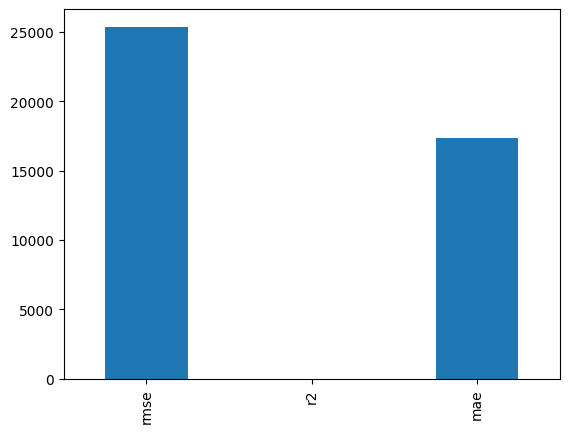

rmse    25378.764396
r2          0.887150
mae     17367.697554
dtype: float64


In [509]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge(50))
])

pipeline_ridge.fit(X_train, y_train)
y_pred = pipeline_ridge.predict(X_test)

display_regression_metrics(y_test, y_pred)

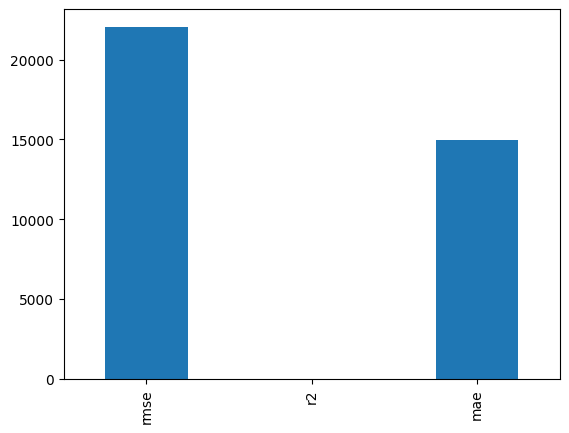

rmse    22063.925956
r2          0.914704
mae     14943.354264
dtype: float64


In [511]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=20, n_estimators=550))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

__The addition of the neighborhood score attribute worsened model performance (with and without dropping Neighborhood feature).__

In [529]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'regression__n_estimators': [300, 400, 550, 650, 750],
    'regression__learning_rate': [0.02, 0.03, 0.04],
    'regression__min_samples_split': [3,10,20,30,40,50,60],
    'regression__max_depth': [3, 4]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'regression__learning_rate': 0.04, 'regression__max_depth': 3, 'regression__min_samples_split': 3, 'regression__n_estimators': 750}
Best Root Mean Squared Error Score: -23555.520365540946


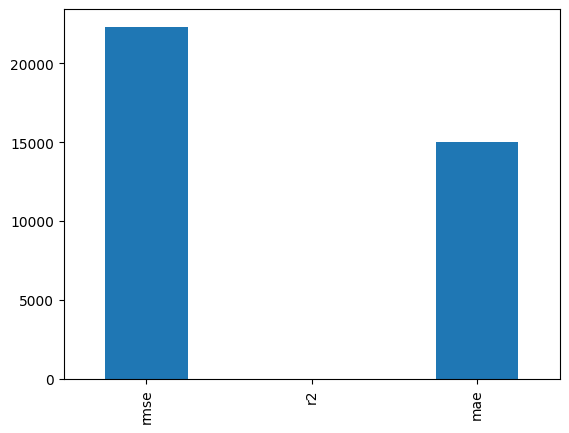

rmse    22316.477541
r2          0.912740
mae     15014.628780
dtype: float64


In [530]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.04, max_depth=3, min_samples_split=3, n_estimators=750))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [531]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.04, max_depth=3, min_samples_split=3, n_estimators=750))
])

#Train on the whole dataset
gb_pipeline.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission9.csv', index=False)

### More Data Preparation  

I gained some insight skimming through https://www.kaggle.com/code/shresthajeevan/house-prices-prediction-advanced-regressions  
I did not realize that my imputers were not recognizing and replacing the NA values with 0, but instead counting them as null and replacing them with the most frequent value.

#### Look for features without a lot of data to train on that may be skewing model

In [544]:
missing = train_house_prices_df.isnull().sum().to_frame()
missing.columns = ['count']
missing['percentage'] = missing['count'] / len(train_house_prices_df) * 100
missing.sort_values('count', ascending=False).head(20)

,count,percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [553]:
missing_garage_df = train_house_prices_df[train_house_prices_df['GarageCond'].isnull()]
missing_garage_df[[feature for feature in list(missing_garage_df.columns) if "garage" in feature.lower()]]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0,0,NaN,NaN
49,NaN,NaN,NaN,0,0,NaN,NaN
79,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
90,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1350,NaN,NaN,NaN,0,0,NaN,NaN
1408,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [557]:
df = train_house_prices_df[['Fireplaces', 'FireplaceQu']]
df[(df['Fireplaces'] != 0) & (df['FireplaceQu'].isnull())]

,Fireplaces,FireplaceQu
Id,,


#### New Column Transformer

In [577]:
columns_to_drop=['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [578]:
def create_ordinal_transformer(categories, column_name, imputer=None):
    if not imputer:
        return (make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=np.nan), StandardScaler()), [column_name])
    return (make_pipeline(imputer, OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=np.nan), StandardScaler()), [column_name])


def get_preprocessor(df):
    #overallcond and overallqual already numerical
    ordinal_features = ["KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "HeatingQC", "BsmtCond", "BsmtQual", "ExterCond", "ExterQual"]
    
    kq_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    func_cat = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']
    fire_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NoFireplace']
    gqual_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NoGarage']
    gcond_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NoGarage']
    pool_cat = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
    heat_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    bcond_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NoBasement']
    bqual_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NoBasement']
    econd_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    equal_cat = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    kq_cat.reverse()
    func_cat.reverse()
    fire_cat.reverse()
    gqual_cat.reverse()
    gcond_cat.reverse()
    pool_cat.reverse()
    heat_cat.reverse()
    bcond_cat.reverse()
    bqual_cat.reverse()
    econd_cat.reverse()
    equal_cat.reverse()
    
    numerical_features = df._get_numeric_data().columns
    diff_cat_features = ['MasVnrType']
    garage_features = ['GarageFinish', 'GarageType']
    bsmt_features = ['BsmtExposure']
    remaining_categorical_features = list(set(df.columns) - set(numerical_features) - set(ordinal_features) - set(diff_cat_features) - set(garage_features) - set(bsmt_features) - set(columns_to_drop))
    diff_numerical_features = ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']
    remaining_numerical_features = [feature for feature in numerical_features if feature not in diff_numerical_features]

    lf_transformer = make_pipeline(
        KNNImputer(n_neighbors=5),
        StandardScaler()
    )
    garage_yr_transformer = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),
        StandardScaler()
    )
    mvnr_area_transformer = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),
        StandardScaler()
    )

    
    garage_transformer = make_pipeline(
        SimpleImputer(strategy='constant', fill_value='NoGarage'),
        OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse_output=False)
    )
    mvnr_transformer = make_pipeline(
        SimpleImputer(strategy='constant', fill_value='None'),
        OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse_output=False)
    )
    bsmt_transformer = make_pipeline(
        SimpleImputer(strategy='constant', fill_value='NoBasement'),
        OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse_output=False)
    )
    
    
    return make_column_transformer(
        (numerical_transformer, remaining_numerical_features, ),
        (categorical_transformer, remaining_categorical_features),
        (mvnr_transformer, ['MasVnrType']),
        (garage_transformer, garage_features),
        (bsmt_transformer, bsmt_features),
        (lf_transformer, ['LotFrontage']),
        (garage_yr_transformer, ['GarageYrBlt']),
        (mvnr_area_transformer, ['MasVnrArea']),
        create_ordinal_transformer(kq_cat, 'KitchenQual'),
        create_ordinal_transformer(func_cat, 'Functional'),
        create_ordinal_transformer(fire_cat, 'FireplaceQu', SimpleImputer(strategy='constant', fill_value='NoFireplace')),
        create_ordinal_transformer(gqual_cat, 'GarageQual', SimpleImputer(strategy='constant', fill_value='NoGarage')),
        create_ordinal_transformer(gcond_cat, 'GarageCond', SimpleImputer(strategy='constant', fill_value='NoGarage')),
        create_ordinal_transformer(heat_cat, 'HeatingQC'),
        create_ordinal_transformer(bcond_cat, 'BsmtCond', SimpleImputer(strategy='constant', fill_value='NoBasement')),
        create_ordinal_transformer(bqual_cat, 'BsmtQual', SimpleImputer(strategy='constant', fill_value='NoBasement')),
        create_ordinal_transformer(econd_cat, 'ExterCond'),
        create_ordinal_transformer(equal_cat, 'ExterQual'),
        
    )

#### Reset

In [579]:
def add_engineered_features(df):
    add_total_sf(df)
    add_finished_sf(df)
    add_quality_sf(df)
    add_total_baths(df)
    drop_features(df)

processed_df = train_house_prices_df.drop(columns=['SalePrice'], index=[524, 1299])
add_engineered_features(processed_df)
preprocessor = get_preprocessor(processed_df)
processed_df = preprocessor.fit_transform(processed_df)
fix_column_names(processed_df)
processed_df['SalePrice'] = train_house_prices_df['SalePrice']

train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=123)

train_x_entire = processed_df.drop(columns=["SalePrice"])
train_y_entire = processed_df["SalePrice"]

X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

In [580]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400],
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

### Test with Ridge Classifier and PCA
pipeline_ridge = Pipeline([
    ('pca', PCA()),
    ('ridge', Ridge())
])

ridge_param_grid = {
    'ridge__alpha': [50, 75, 100, 125, 150, 175, 200, 250, 300, 400],
    'pca__n_components': [120, 150, 200]
}

ridge_grid_search = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {ridge_grid_search.best_score_}')

Best parameters: {'ridge__alpha': 50}
Best Root Mean Squared Error Score: -25946.475775331375
Best parameters: {'pca__n_components': 150, 'ridge__alpha': 50}
Best Root Mean Squared Error Score: -25939.004226321358


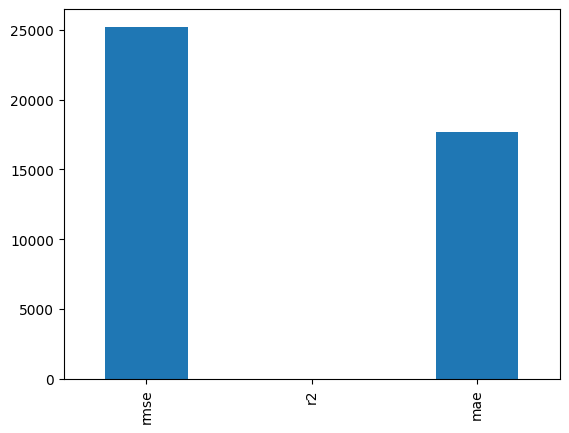

rmse    25241.838967
r2          0.888364
mae     17693.202605
dtype: float64


In [640]:
clf = Ridge(alpha=50)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [584]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor())
])

gb_param_grid = {
    'regression__n_estimators': [300, 400, 550],
    'regression__learning_rate': [0.02, 0.03, 0.04],
    'regression__min_samples_split': [3,10,20,30,40],
    'regression__max_depth': [3]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f'Best parameters: {gb_grid_search.best_params_}')
print(f'Best Root Mean Squared Error Score: {gb_grid_search.best_score_}')

Best parameters: {'regression__learning_rate': 0.04, 'regression__max_depth': 3, 'regression__min_samples_split': 30, 'regression__n_estimators': 550}
Best Root Mean Squared Error Score: -23198.386073345297


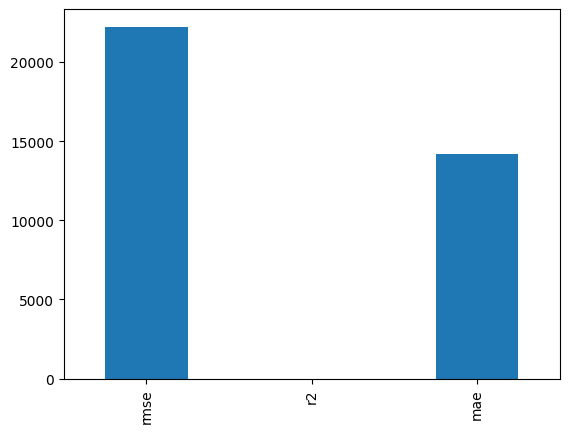

rmse    22230.236547
r2          0.913414
mae     14218.382623
dtype: float64


In [585]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.04, max_depth=3, min_samples_split=30, n_estimators=550))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

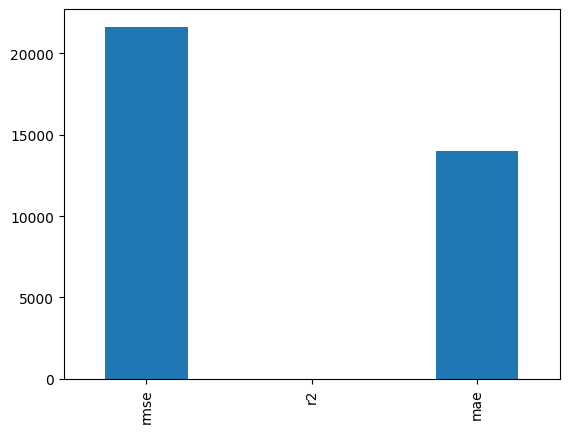

rmse    21648.349961
r2          0.917887
mae     13996.138667
dtype: float64


In [594]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=20, n_estimators=550))
])

gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

display_regression_metrics(y_test, y_pred)

In [595]:
gb_pipeline = Pipeline([
    ('regression', GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=20, n_estimators=550))
])

#Train on the whole dataset
gb_pipeline.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gb_pipeline.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission10.csv', index=False)

In [599]:
gbr = GradientBoostingRegressor(learning_rate=0.03, max_depth=3, min_samples_split=20, n_estimators=550)
gbr.fit(train_x_entire, train_y_entire)

GradientBoostingRegressor(learning_rate=0.03, min_samples_split=20,
                          n_estimators=550)

In [619]:
feature_importances = gbr.feature_importances_
print(len(feature_importances))
print(len(train_x_entire.columns))

228
228


In [620]:
fi_df = pd.DataFrame(feature_importances)
fi_df.index = train_x_entire.columns
fi_df.columns = ["feature_importance"]
fi_df.sort_values('feature_importance', ascending=False).head(15)

,feature_importance
total_sf,0.357856
OverallQual,0.333668
quality_sf,0.112843
YearBuilt,0.028340
KitchenQual,0.017563
GarageCars,0.016284
BsmtQual,0.015550
finished_sf,0.014104
LotArea,0.012121
total_baths,0.010801


In [631]:
gbr = GradientBoostingRegressor(learning_rate=0.03, max_depth=4, min_samples_split=30, n_estimators=500)

#Train on the whole dataset
gbr.fit(train_x_entire, train_y_entire)

test_df = pd.read_csv('data/test.csv')
add_engineered_features(test_df)
test_df_processed = preprocessor.transform(test_df)
fix_column_names(test_df_processed)

y_pred = gbr.predict(test_df_processed)
submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
submission.to_csv('kaggle-submissions/submission11.csv', index=False)

Kaggle score of 0.13309

array([[<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'GarageArea'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

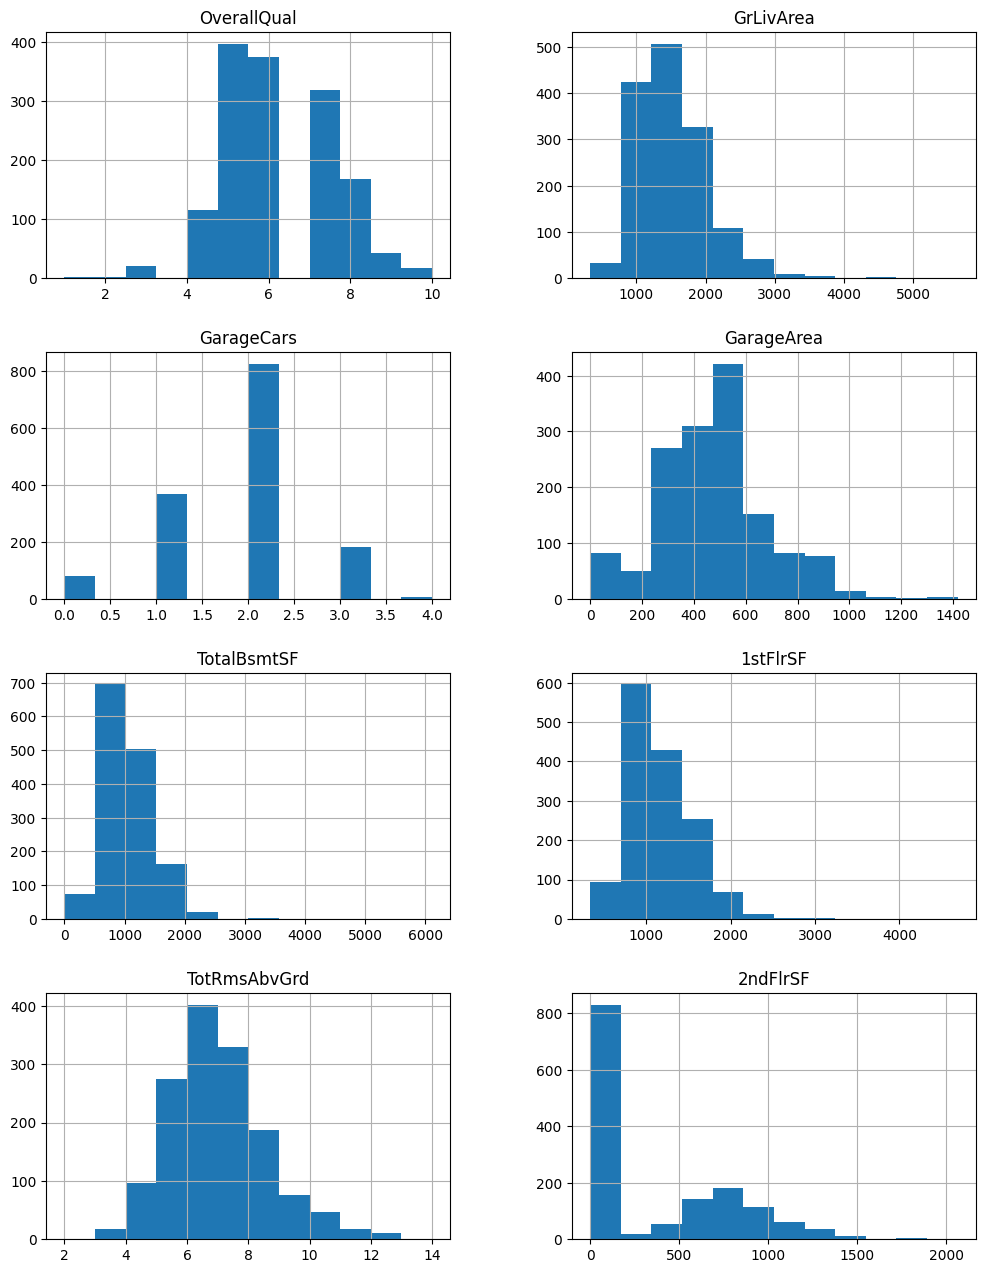

In [637]:
top_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd", "2ndFlrSF"]
train_house_prices_df[top_features].hist(layout=(6,2), bins=12, figsize=(12,24))

In [639]:
n_stats_clean_df[['mean', 'median', 'CTScaled', 'QualityScore', 'Score']]

,mean,median,CTScaled,QualityScore,Score
Neighborhood,,,,,
NridgHt,316270.623377,315000.0,2.172720,17.509386,19.682106
StoneBr,310499.000000,278000.0,1.829536,16.887899,18.717435
NoRidge,335295.317073,301500.0,2.217048,16.396214,18.613262
Somerst,225379.837209,225500.0,0.725329,15.916340,16.641669
Timber,242247.447368,228475.0,0.884539,15.246513,16.131052
Blmngtn,194870.882353,191000.0,0.203721,15.808841,16.012562
Veenker,238772.727273,218000.0,0.772612,14.525010,15.297622
CollgCr,197965.773333,197200.0,0.278300,14.849812,15.128111
Gilbert,192854.506329,181000.0,0.107306,14.455389,14.562695
